# Analysing Different Generation Attempts
In this notebook we will be analysing our attempts at generating synthetic training data for our SNN SOM Neuron. We will be looking at a few different ways, especially those not yet looked at in the generation notebooks like and in comparision:

  - Distance of min value to max value for each combination of std and mean
  - Distribution of values over specific std and mean values

## Loading datasets

For our analysis we want to compare the full datasets, so training and testing parts combined, of each generation method.

Since we only saved the datasets seperately we will first need to combine them for each set.

In [2]:
import pandas as pd

def load_and_combine_df(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    concat_df = pd.concat([train_df, test_df], axis=0)
    
    # rename columns
    return concat_df.rename(columns={'Series1': 'input', 'Series2': 'mean', 'Series3': 'std'})

In [3]:
# Combine into first_dataset
first_dataset = load_and_combine_df("../train_data_first.csv", "../test_data_first.csv")

first_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   input   1000000 non-null  float64
 1   mean    1000000 non-null  float64
 2   std     1000000 non-null  float64
 3   Label   1000000 non-null  float64
dtypes: float64(4)
memory usage: 38.1 MB


In [4]:
# Load second dataset
second_dataset = load_and_combine_df("../train_data_second.csv", "../test_data_second.csv")
second_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   input   1000000 non-null  float64
 1   mean    1000000 non-null  float64
 2   std     1000000 non-null  float64
 3   Label   1000000 non-null  float64
dtypes: float64(4)
memory usage: 38.1 MB


In [5]:
# Load third dataset
third_dataset = load_and_combine_df("../train_data_third_dataset.csv", "../test_data_third_dataset.csv")
third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   input   1000000 non-null  float64
 1   mean    1000000 non-null  float64
 2   std     1000000 non-null  float64
 3   Label   1000000 non-null  float64
dtypes: float64(4)
memory usage: 38.1 MB


In [6]:
# Load min max input lin and half normal dataset
final_dataset = load_and_combine_df("../train_data_min_max_input_half_lin_half_normal.csv", "../test_data_min_max_input_half_lin_half_normal.csv")
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   input   1000000 non-null  float64
 1   mean    1000000 non-null  float64
 2   std     1000000 non-null  float64
 3   Label   1000000 non-null  float64
dtypes: float64(4)
memory usage: 38.1 MB


In [7]:
# Check that all datasets do not have duplicates
assert first_dataset.duplicated().sum() == 0
assert second_dataset.duplicated().sum() == 0
assert third_dataset.duplicated().sum() == 0
assert final_dataset.duplicated().sum() == 0

In [8]:
# Create dataset list of tuples with name and dataset
datasets = [
    ("first_dataset", first_dataset),
    ("second_dataset", second_dataset),
    ("third_dataset", third_dataset),
    ("final_dataset", final_dataset)
]

## Min and Max Value for Curves
We now want to, for every combination of std and mean values, get the minimum and maximum value existing for that combination in the datasets, and then calculate how many std away from the mean they are.

In [9]:
# For each dataset get all combinations of mean and std
mean_std_combinations = {}

for name, dataset in datasets:
    # Get all combinations of mean and std irrespective of input
    mean_std_combinations[name] = dataset.groupby(['mean', 'std']).size().reset_index(name='count')
    
    

In [10]:
mean_std_combinations["first_dataset"]

mean           std  count
0    -3.141593  1.000000e-10    100
1    -3.141593  6.346652e-02    100
2    -3.141593  1.269330e-01    100
3    -3.141593  1.903996e-01    100
4    -3.141593  2.538661e-01    100
...        ...           ...    ...
9995  3.141593  6.029319e+00    100
9996  3.141593  6.092786e+00    100
9997  3.141593  6.156252e+00    100
9998  3.141593  6.219719e+00    100
9999  3.141593  6.283185e+00    100

[10000 rows x 3 columns]

In [11]:
# Check if all datasets have the same mean and std combinations

for name, dataset in mean_std_combinations.items():
    print(f"{name} equal to final dataset in mean,std combinations: {dataset.equals(mean_std_combinations['final_dataset'])}")
    

first_dataset equal to final dataset in mean,std combinations: False
second_dataset equal to final dataset in mean,std combinations: True
third_dataset equal to final dataset in mean,std combinations: True
final_dataset equal to final dataset in mean,std combinations: True


In [12]:
# For each combination in each dataset get the minimum and maximum input value
min_max_combinations = {}

for name, dataset in datasets:
    min_max_combinations[name] = dataset.groupby(['mean', 'std']).agg({'input': ['min', 'max']}).reset_index()
    print(min_max_combinations[name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (mean, )      10000 non-null  float64
 1   (std, )       10000 non-null  float64
 2   (input, min)  10000 non-null  float64
 3   (input, max)  10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (mean, )      10000 non-null  float64
 1   (std, )       10000 non-null  float64
 2   (input, min)  10000 non-null  float64
 3   (input, max)  10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        -------

In [13]:
# Add information about distance from min to mean and max to mean to min_max_combinations
for name, dataset in datasets:
    min_max_combinations[name]['min_to_mean'] = min_max_combinations[name]['input']['min'] - min_max_combinations[name]['mean']
    min_max_combinations[name]['max_to_mean'] = min_max_combinations[name]['input']['max'] - min_max_combinations[name]['mean']

# Example look
min_max_combinations["first_dataset"].head()

mean           std     input           min_to_mean max_to_mean
                                min       max                        
0 -3.141593  1.000000e-10 -3.141593  3.141593         0.0    6.283185
1 -3.141593  6.346652e-02 -3.141593  3.141593         0.0    6.283185
2 -3.141593  1.269330e-01 -3.141593  3.141593         0.0    6.283185
3 -3.141593  1.903996e-01 -3.141593  3.141593         0.0    6.283185
4 -3.141593  2.538661e-01 -3.141593  3.141593         0.0    6.283185

In [14]:
# Add min_to_mean / std and max_to_mean / std to min_max_combinations
for name, dataset in datasets:
    min_max_combinations[name]['min_to_mean/std'] = min_max_combinations[name]['min_to_mean'] / min_max_combinations[name]['std']
    min_max_combinations[name]['max_to_mean/std'] = min_max_combinations[name]['max_to_mean'] / min_max_combinations[name]['std']
    
# Example look
min_max_combinations["first_dataset"].head()

mean           std     input           min_to_mean max_to_mean  \
                                min       max                           
0 -3.141593  1.000000e-10 -3.141593  3.141593         0.0    6.283185   
1 -3.141593  6.346652e-02 -3.141593  3.141593         0.0    6.283185   
2 -3.141593  1.269330e-01 -3.141593  3.141593         0.0    6.283185   
3 -3.141593  1.903996e-01 -3.141593  3.141593         0.0    6.283185   
4 -3.141593  2.538661e-01 -3.141593  3.141593         0.0    6.283185   

  min_to_mean/std max_to_mean/std  
                                   
0             0.0    6.283185e+10  
1             0.0    9.900000e+01  
2             0.0    4.950000e+01  
3             0.0    3.300000e+01  
4             0.0    2.475000e+01

In [15]:
min_max_combinations["first_dataset"].describe()

mean           std         input                 min_to_mean  \
                                            min           max                 
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000   
mean   2.728484e-16  3.141593e+00 -3.141593e+00  3.141593e+00     -3.141593   
std    1.832121e+00  1.832121e+00  8.882228e-16  8.882228e-16      1.832121   
min   -3.141593e+00  1.000000e-10 -3.141593e+00  3.141593e+00     -6.283185   
25%   -1.570796e+00  1.570796e+00 -3.141593e+00  3.141593e+00     -4.712389   
50%    2.012279e-16  3.141593e+00 -3.141593e+00  3.141593e+00     -3.141593   
75%    1.570796e+00  4.712389e+00 -3.141593e+00  3.141593e+00     -1.570796   
max    3.141593e+00  6.283185e+00 -3.141593e+00  3.141593e+00      0.000000   

        max_to_mean min_to_mean/std max_to_mean/std  
                                                     
count  10000.000000    1.000000e+04    1.000000e+04  
mean       3.141593   -3.141593e+08    3.141593e+08  
std        1.832121    3.623334e+09    3.623334e+09  
min        0.000000   -6.283185e+10    0.000000e+00  
25%        1.570796   -2.005102e+00    4.949235e-01  
50%        3.141593   -1.000000e+00    1.000000e+00  
75%        4.712389   -4.949235e-01    2.005102e+00  
max        6.283185    0.000000e+00    6.283185e+10

In [16]:
min_max_combinations["second_dataset"].describe()

mean           std         input                 min_to_mean  \
                                            min           max                 
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   2.728484e-16      3.191593     -8.028794      8.001720     -8.028794   
std    1.832121e+00      1.802961      5.140573      5.135552      4.807261   
min   -3.141593e+00      0.100000    -27.199736     -2.876222    -25.137074   
25%   -1.570796e+00      1.645796    -11.780772      3.920786    -11.677559   
50%    2.012279e-16      3.191593     -7.820964      7.773981     -7.811593   
75%    1.570796e+00      4.737389     -3.979641     11.735906     -3.983973   
max    3.141593e+00      6.283185      2.860323     27.509090     -0.169978   

        max_to_mean min_to_mean/std max_to_mean/std  
                                                     
count  10000.000000    10000.000000    10000.000000  
mean       8.001720       -2.515213        2.504758  
std        4.803030        0.434783        0.429755  
min        0.170757       -4.841122        1.263799  
25%        3.945139       -2.770852        2.204997  
50%        7.752789       -2.467147        2.455915  
75%       11.584647       -2.206643        2.762163  
max       26.144560       -1.276311        5.912850

In [17]:
min_max_combinations["third_dataset"].describe()

mean           std         input                 min_to_mean  \
                                            min           max                 
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   2.728484e-16      3.191593     -7.963289      7.933748     -7.963289   
std    1.832121e+00      1.802961      5.064929      5.055523      4.727000   
min   -3.141593e+00      0.100000    -27.119540     -2.888028    -25.812704   
25%   -1.570796e+00      1.645796    -11.642645      3.934128    -11.546232   
50%    2.012279e-16      3.191593     -7.770371      7.736355     -7.788624   
75%    1.570796e+00      4.737389     -3.984605     11.605351     -3.961140   
max    3.141593e+00      6.283185      2.941593     26.340874     -0.200000   

        max_to_mean min_to_mean/std max_to_mean/std  
                                                     
count  10000.000000    10000.000000    10000.000000  
mean       7.933748       -2.495966        2.488504  
std        4.708482        0.407064        0.405862  
min        0.200000       -4.431153        2.000000  
25%        3.979006       -2.742964        2.158078  
50%        7.754845       -2.433723        2.424569  
75%       11.567068       -2.164787        2.734556  
max       27.675771       -2.000000        4.785270

In [18]:
min_max_combinations["final_dataset"].describe()

mean           std         input                 min_to_mean  \
                                            min           max                 
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   2.728484e-16      3.191593    -34.557519     34.557519    -34.557519   
std    1.832121e+00      1.802961      0.000000      0.000000      1.832121   
min   -3.141593e+00      0.100000    -34.557519     34.557519    -37.699112   
25%   -1.570796e+00      1.645796    -34.557519     34.557519    -36.128316   
50%    2.012279e-16      3.191593    -34.557519     34.557519    -34.557519   
75%    1.570796e+00      4.737389    -34.557519     34.557519    -32.986723   
max    3.141593e+00      6.283185    -34.557519     34.557519    -31.415927   

        max_to_mean min_to_mean/std max_to_mean/std  
                                                     
count  10000.000000    10000.000000    10000.000000  
mean      34.557519      -24.838575       24.838575  
std        1.832121       44.563702       44.563702  
min       31.415927     -376.991118        5.000000  
25%       32.986723      -21.197159        7.270727  
50%       34.557519      -10.827807       10.827807  
75%       36.128316       -7.270727       21.197159  
max       37.699112       -5.000000      376.991118

### Analysis
We can see that in our **first dataset** all input values are between -PI and + PI as a naive way of generating data. Our STD also starts at a very low number 0.0001 or so. This results in bad coverage.

In our **second and third dataset** are within 3 to 5 * std of the mean in both directions

in our final dataset we went with a more detailed approach of trying to find a global minimum and maximum input value given by the smallest value and biggest value achievable by any combination of mean, std with the mean - 5 * std or mean + 5 * std

## Graph of specific std, mean input values

Next we want to compare how the input values are distributed over gauss curves for specific std, mean values in all the datasets.

In [19]:
# Pick 5 combinations evenly spaced from min to max mean
unique_means = min_max_combinations["final_dataset"]["mean"].unique()

mean_list = []

for i in range(5):
    if i == 0:
        mean_list.append(unique_means[0])
    else:
        mean_list.append(unique_means[i * int(len(unique_means) / 4) - 1])
mean_list

[np.float64(-3.141592653589793),
 np.float64(-1.6183962154856508),
 np.float64(-0.0317332591271695),
 np.float64(1.5549296972313122),
 np.float64(3.141592653589793)]

In [20]:
# Get unique std values
unique_stds = min_max_combinations["final_dataset"]["std"].unique()
unique_stds.sort()
unique_stds

std_list = []

for i in range(5):
    if i == 0:
        std_list.append(unique_stds[0])
    else:
        std_list.append(unique_stds[i * int(len(unique_stds) / 4) - 1])
std_list

[np.float64(0.1),
 np.float64(1.598954013861718),
 np.float64(3.160364444967674),
 np.float64(4.72177487607363),
 np.float64(6.283185307179586)]

In [21]:
import itertools

# Get all combinations of mean and std
mean_std_combinations = list(itertools.product(mean_list, std_list))
len(mean_std_combinations)

25

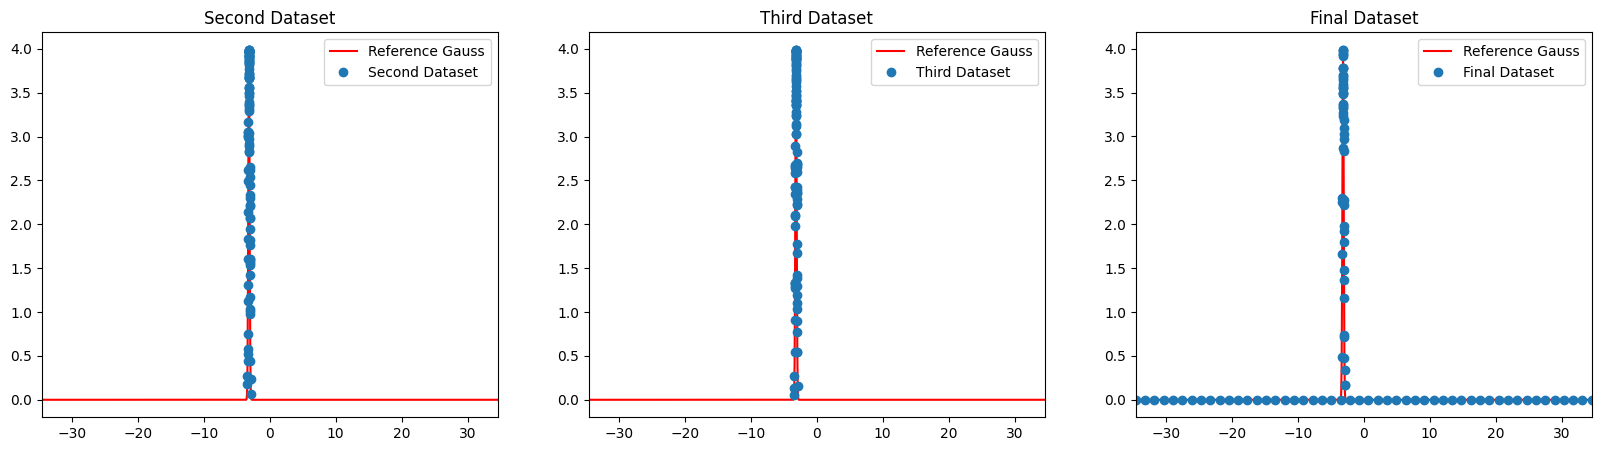

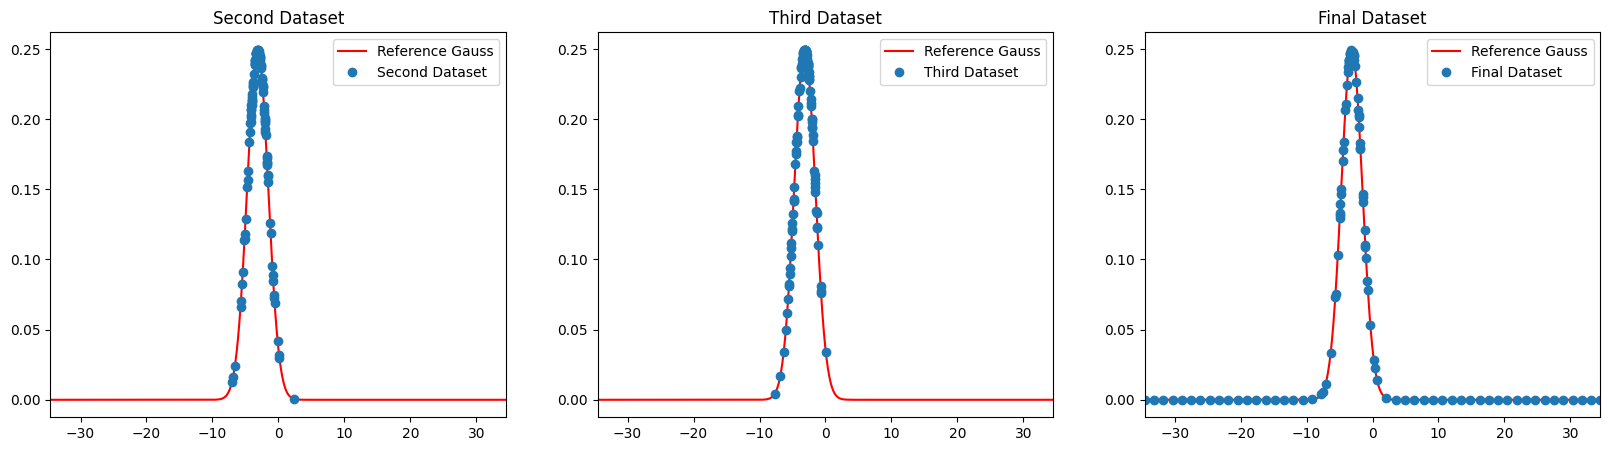

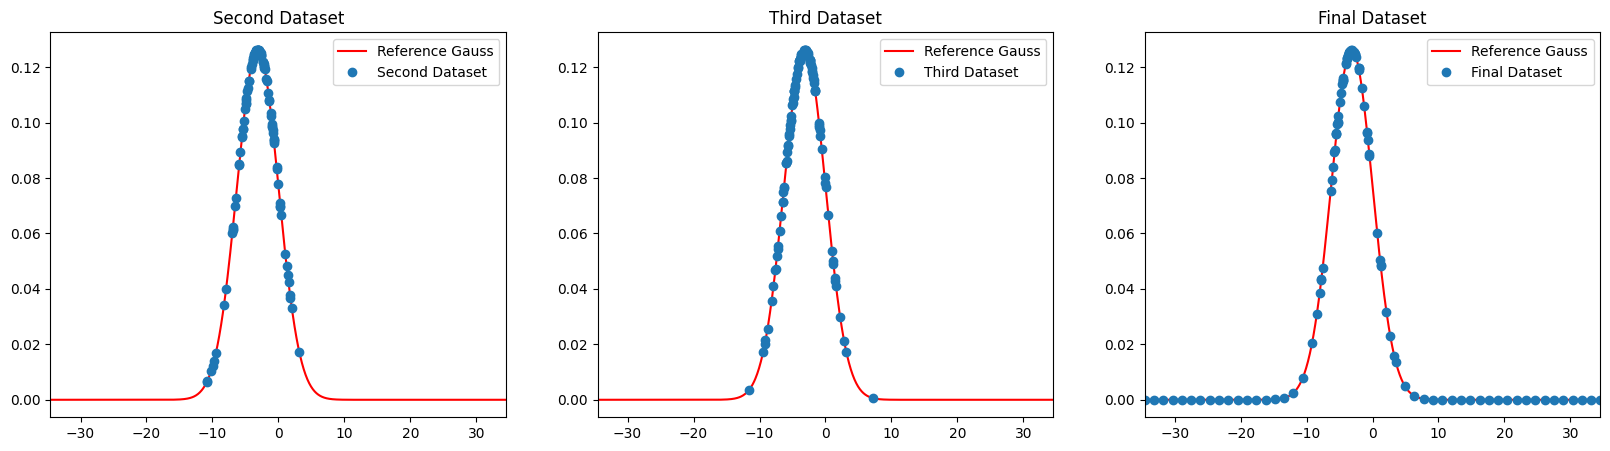

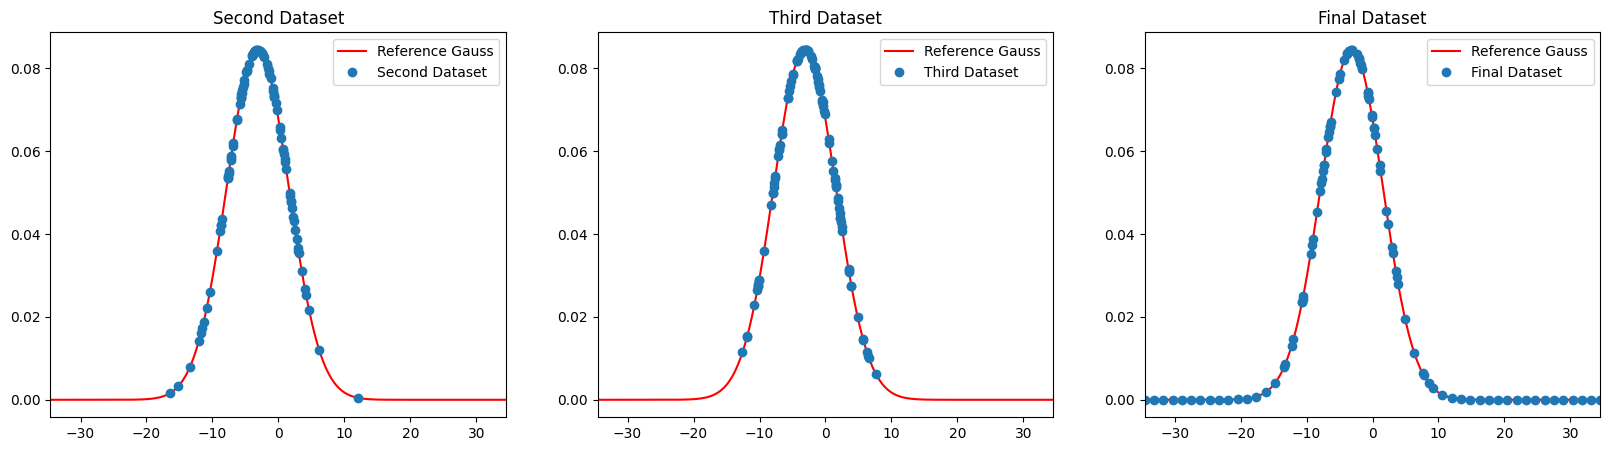

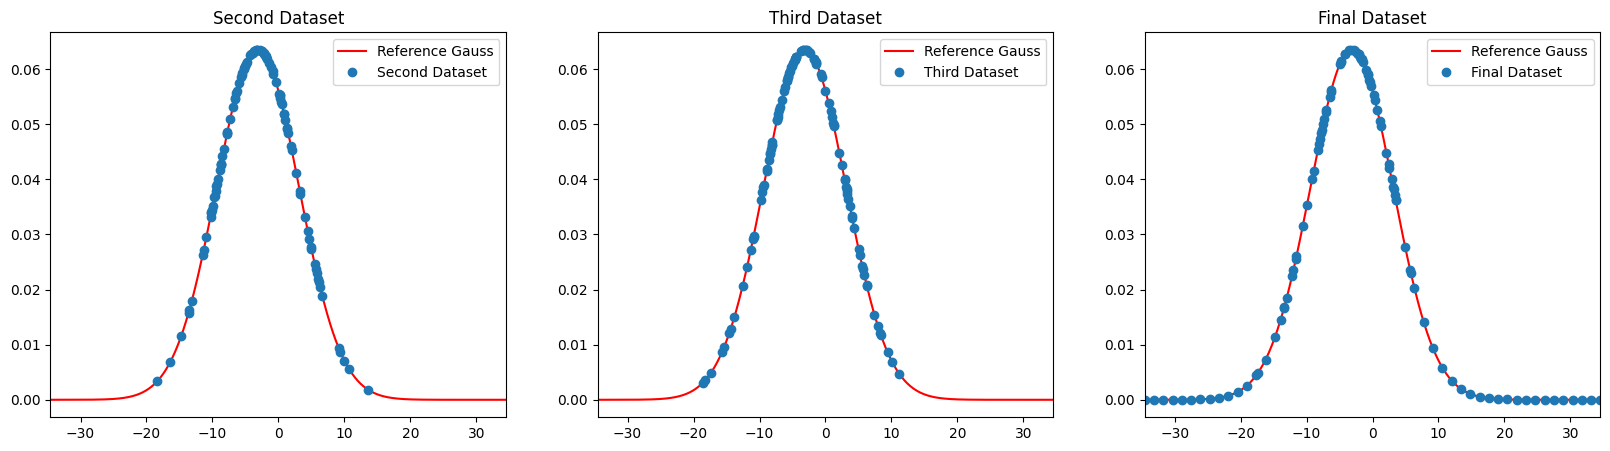

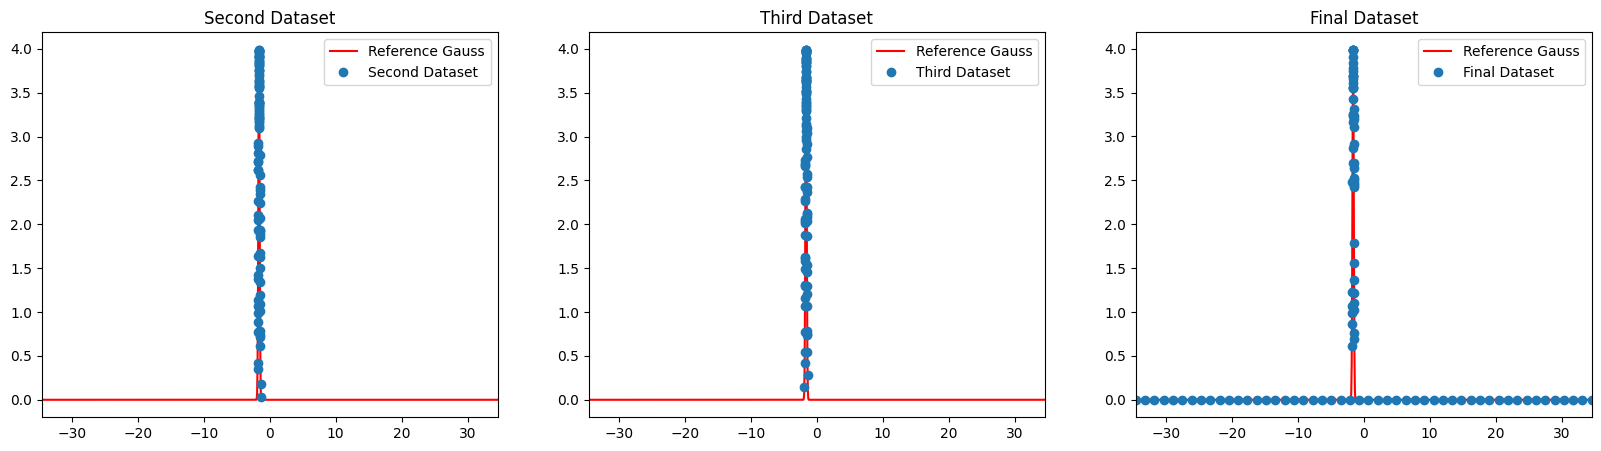

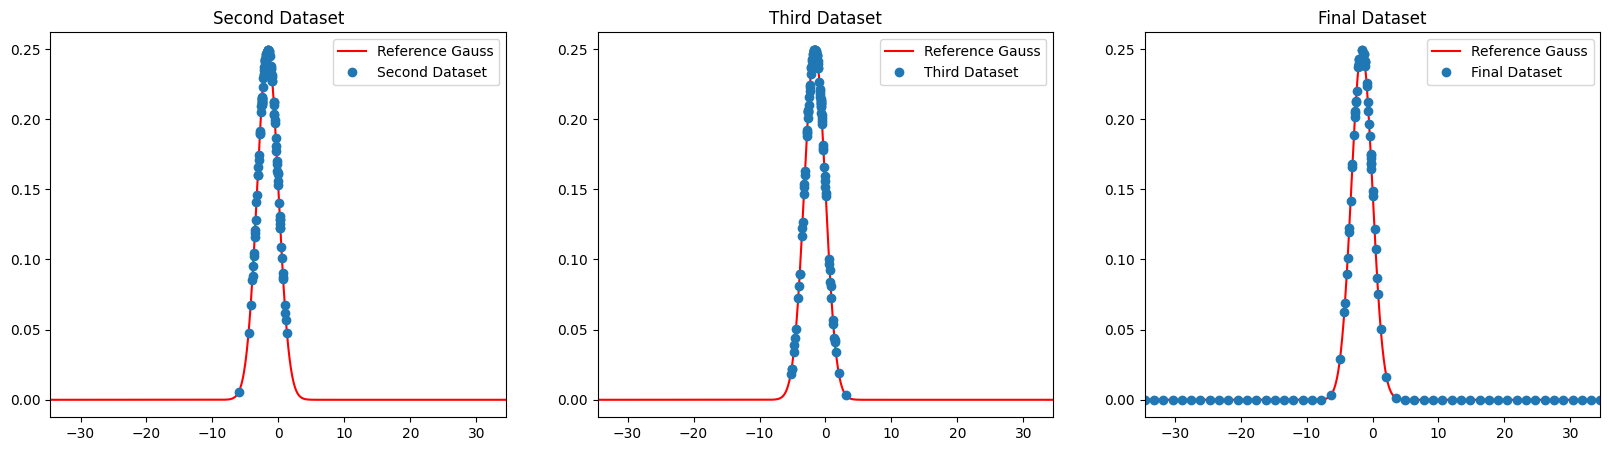

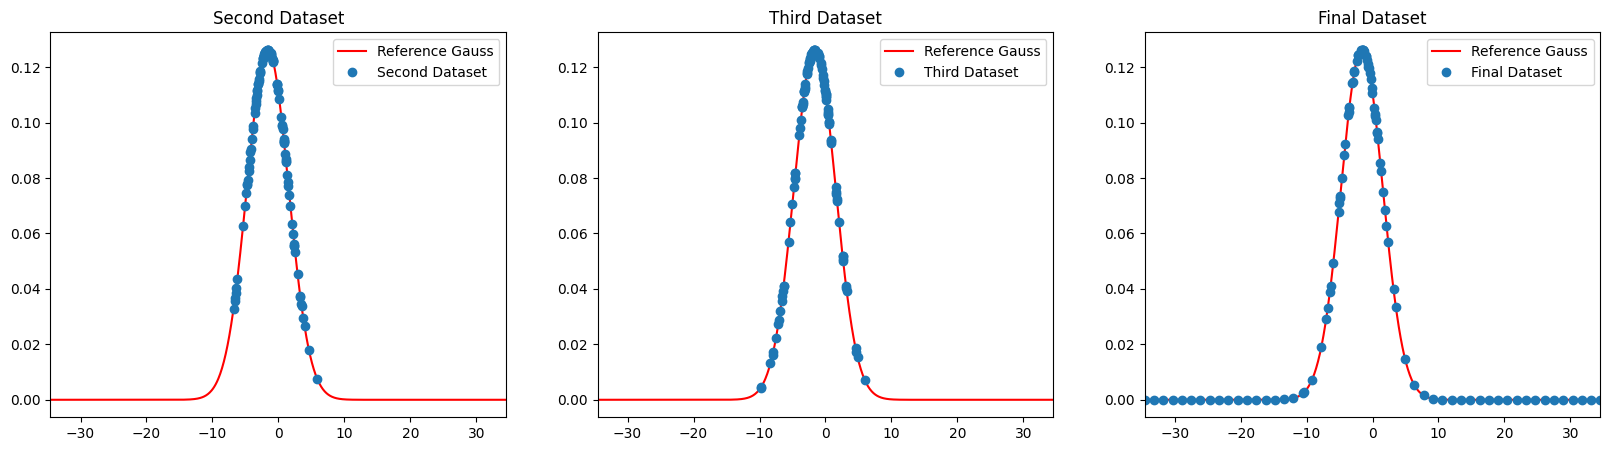

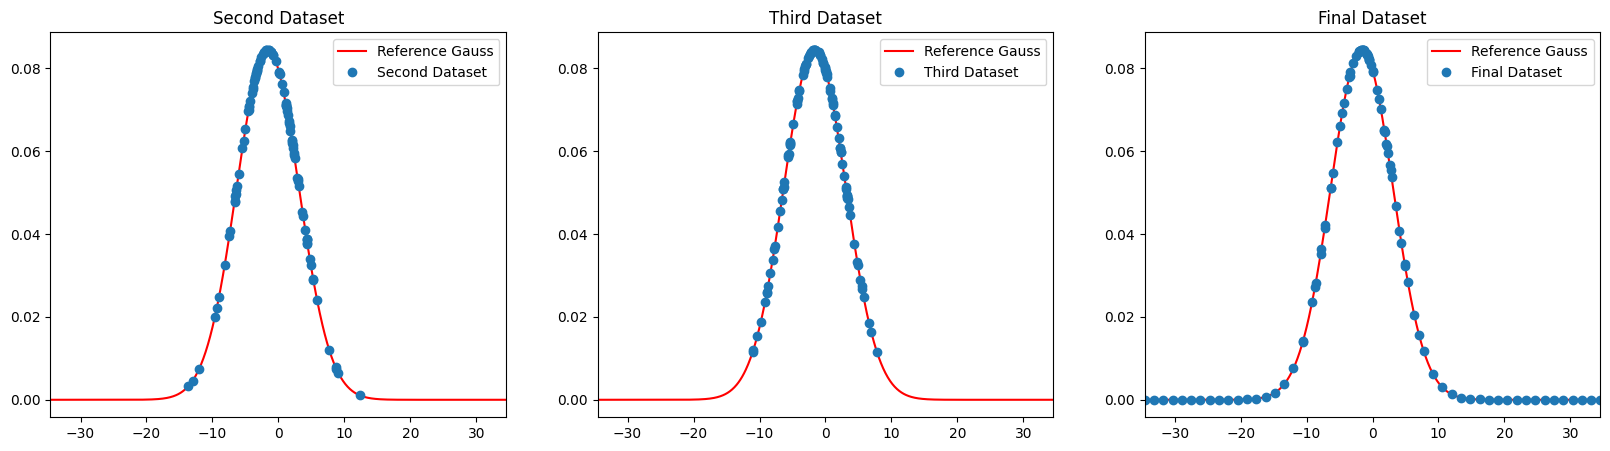

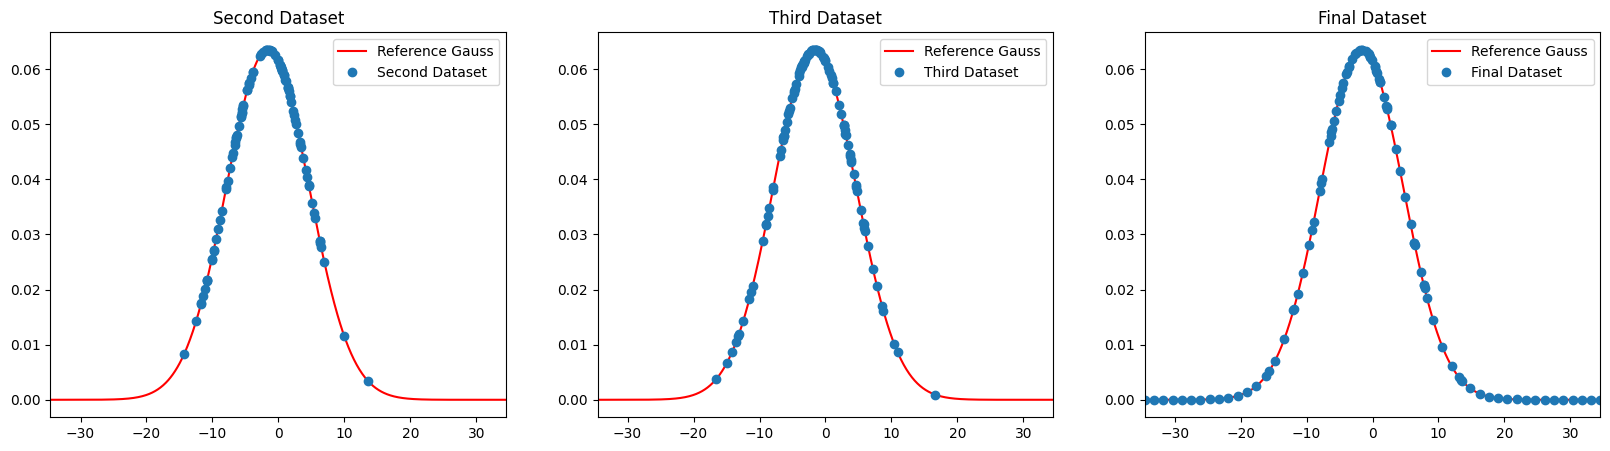

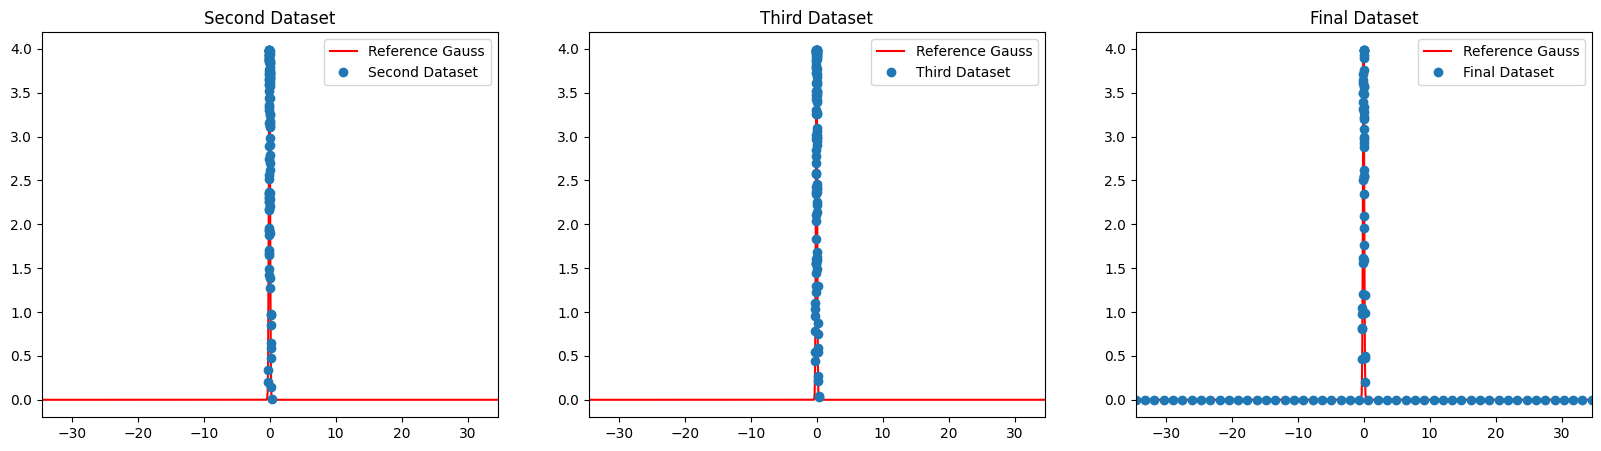

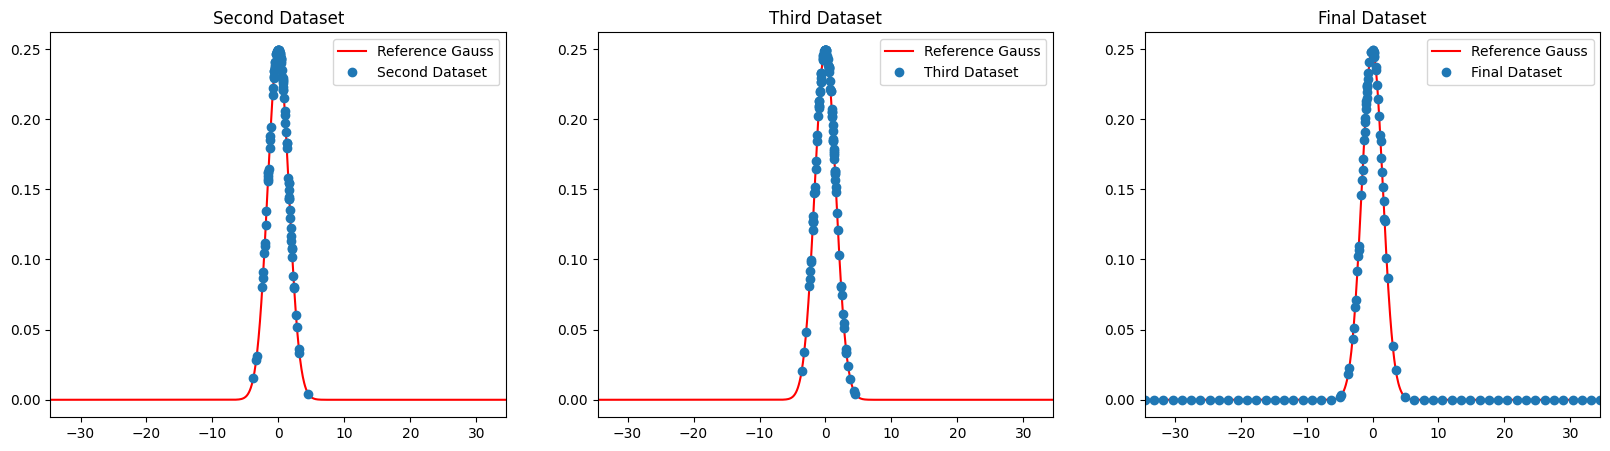

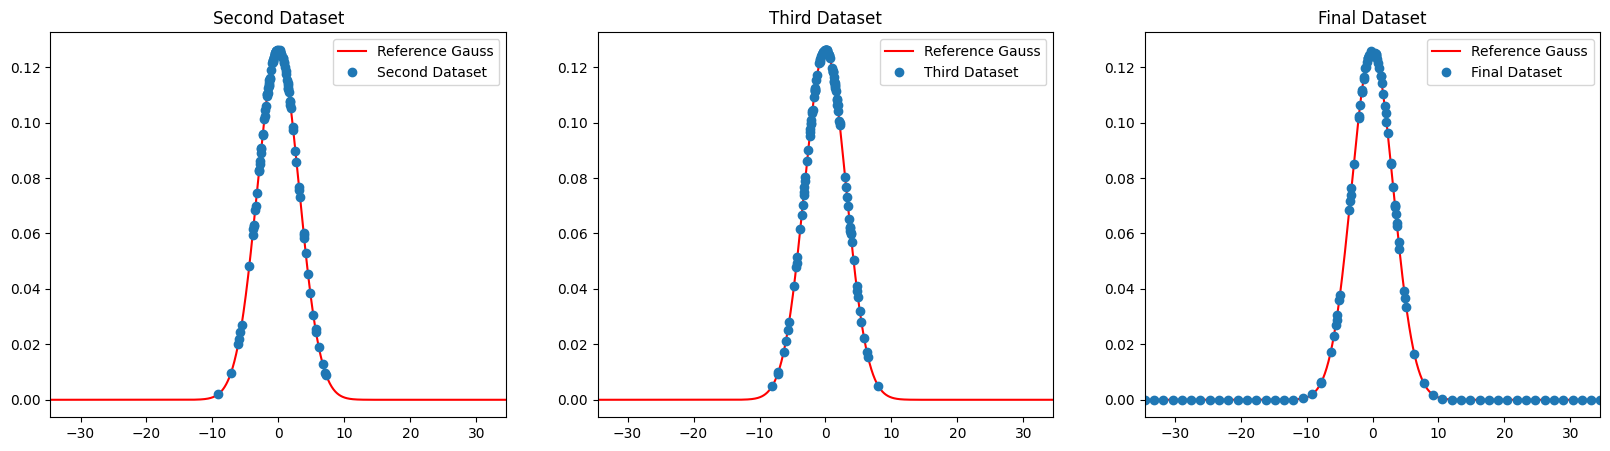

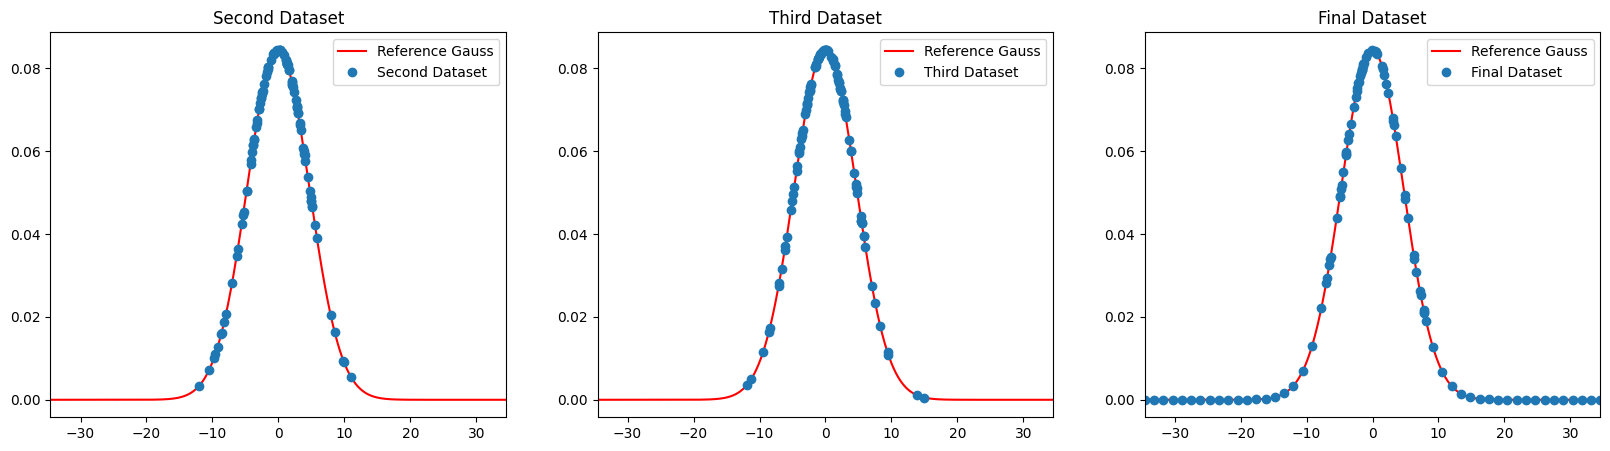

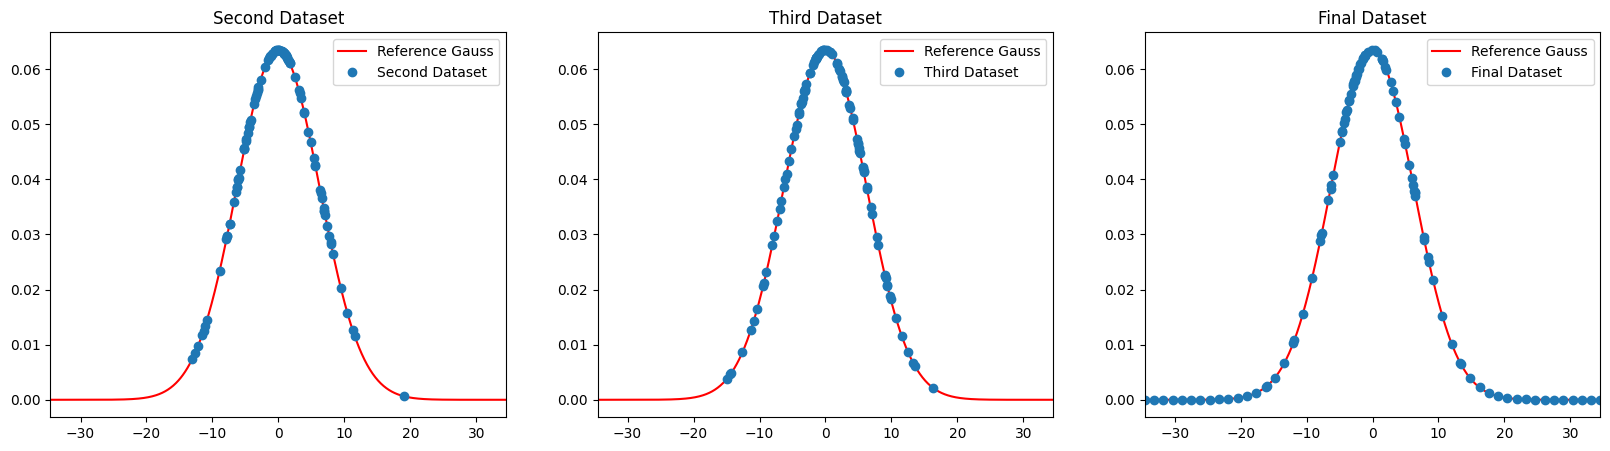

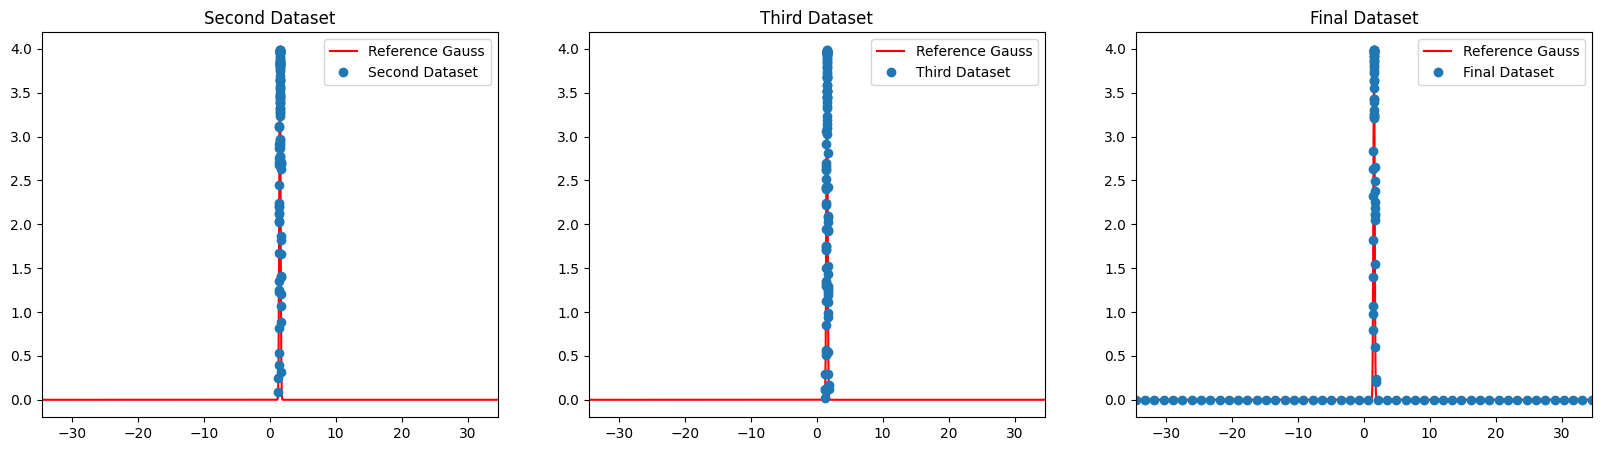

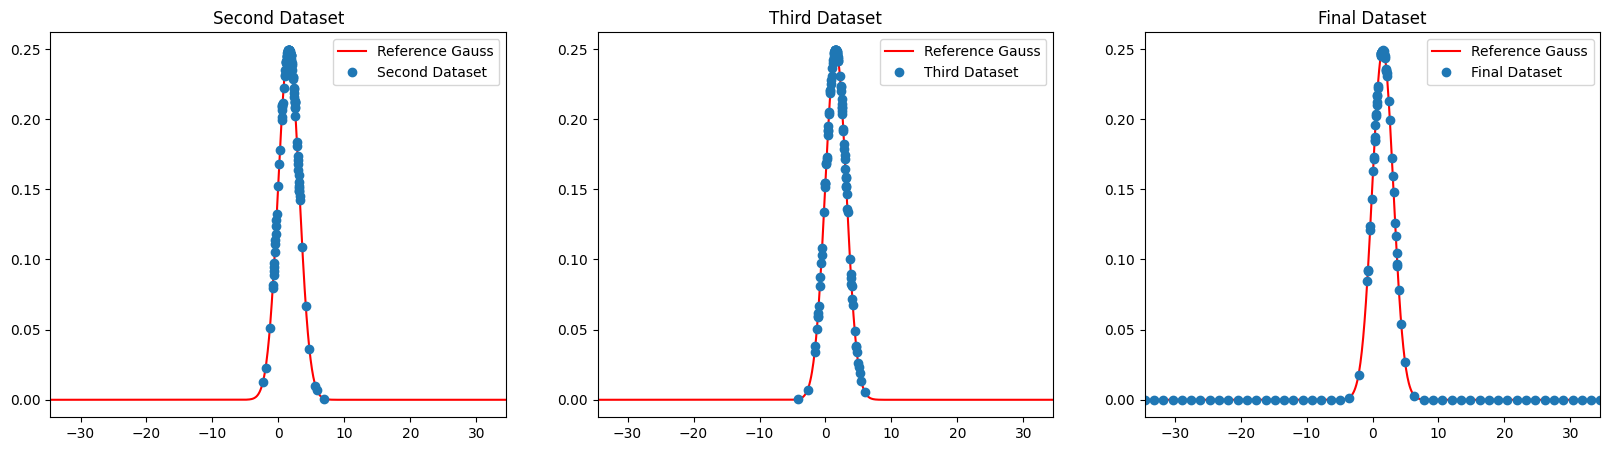

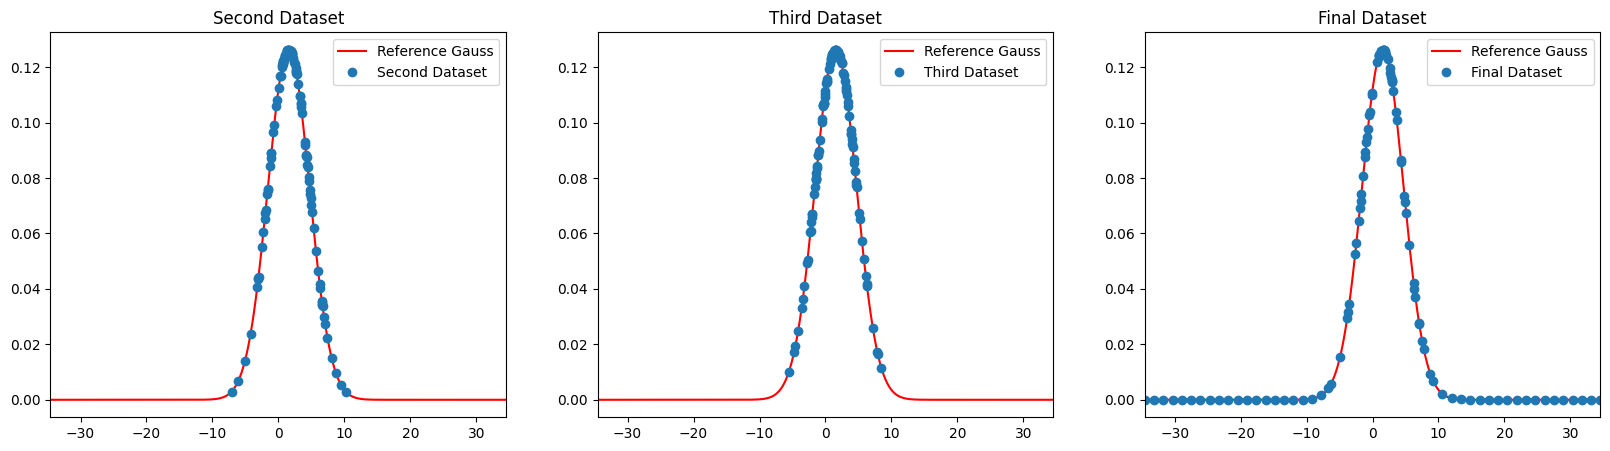

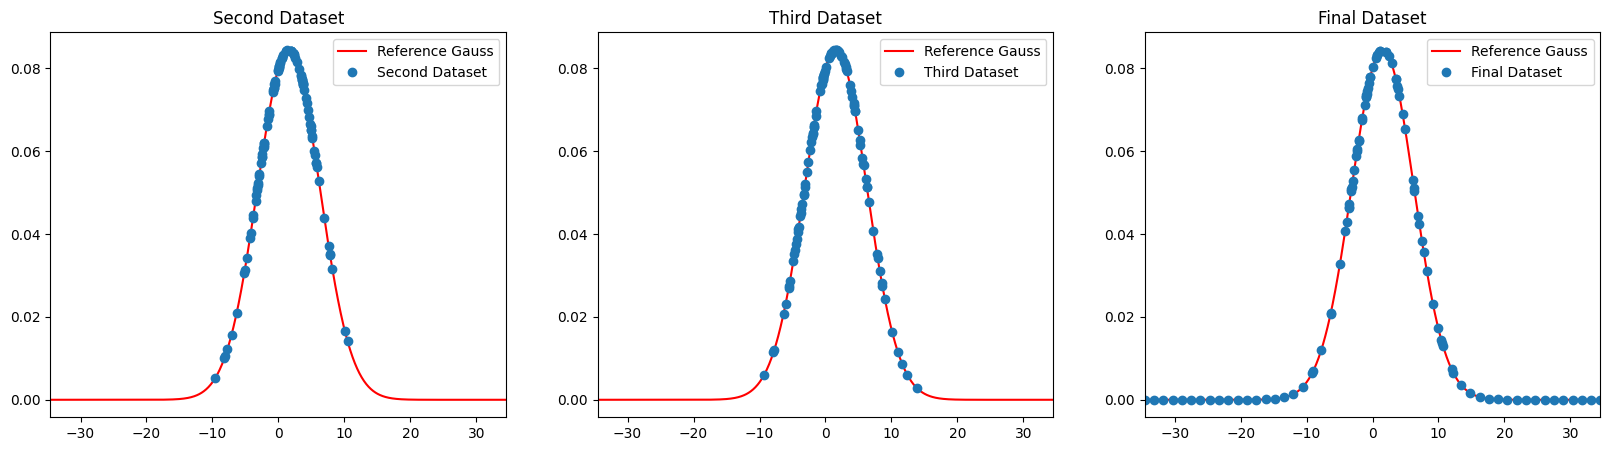

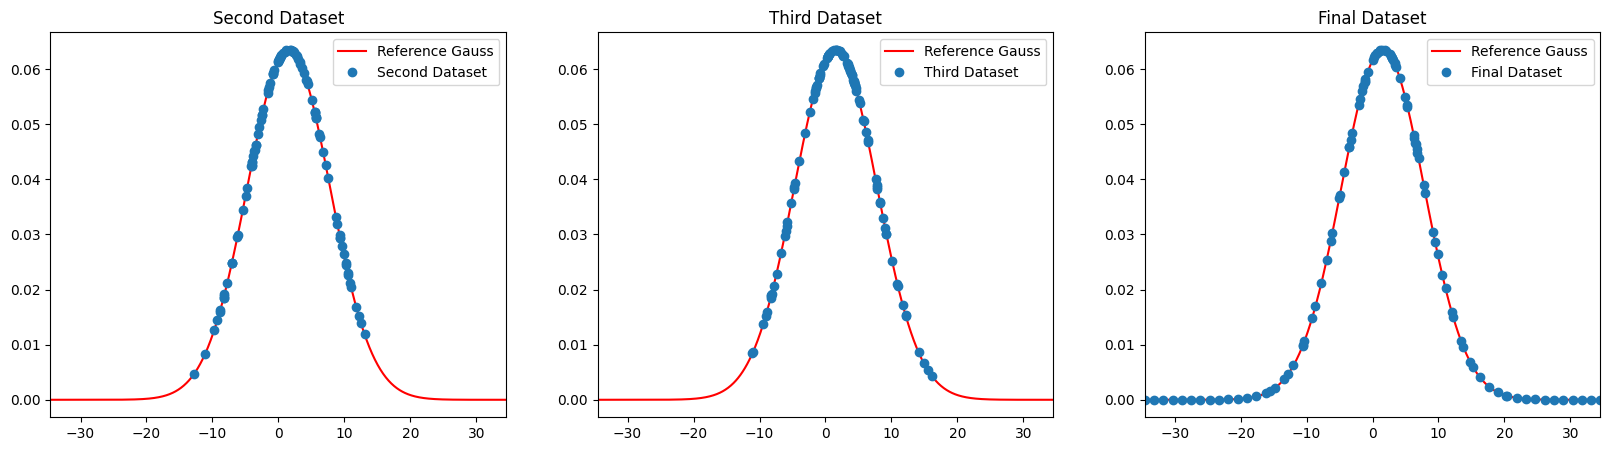

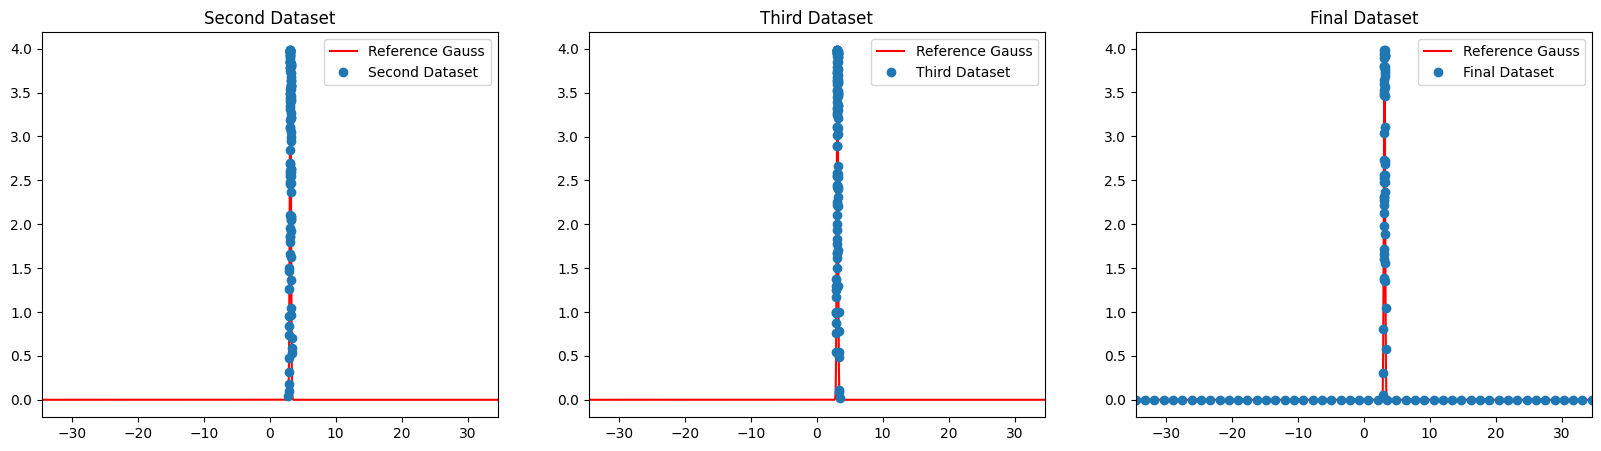

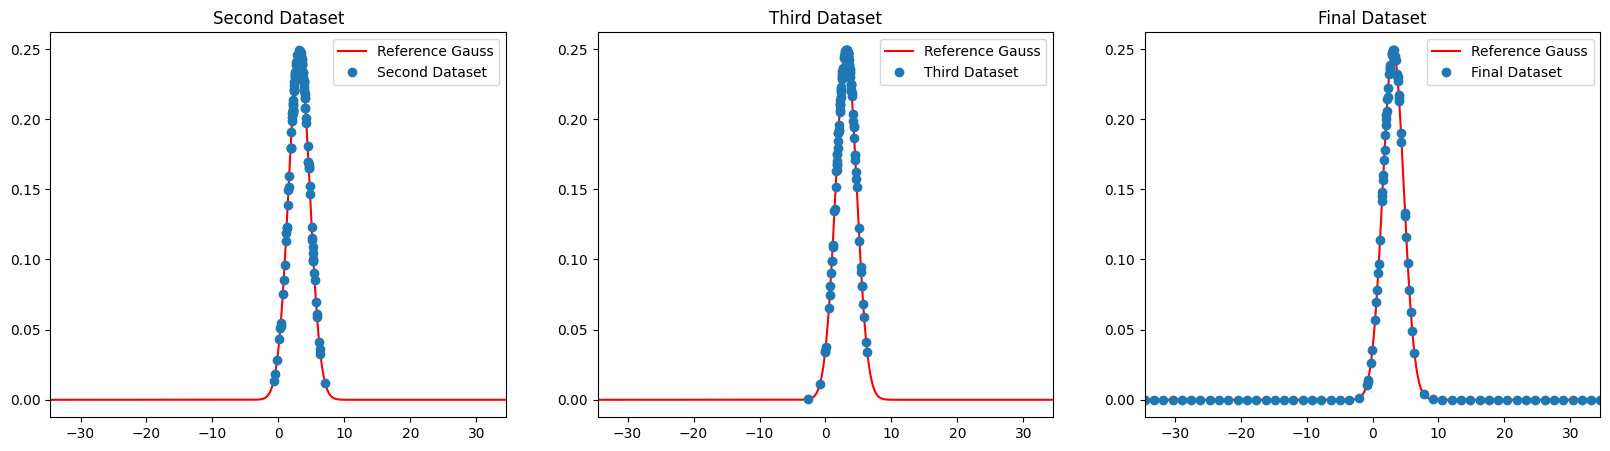

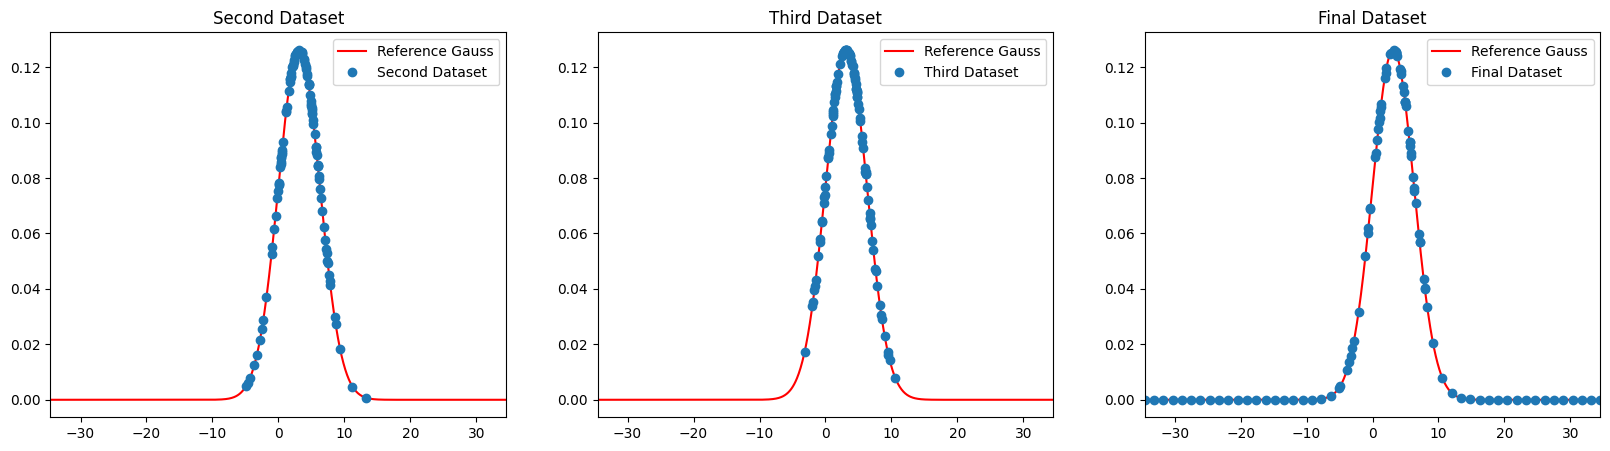

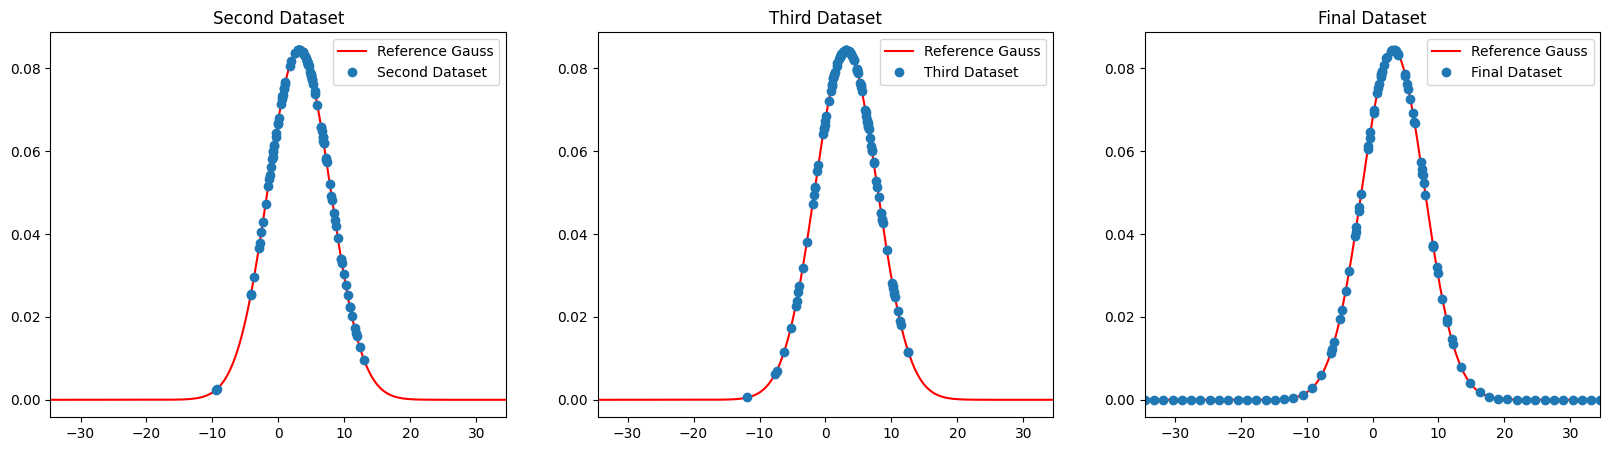

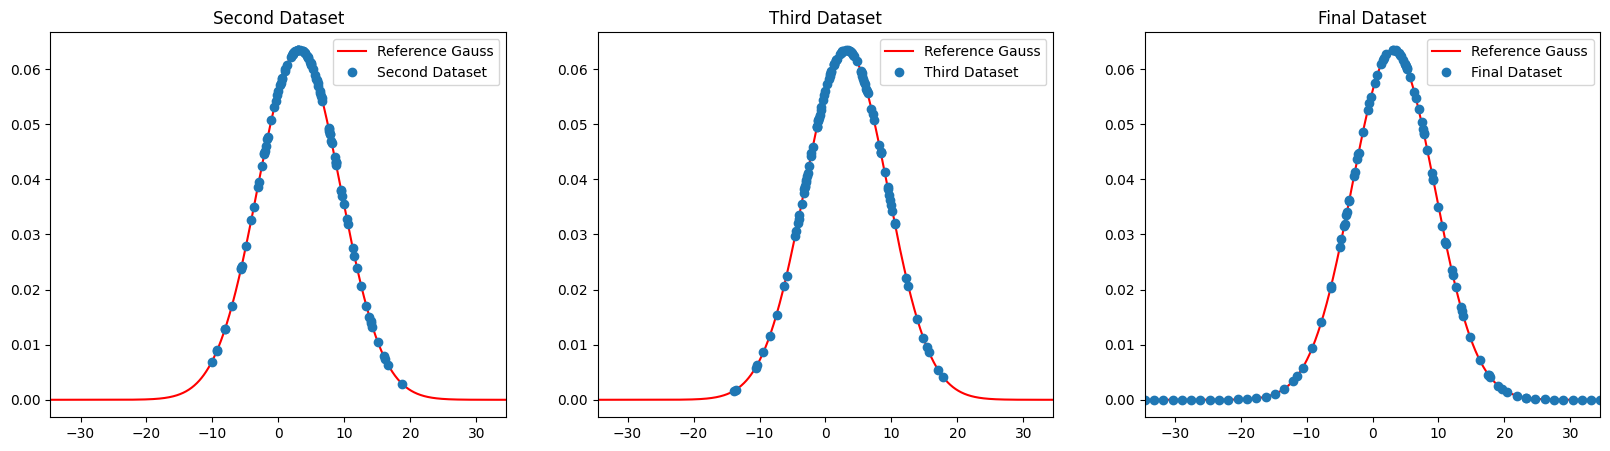

In [22]:
# For each mean and std combination draw a plot that has the reference gauss curve and the points for each dataset from second to final
import matplotlib.pyplot as plt
import numpy as np
import scipy


# Get min and max value for combination in final dataset
range_min = min_max_combinations["final_dataset"]["input"]["min"].min()
range_max = min_max_combinations["final_dataset"]["input"]["max"].max()

for mean, std in mean_std_combinations:
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(20, 5)
    
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]
    ax1.set_xlim(range_min, range_max)
    ax2.set_xlim(range_min, range_max)
    ax3.set_xlim(range_min, range_max)
    
    
    x_ref = np.linspace(range_min, range_max, 1000)
    ax1.plot(x_ref, scipy.stats.norm.pdf(x_ref, mean, std), 'r', label="Reference Gauss")
    ax2.plot(x_ref, scipy.stats.norm.pdf(x_ref, mean, std), 'r', label="Reference Gauss")
    ax3.plot(x_ref, scipy.stats.norm.pdf(x_ref, mean, std), 'r', label="Reference Gauss")
    
    ax1.set_title("Second Dataset")
    x_second = second_dataset[(second_dataset["mean"] == mean) & (second_dataset["std"] == std)]["input"]
    y_second = second_dataset[(second_dataset["mean"] == mean) & (second_dataset["std"] == std)]["Label"]
    ax1.plot(x_second, y_second, 'o', label="Second Dataset")
    
    ax2.set_title("Third Dataset")
    x_third = third_dataset[(third_dataset["mean"] == mean) & (third_dataset["std"] == std)]["input"]
    y_third = third_dataset[(third_dataset["mean"] == mean) & (third_dataset["std"] == std)]["Label"]
    ax2.plot(x_third, y_third, 'o', label="Third Dataset")
    
    ax3.set_title("Final Dataset")
    x_final = final_dataset[(final_dataset["mean"] == mean) & (final_dataset["std"] == std)]["input"]
    y_final = final_dataset[(final_dataset["mean"] == mean) & (final_dataset["std"] == std)]["Label"]
    ax3.plot(x_final, y_final, 'o', label="Final Dataset")
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    
    plt.show()

In [23]:
# Plot examples from the first dataset
first_dataset_means = first_dataset["mean"].unique()
first_dataset_means.sort()

mean_list_first = []

for i in range(3):
    if i == 0:
        mean_list_first.append(first_dataset_means[0])
    else:
        mean_list_first.append(first_dataset_means[i * int(len(first_dataset_means) / 2) - 1])
        
first_dataset_stds = first_dataset["std"].unique()
first_dataset_stds.sort()

std_list_first = []

for i in range(5):
    if i == 1:
        std_list_first.append(first_dataset_stds[i * int(len(first_dataset_means) / 4) - 1])
    else:
        continue
        
mean_std_combinations_first = list(itertools.product(mean_list_first, std_list_first))
mean_std_combinations_first


[(np.float64(-3.141592653589793), np.float64(1.5231964381798997)),
 (np.float64(-0.0317332591271695), np.float64(1.5231964381798997)),
 (np.float64(3.141592653589793), np.float64(1.5231964381798997))]

1.5231964381798997
4221      0.729865
9574      2.760794
26873     2.506927
34884    -0.729865
38365    -0.793331
            ...   
150721   -2.506927
165968   -2.253061
168695    2.951193
177168    1.808796
190106    1.237597
Name: input, Length: 100, dtype: float64
3.141592653589793


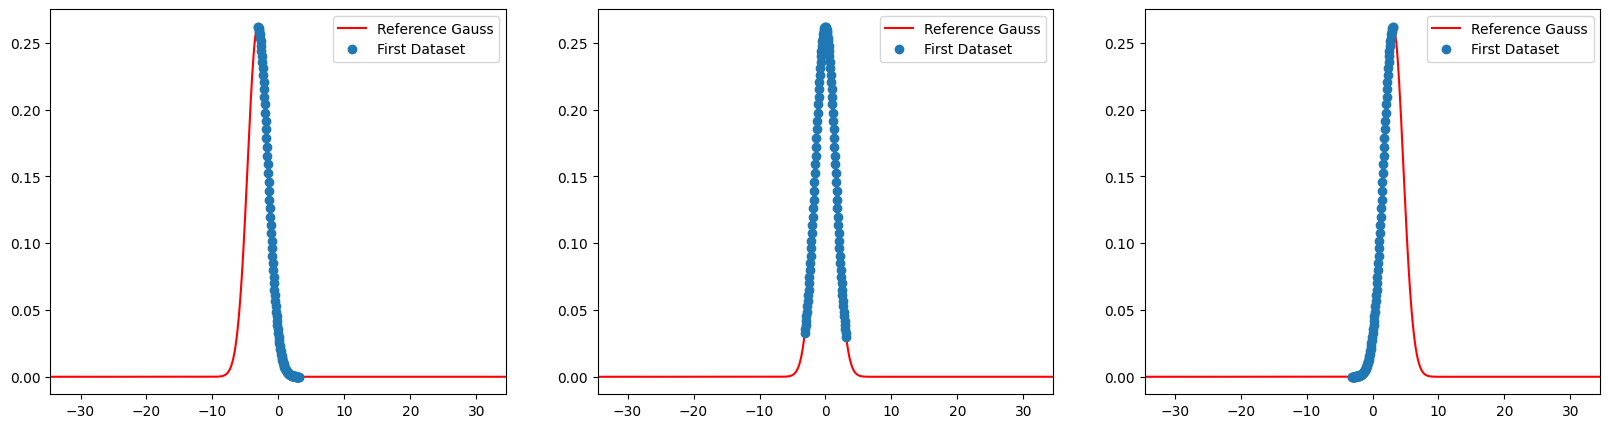

In [24]:

fig, ax = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)

std = mean_std_combinations_first[0][1]
print(std)

ax0 = ax[0]
ax1 = ax[1]
ax2 = ax[2]

ax0.set_xlim(range_min, range_max)
ax1.set_xlim(range_min, range_max)
ax2.set_xlim(range_min, range_max)

x_ref = np.linspace(range_min, range_max, 1000)
ax0.plot(x_ref, scipy.stats.norm.pdf(x_ref, mean_std_combinations_first[0][0], std), 'r', label="Reference Gauss")
ax1.plot(x_ref, scipy.stats.norm.pdf(x_ref, mean_std_combinations_first[1][0], std), 'r', label="Reference Gauss")
ax2.plot(x_ref, scipy.stats.norm.pdf(x_ref, mean_std_combinations_first[2][0], std), 'r', label="Reference Gauss")

x_first = first_dataset[(first_dataset["mean"] == mean_std_combinations_first[0][0]) & (first_dataset["std"] == std)]["input"]
y_first = first_dataset[(first_dataset["mean"] == mean_std_combinations_first[0][0]) & (first_dataset["std"] == std)]["Label"]
ax0.plot(x_first, y_first, 'o', label="First Dataset")

x_first = first_dataset[(first_dataset["mean"] == mean_std_combinations_first[1][0]) & (first_dataset["std"] == std)]["input"]
y_first = first_dataset[(first_dataset["mean"] == mean_std_combinations_first[1][0]) & (first_dataset["std"] == std)]["Label"]
ax1.plot(x_first, y_first, 'o', label="First Dataset")

x_first = first_dataset[(first_dataset["mean"] == mean_std_combinations_first[2][0]) & (first_dataset["std"] == std)]["input"]
print(x_first)
print(mean_std_combinations_first[2][0])
y_first = first_dataset[(first_dataset["mean"] == mean_std_combinations_first[2][0]) & (first_dataset["std"] == std)]["Label"]
ax2.plot(x_first, y_first, 'o', label="First Dataset")

ax0.legend()
ax1.legend()
ax2.legend()

plt.show()

# New Dataset with low STD
We want to also analyse the distribution for our new further improvements dataset

In [25]:
final_improve_df = load_and_combine_df("../final_results_extraextra_attempts_unscaled_inputs/extraextra_lin_unchangedinp_log1p_train_data.csv", "../final_results_extraextra_attempts_unscaled_inputs/extraextra_lin_unchangedinp_log1p_test_data.csv")
final_improve_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   input   1000000 non-null  float64
 1   mean    1000000 non-null  float64
 2   std     1000000 non-null  float64
 3   Label   1000000 non-null  float64
dtypes: float64(4)
memory usage: 38.1 MB


In [26]:
final_improve_df.describe()

input          mean             std         Label
count  1.000000e+06  1.000000e+06  1000000.000000  1.000000e+06
mean  -5.132961e-17  8.141043e-17        0.500500  2.502308e-01
std    2.632193e+00  5.831532e-01        0.291285  5.134974e-01
min   -6.000000e+00 -1.000000e+00        0.001000  0.000000e+00
25%   -1.346939e+00 -5.000000e-01        0.250750  4.195522e-09
50%    0.000000e+00  5.030698e-17        0.500500  4.389753e-02
75%    1.346939e+00  5.000000e-01        0.750250  3.312014e-01
max    6.000000e+00  1.000000e+00        1.000000  5.991320e+00

In [27]:
# Get all combinations of mean and std
mean_std_combinations_improve = final_improve_df.groupby(['mean', 'std']).size().reset_index(name='count')
mean_std_combinations_improve

mean       std  count
0     -1.0  0.001000    100
1     -1.0  0.011091    100
2     -1.0  0.021182    100
3     -1.0  0.031273    100
4     -1.0  0.041364    100
...    ...       ...    ...
9995   1.0  0.959636    100
9996   1.0  0.969727    100
9997   1.0  0.979818    100
9998   1.0  0.989909    100
9999   1.0  1.000000    100

[10000 rows x 3 columns]

In [28]:
# All unique means
unique_means_improve = final_improve_df["mean"].unique()
unique_means_improve.sort()
unique_means_improve[50]

np.float64(0.0101010101010101)

In [29]:
# Get min and max value for combination in final dataset
range_min_improve = final_improve_df["input"].min()
range_max_improve = final_improve_df["input"].max()


100


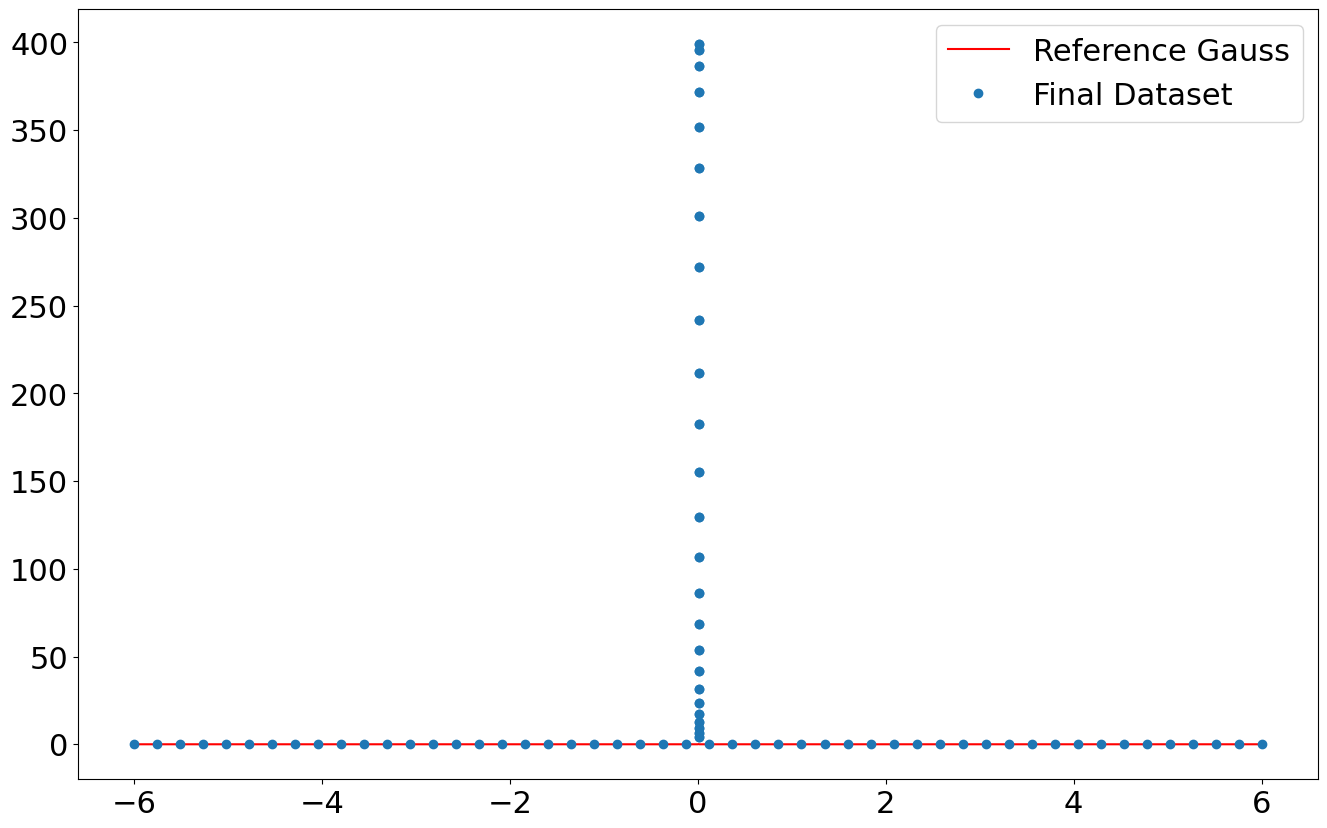

100


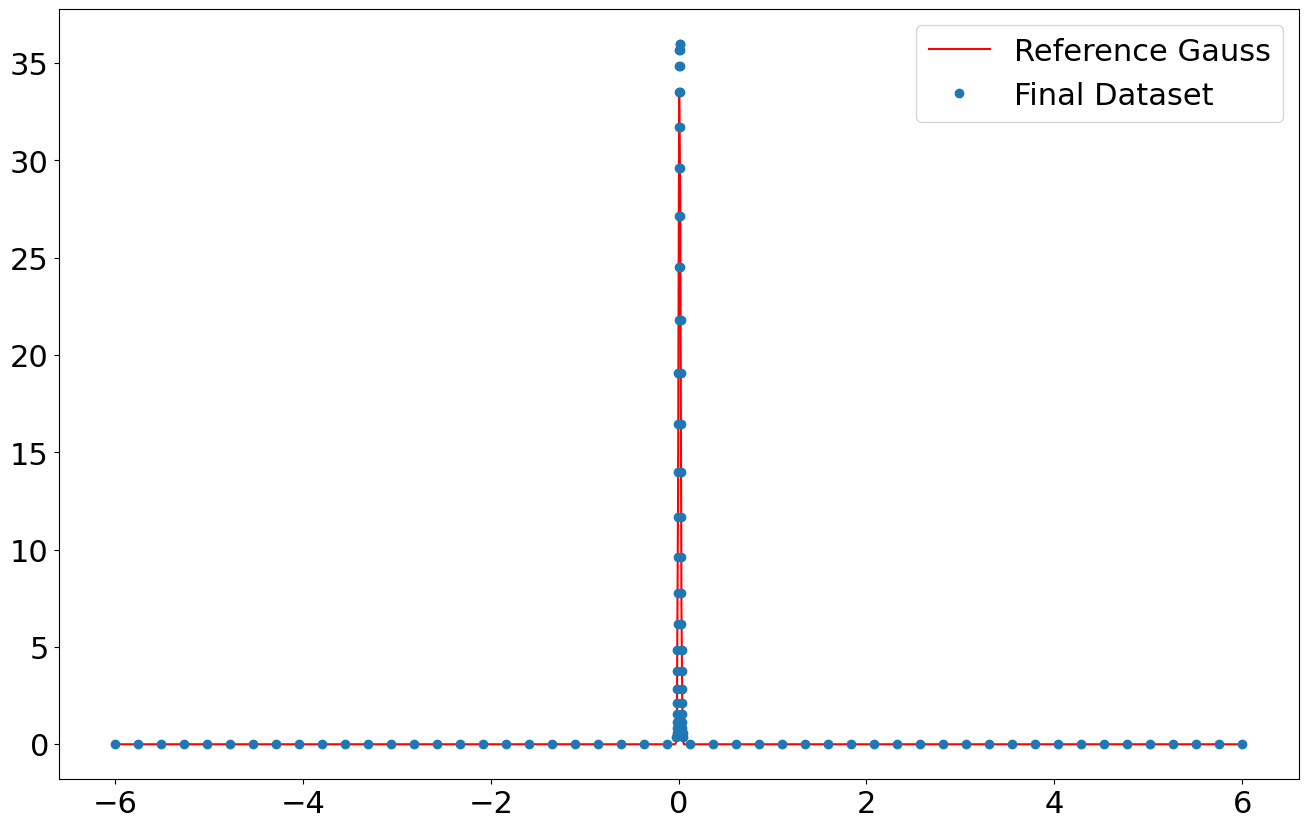

100


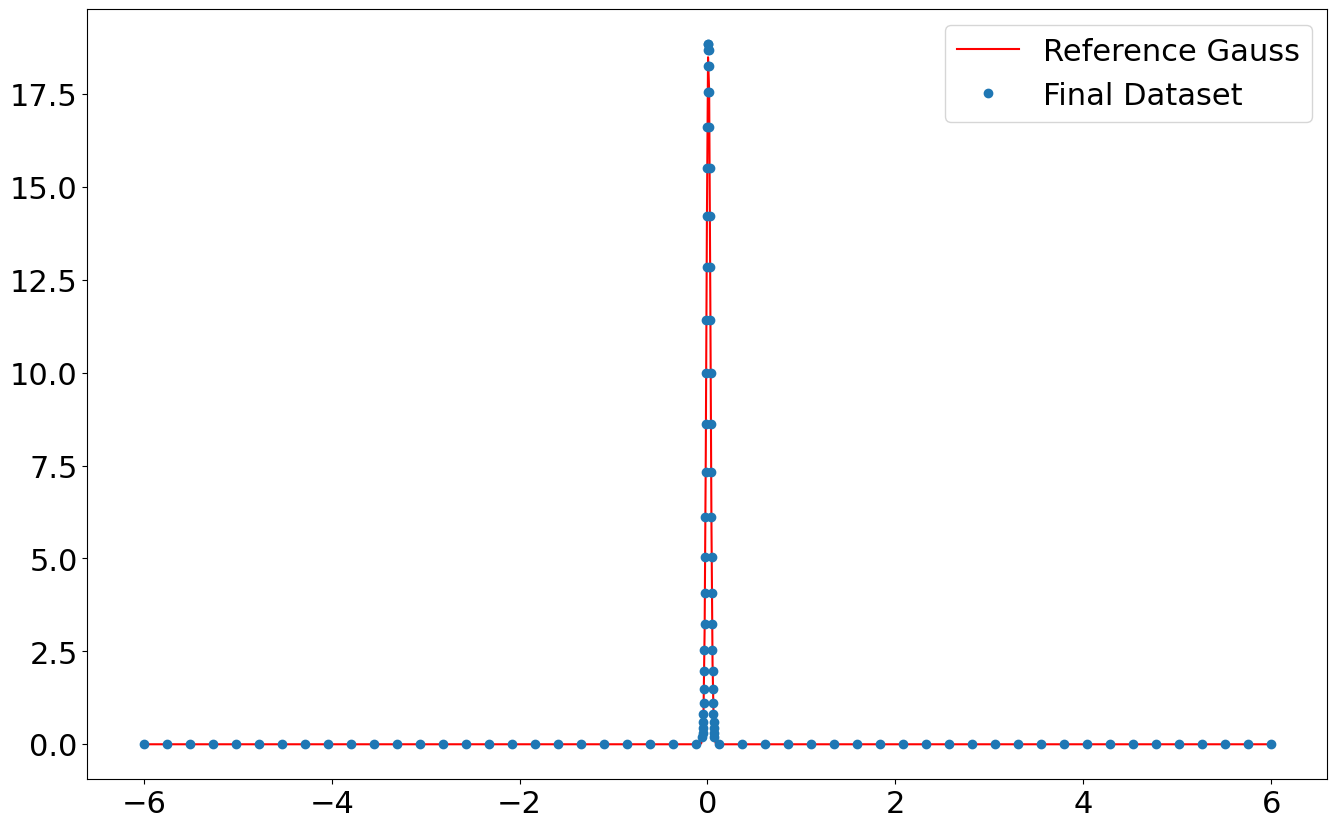

100


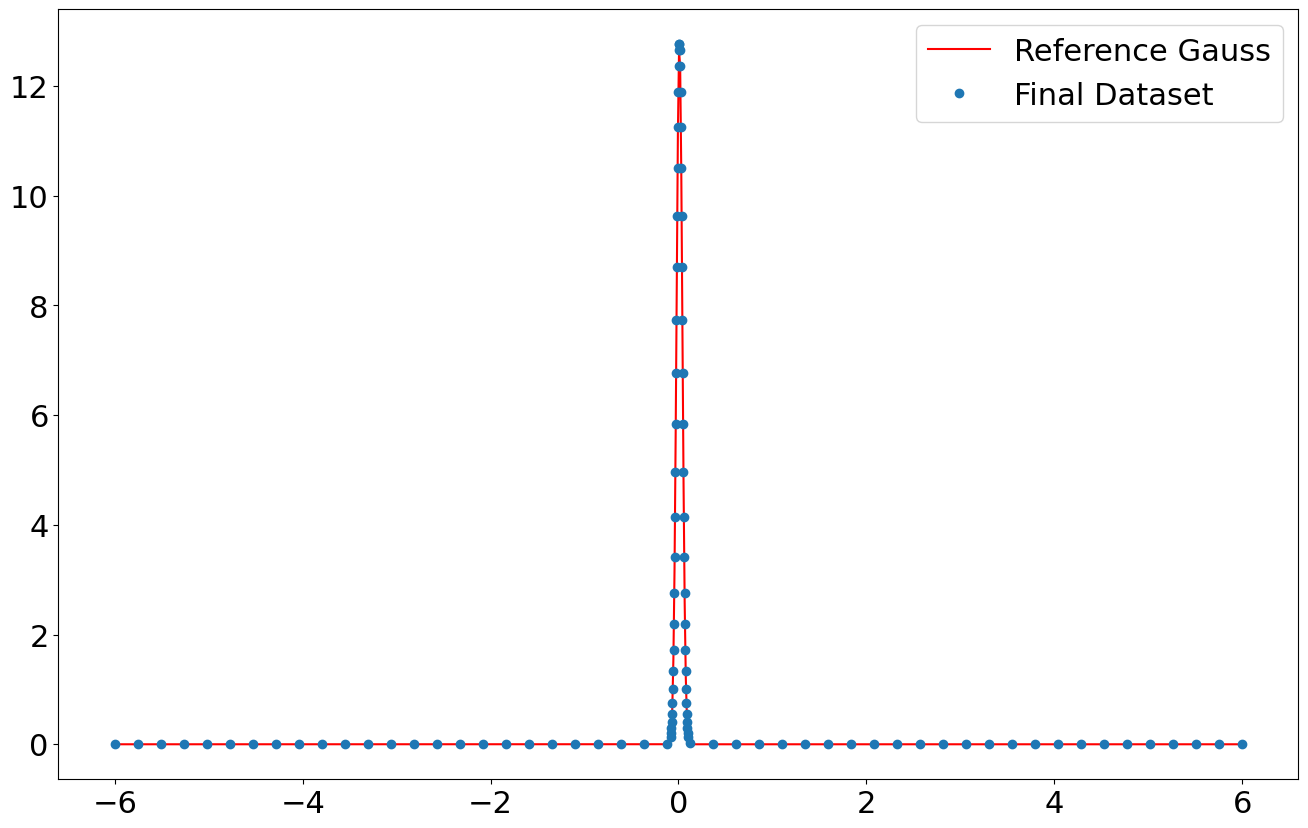

100


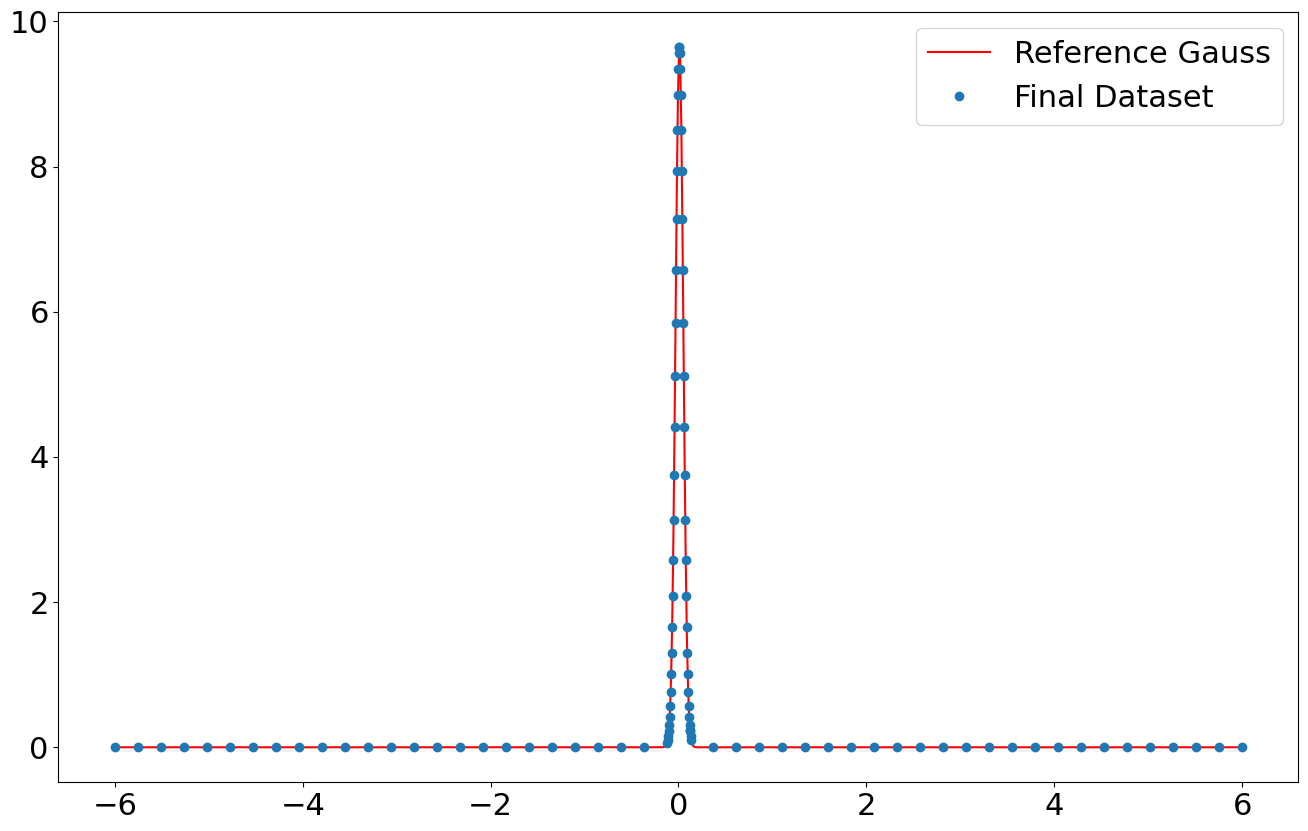

100


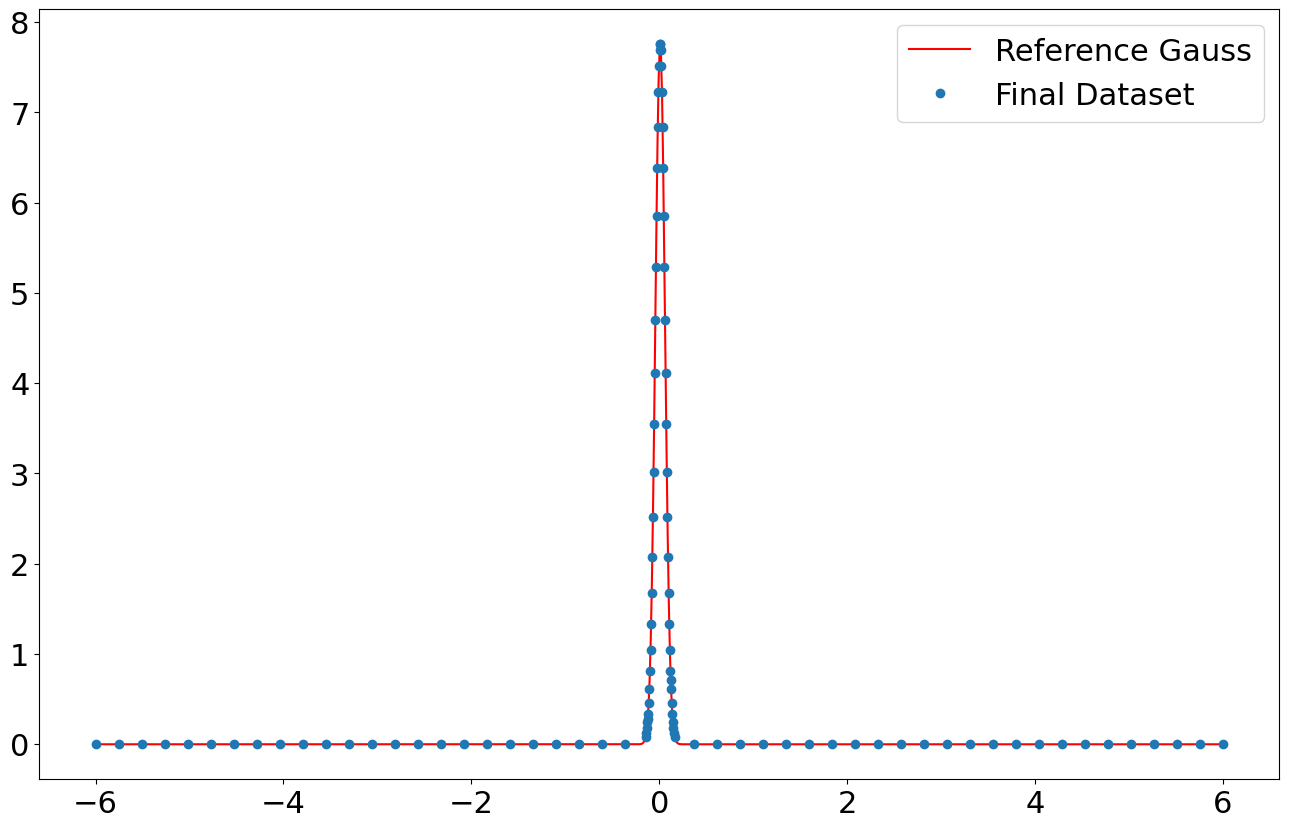

100


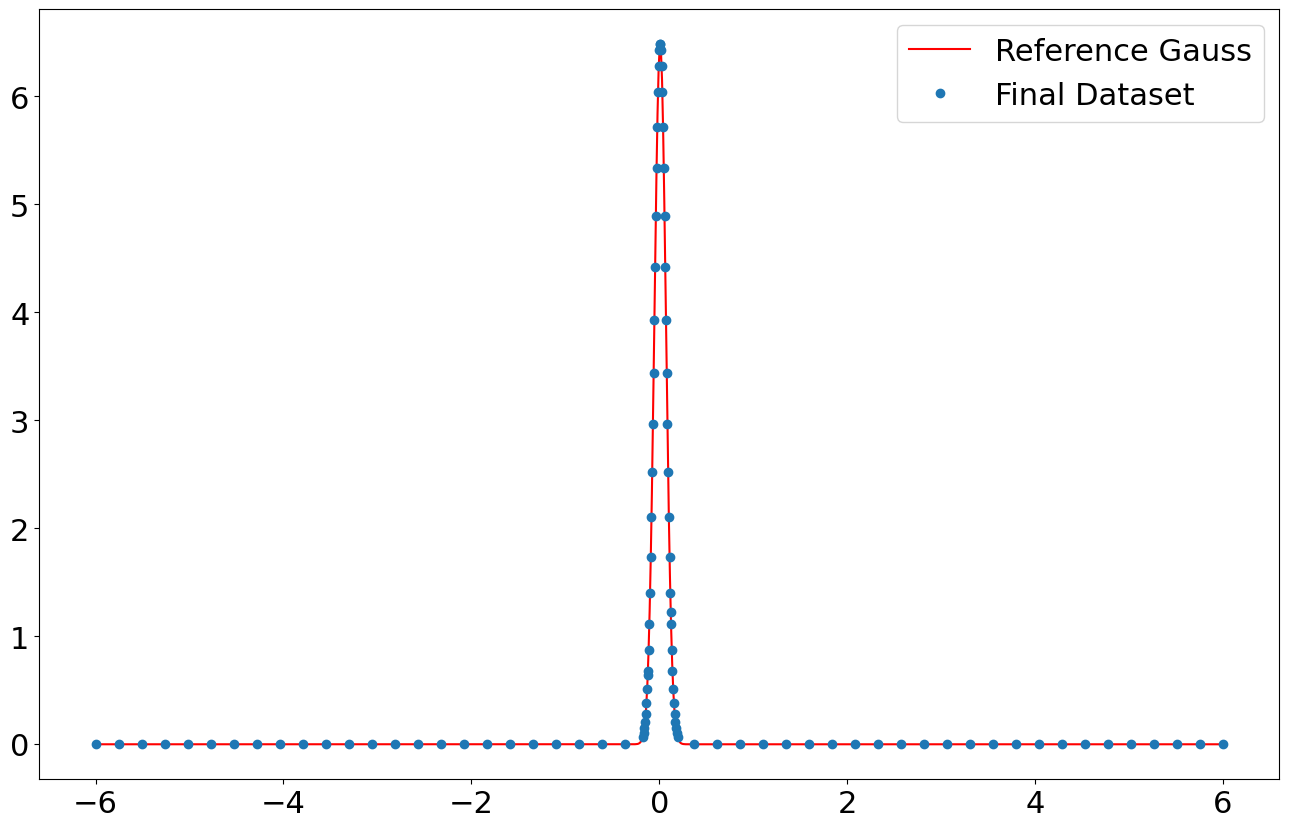

100


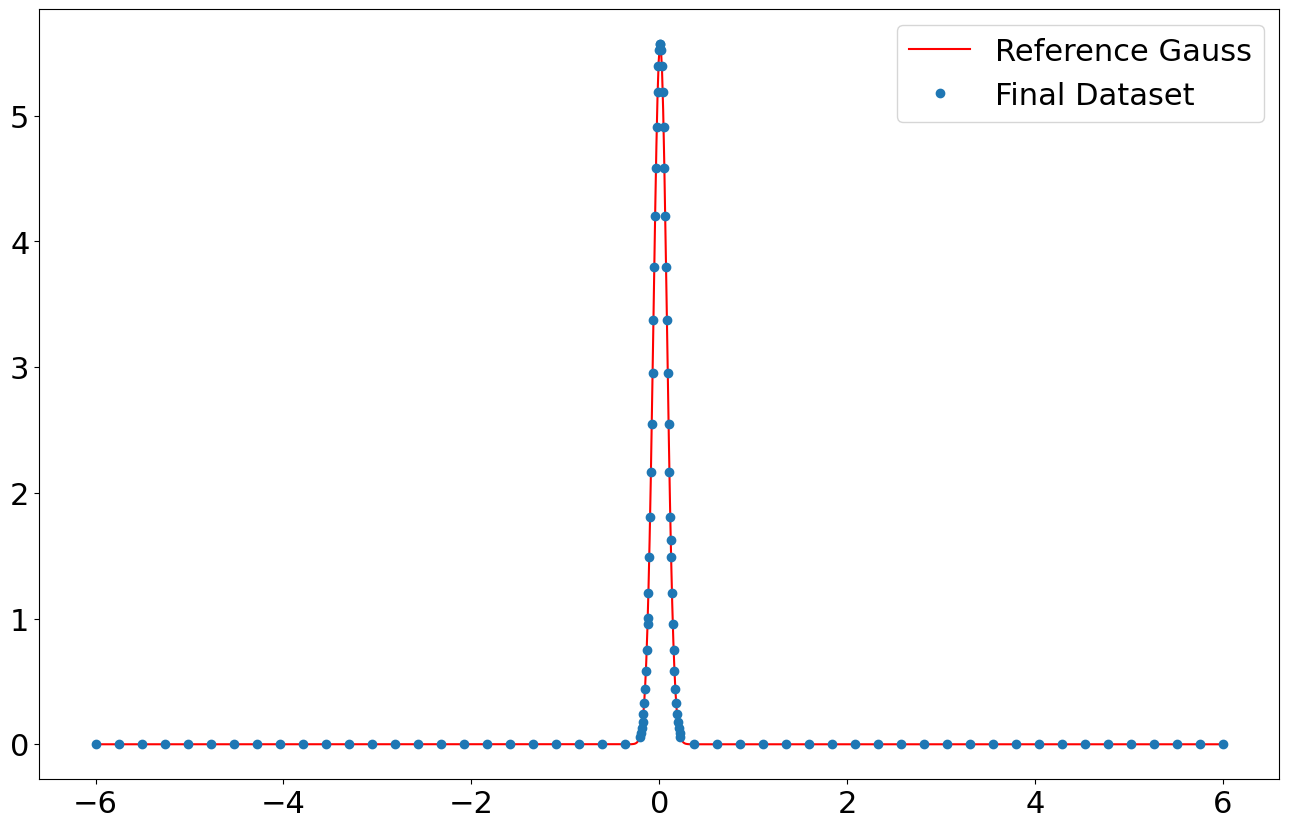

100


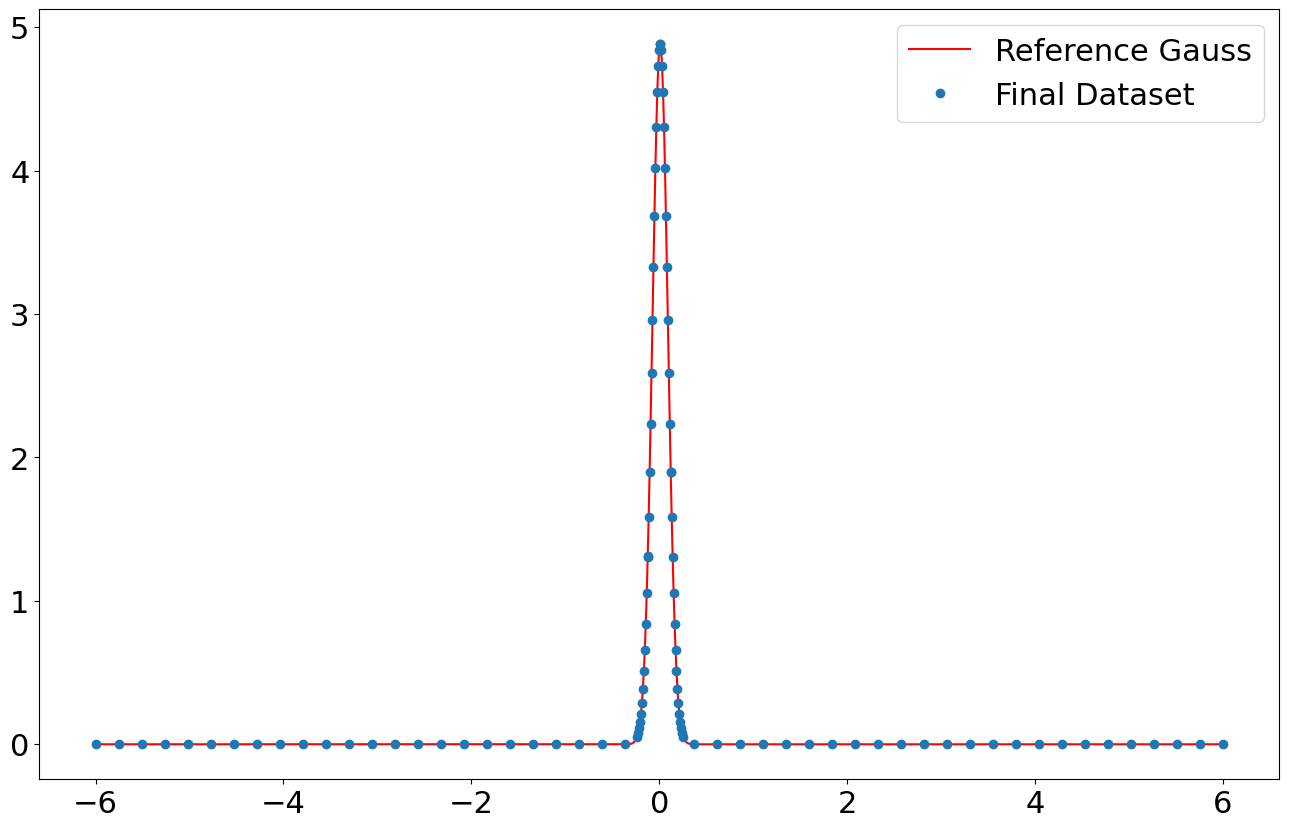

100


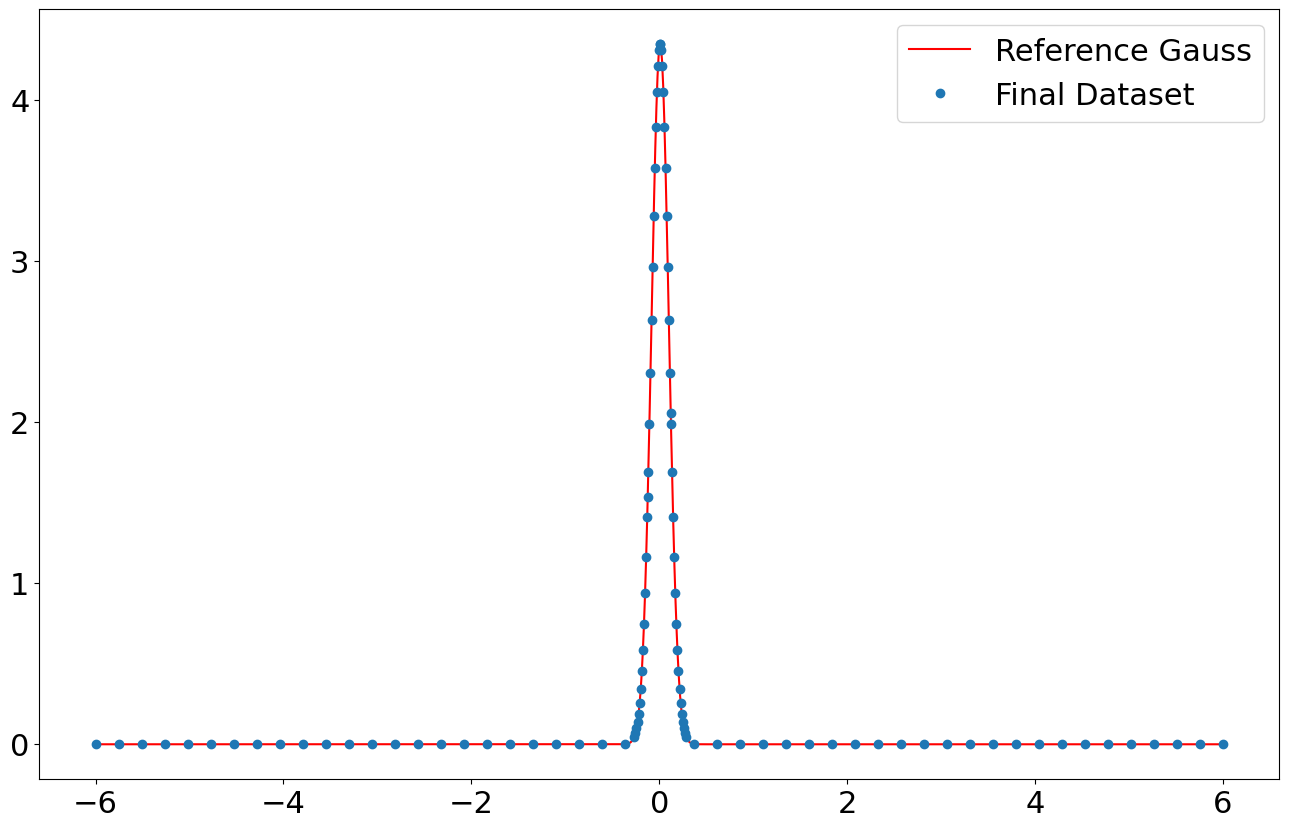

100


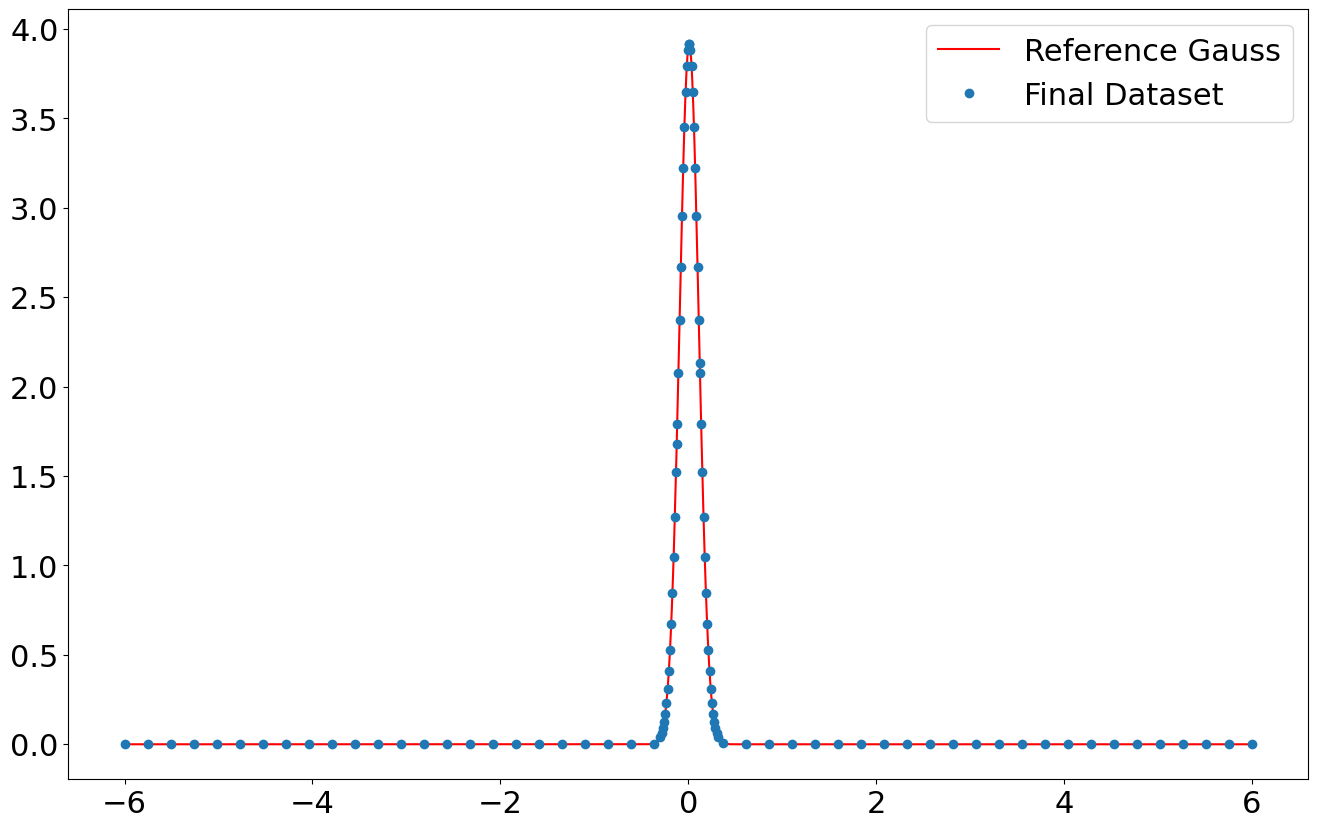

100


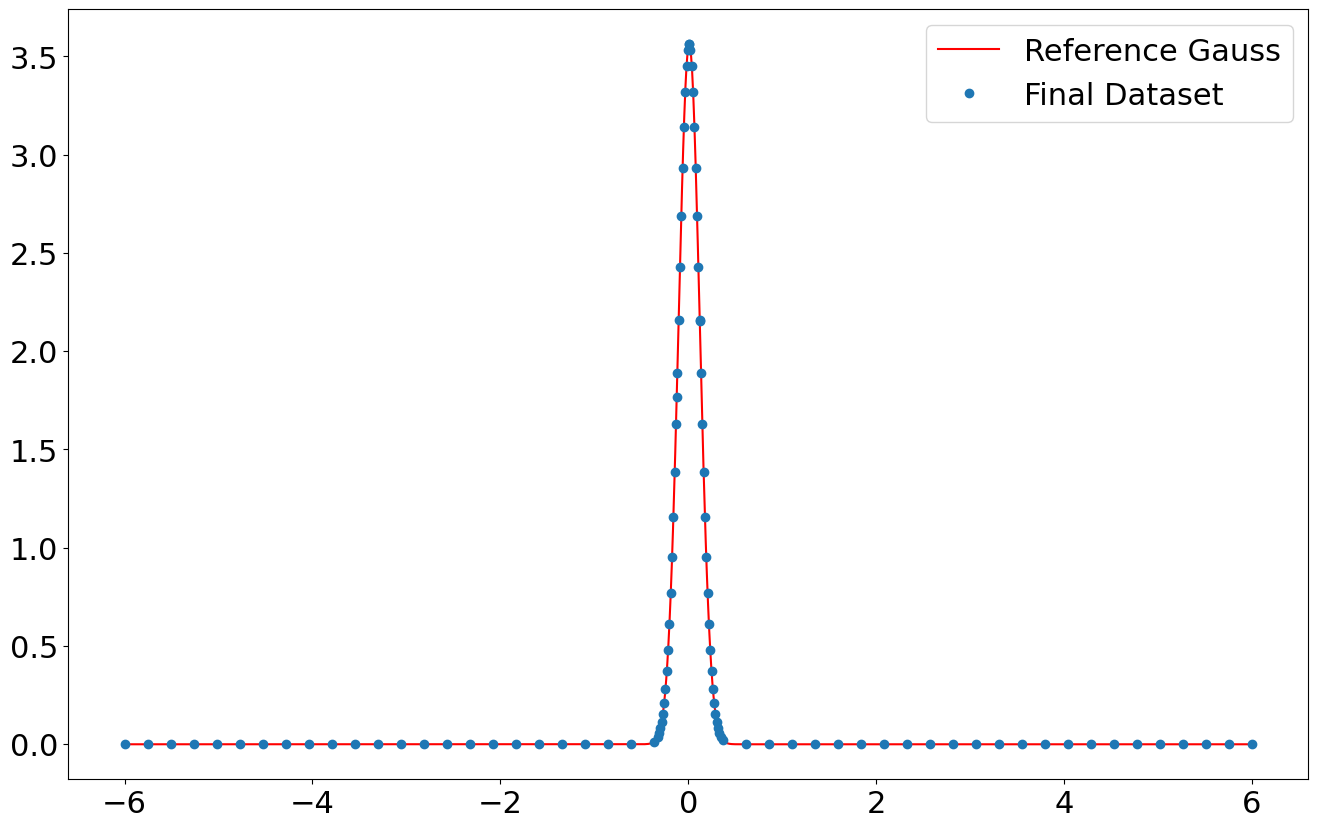

100


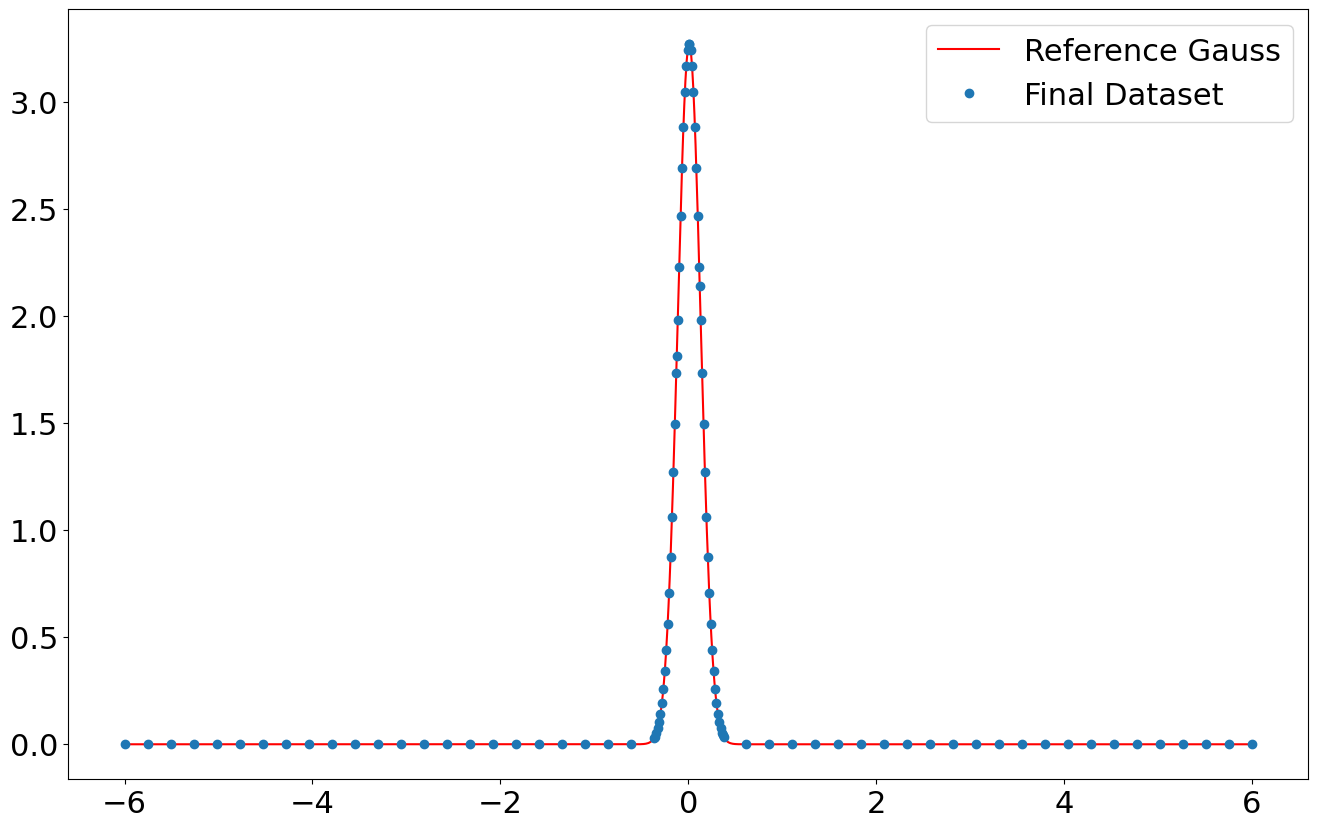

100


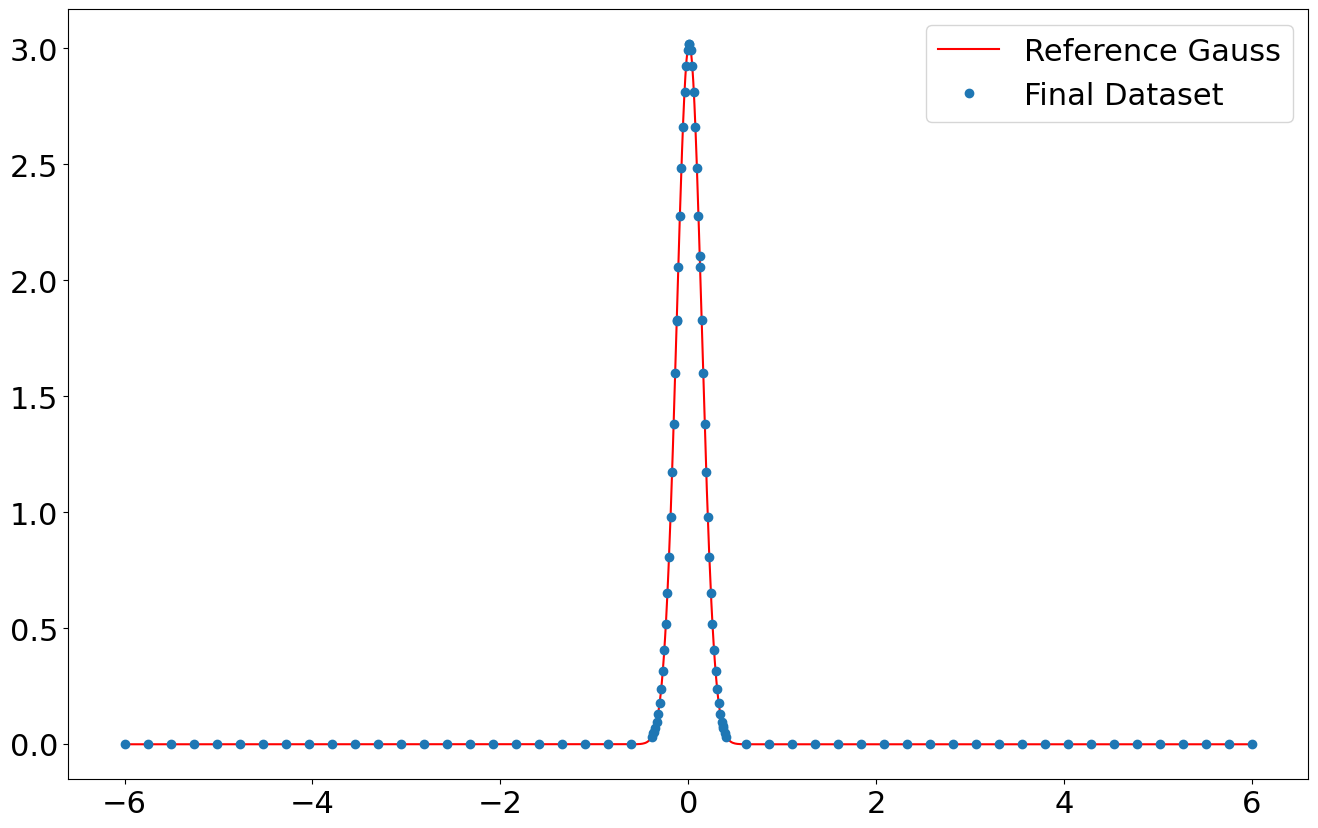

100


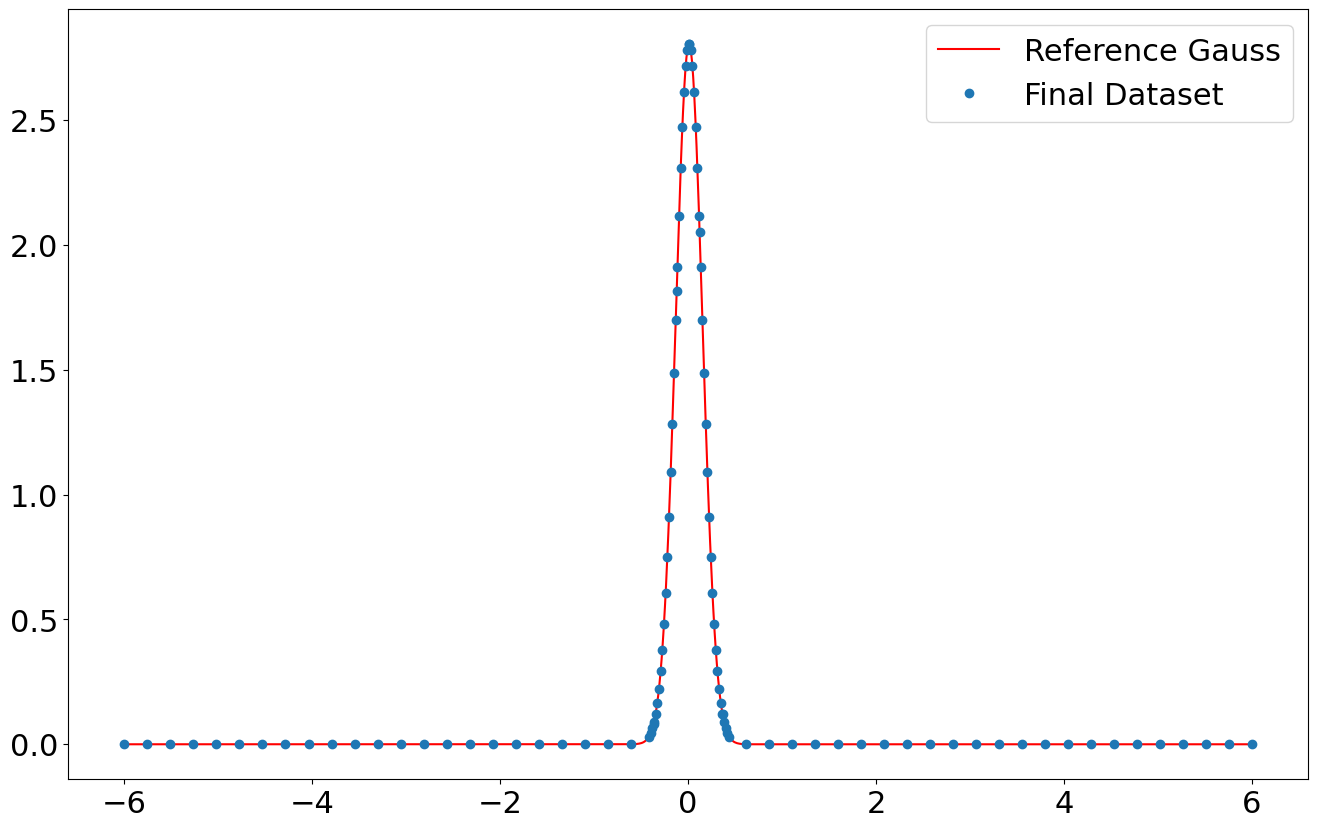

100


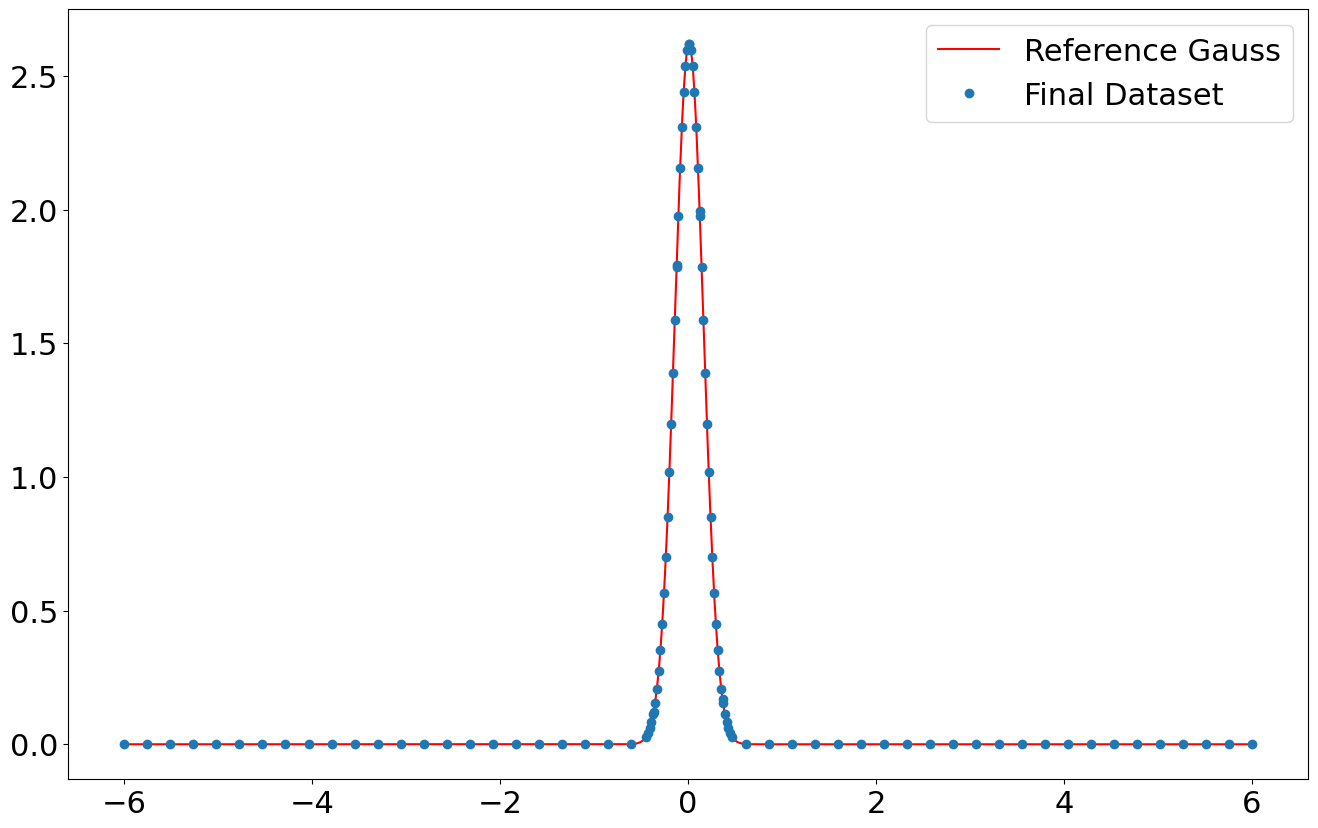

100


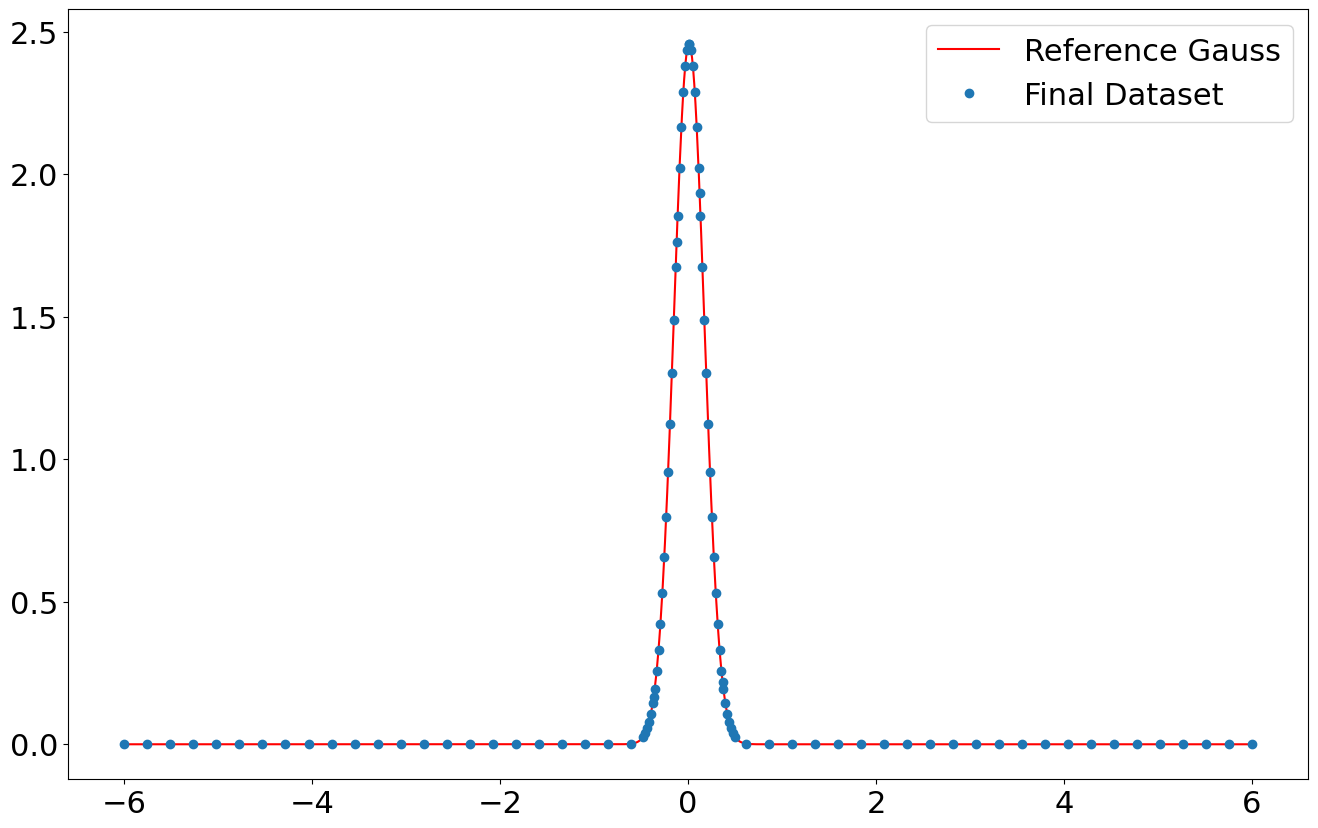

100


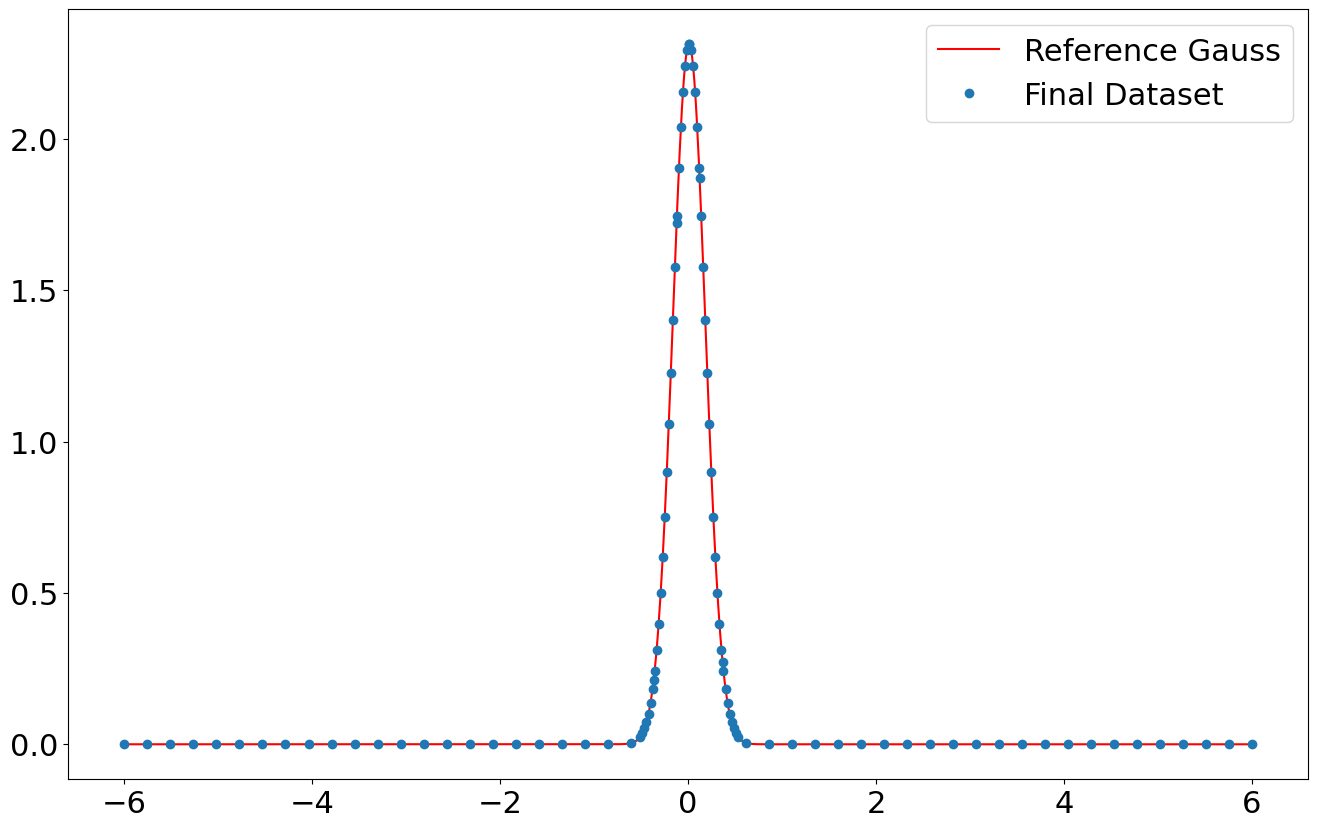

100


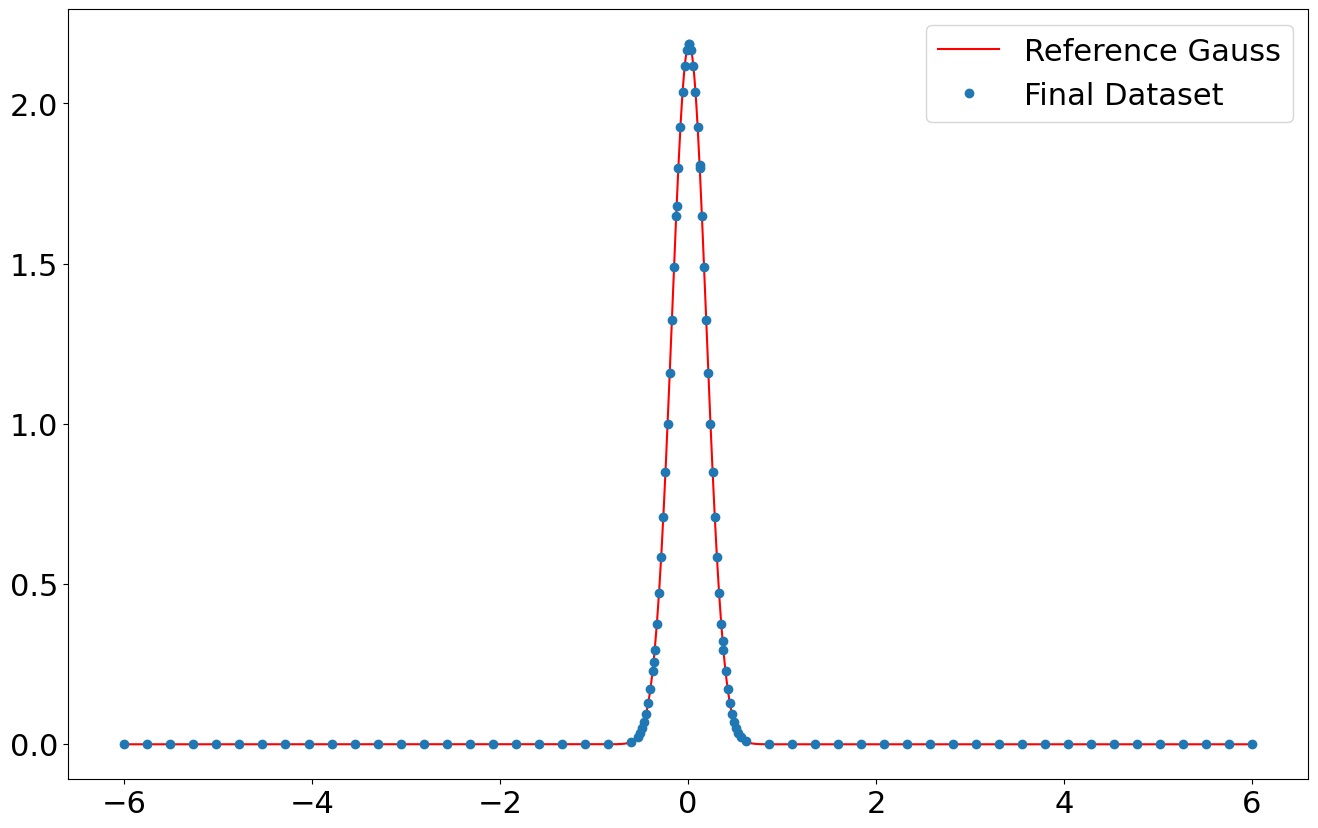

100


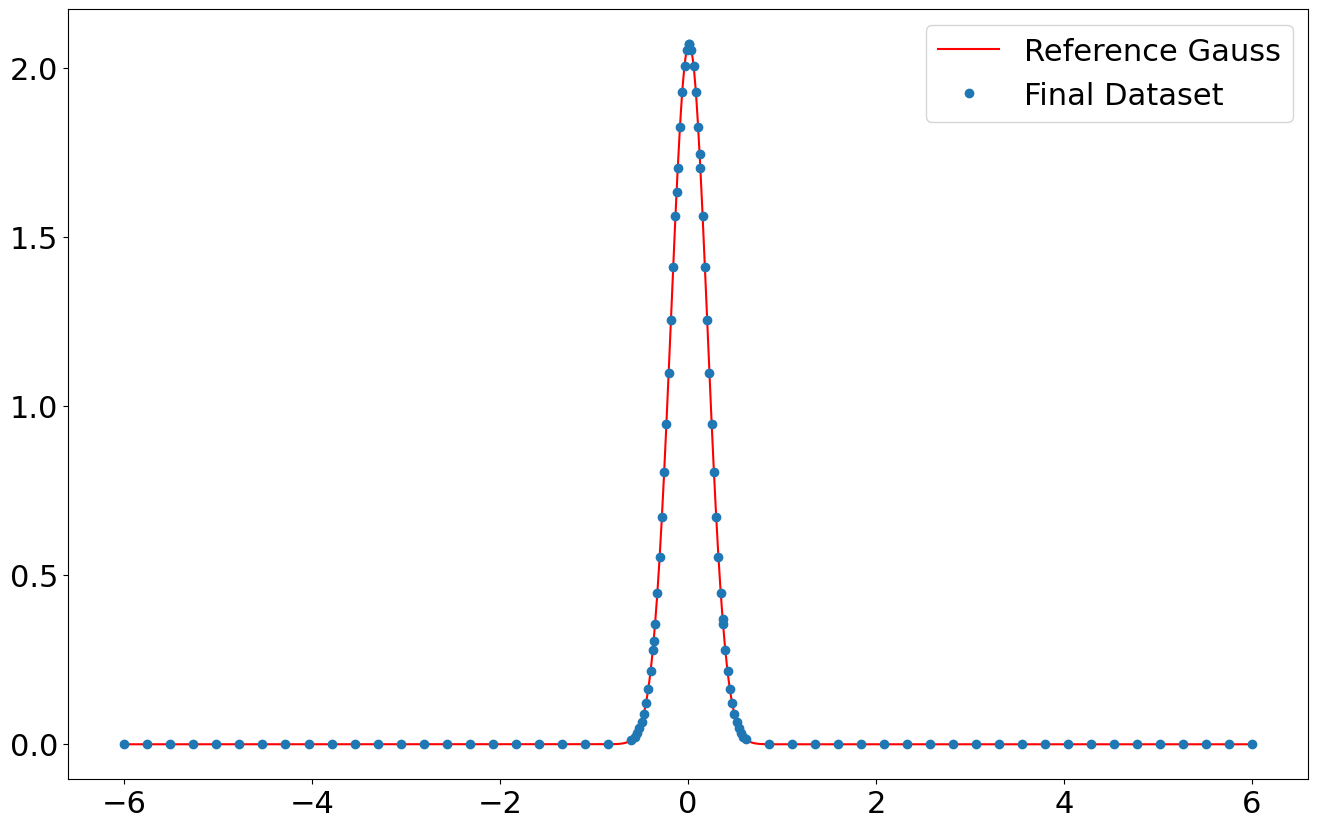

100


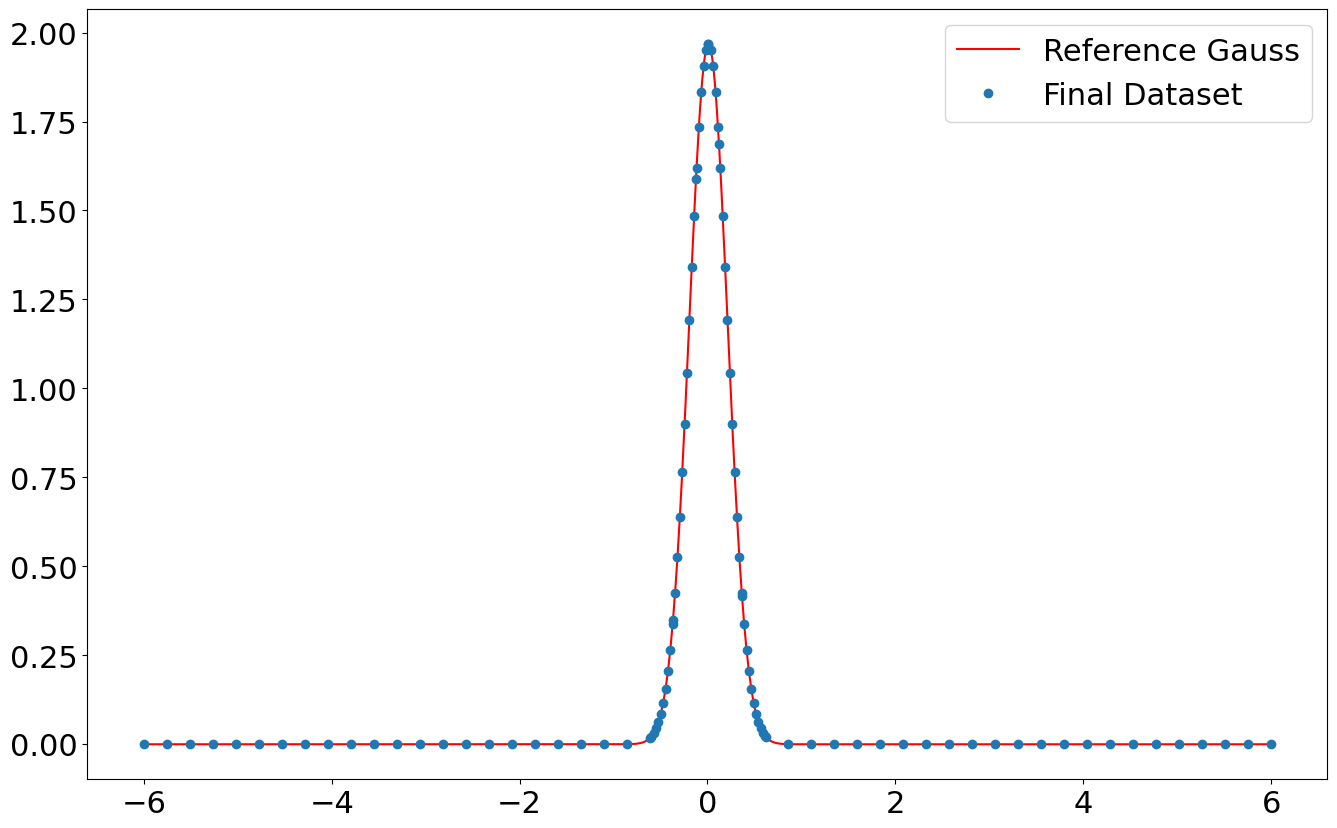

100


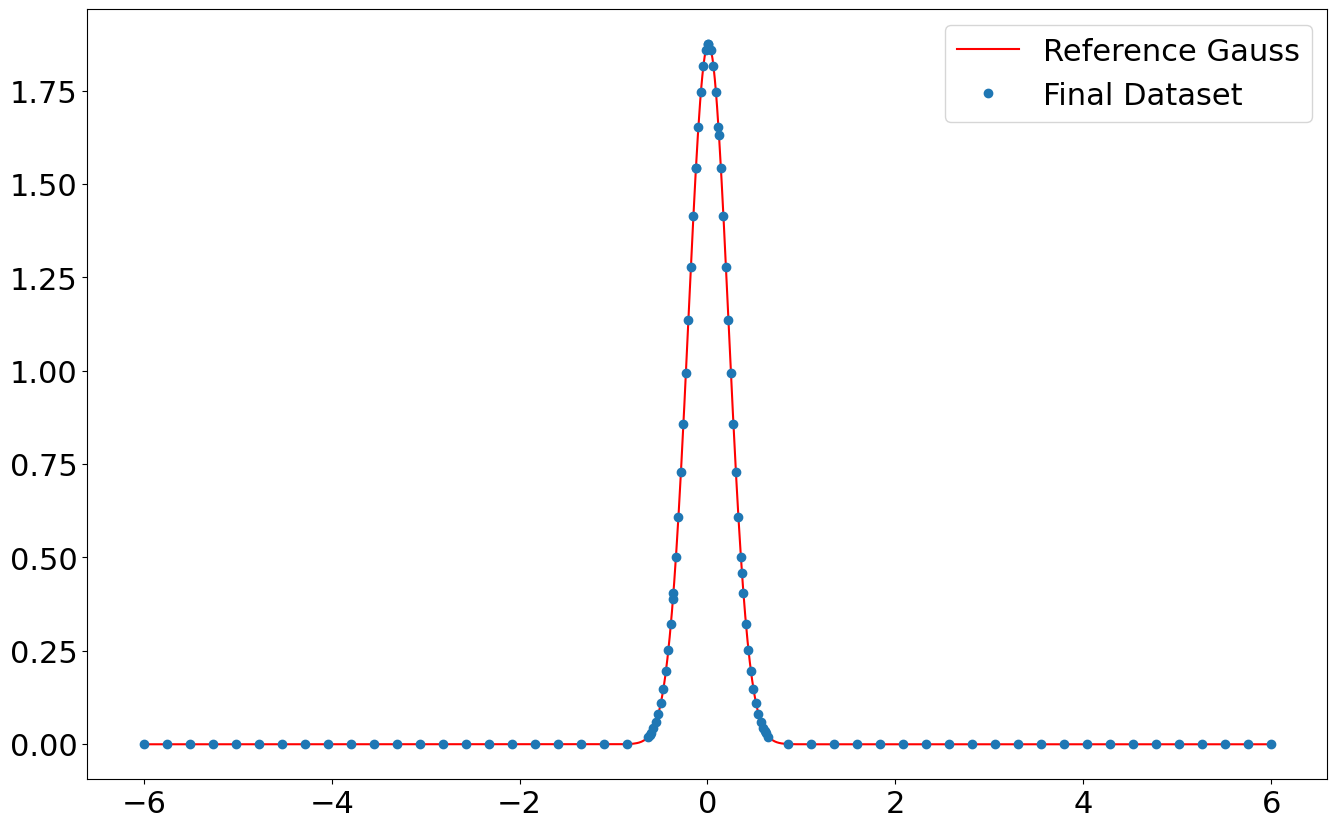

100


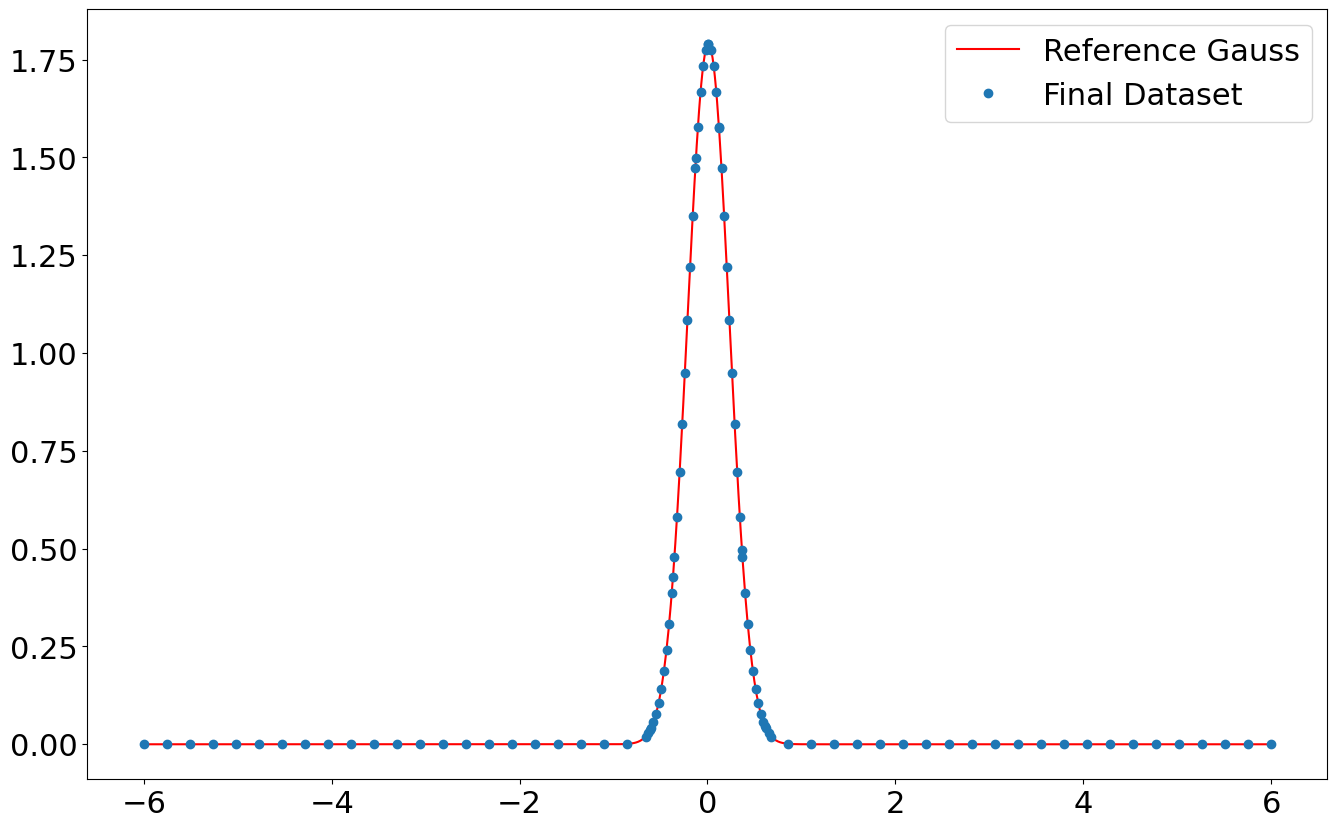

100


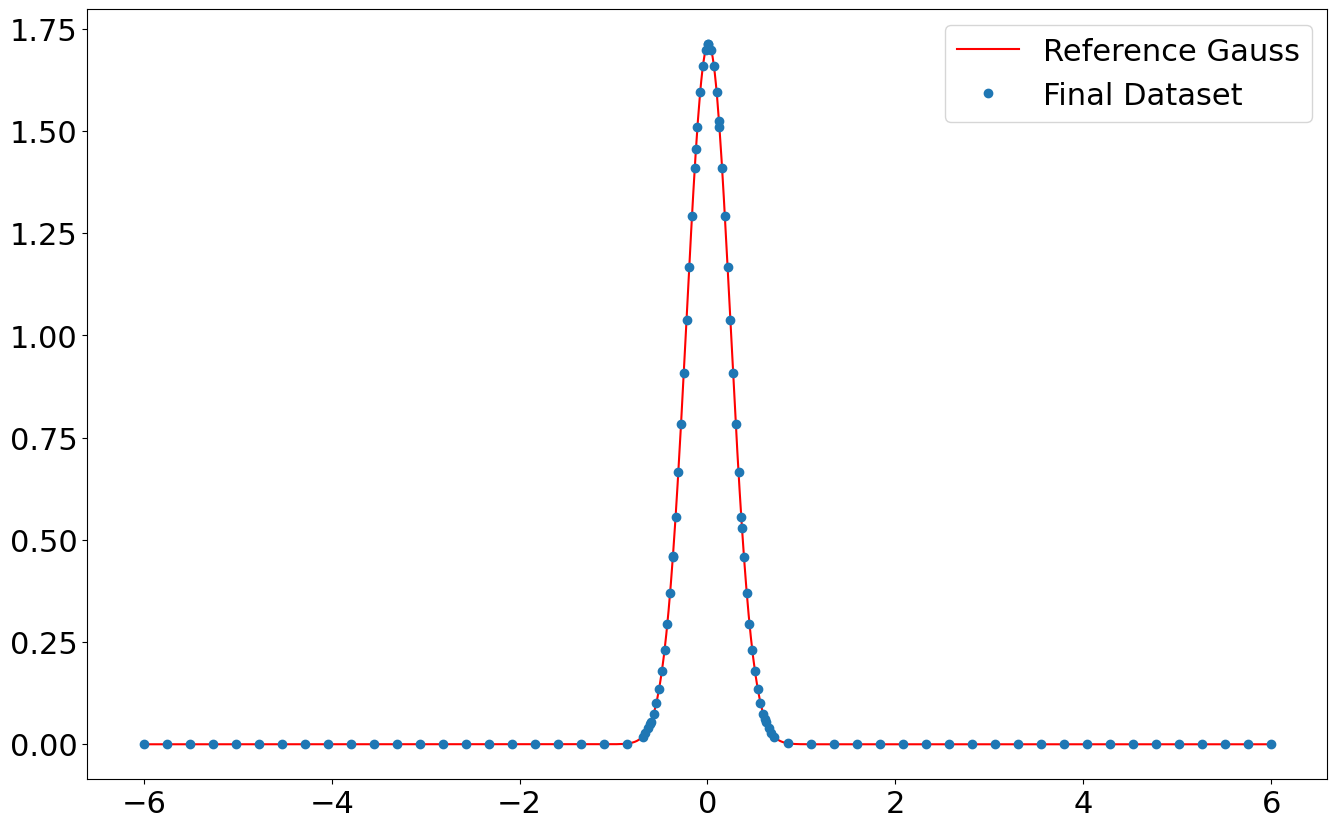

100


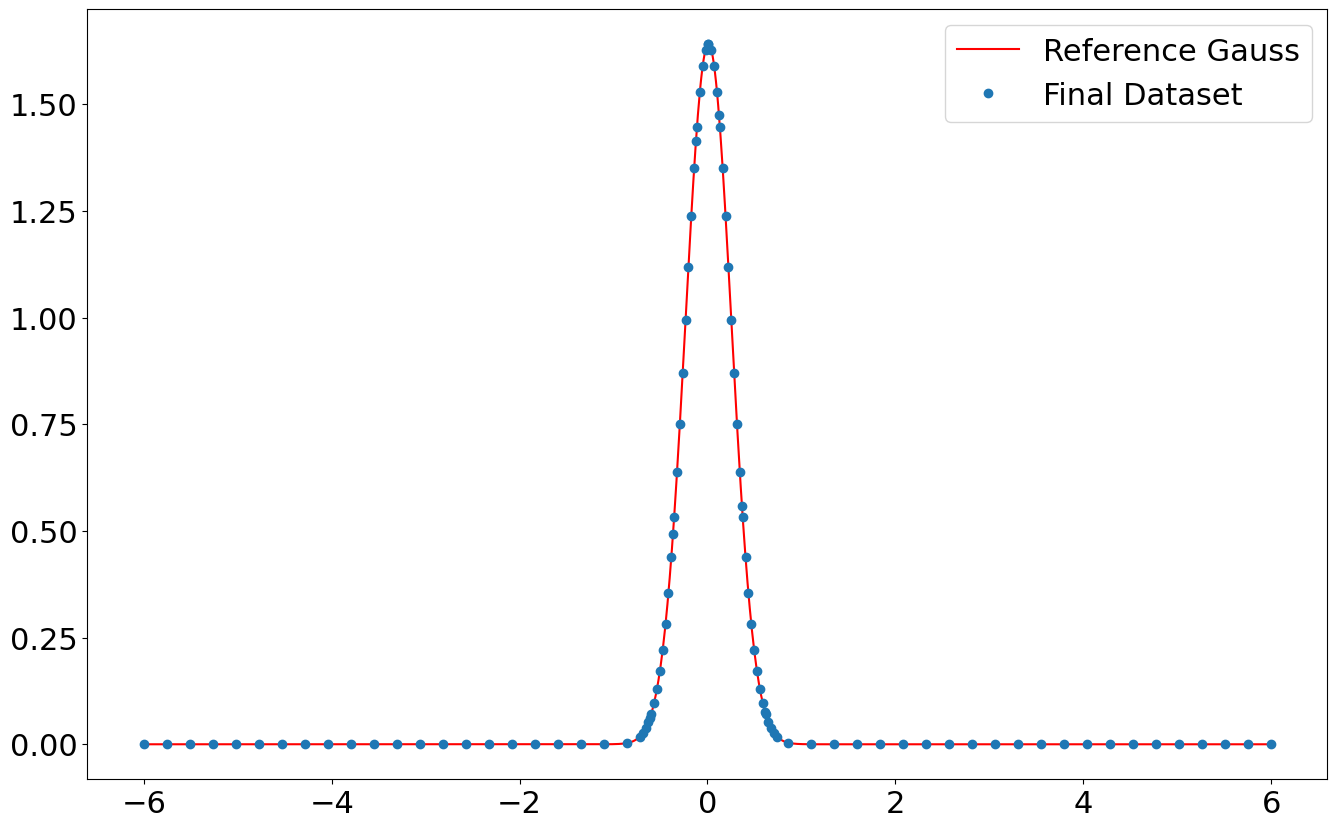

100


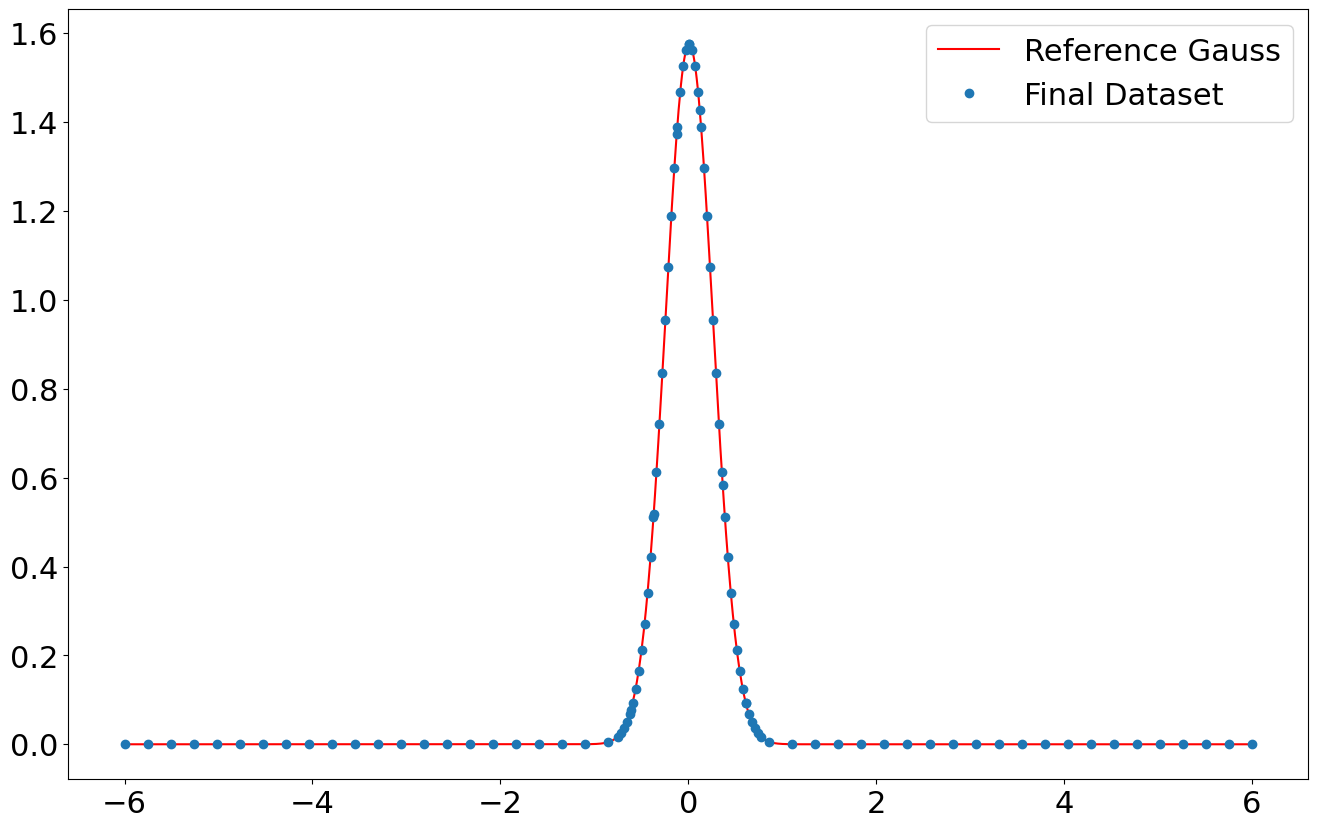

100


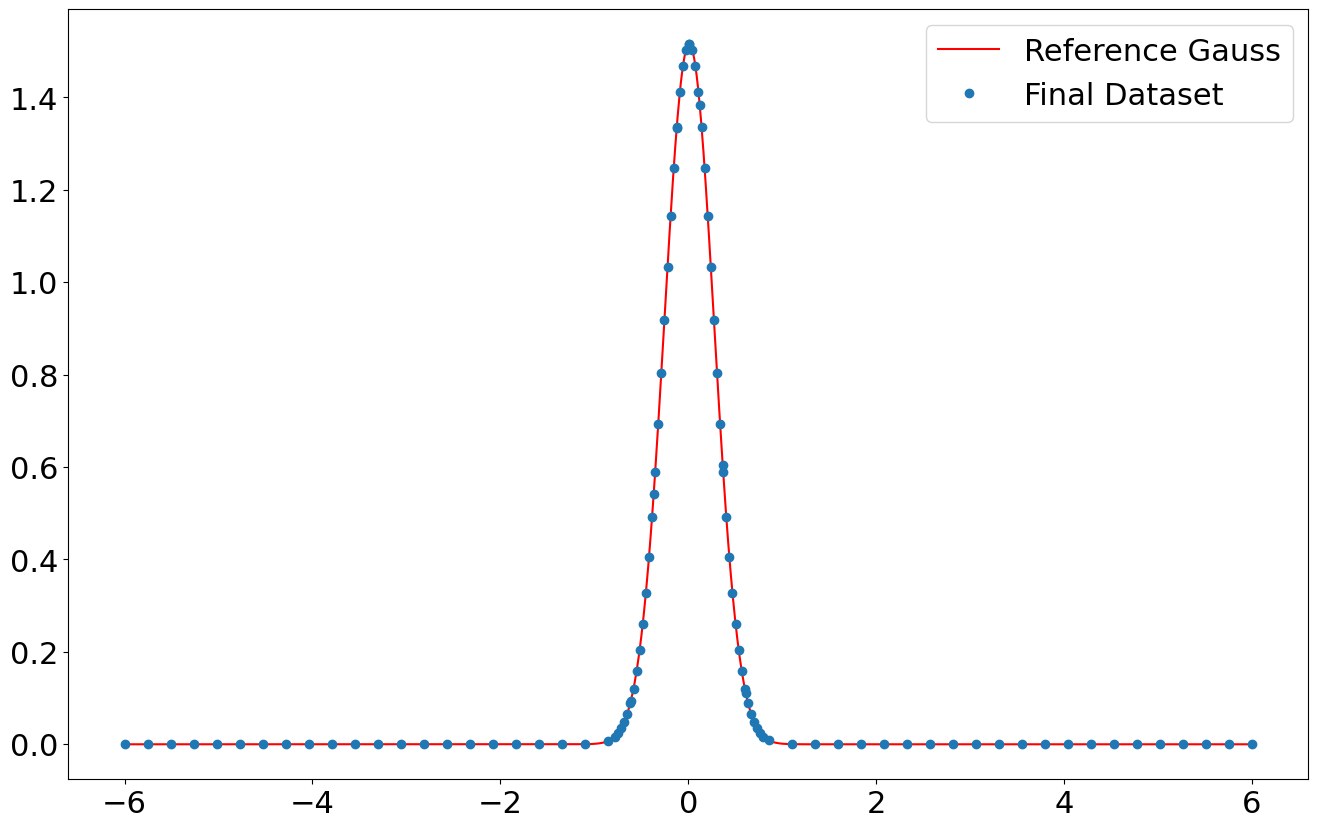

100


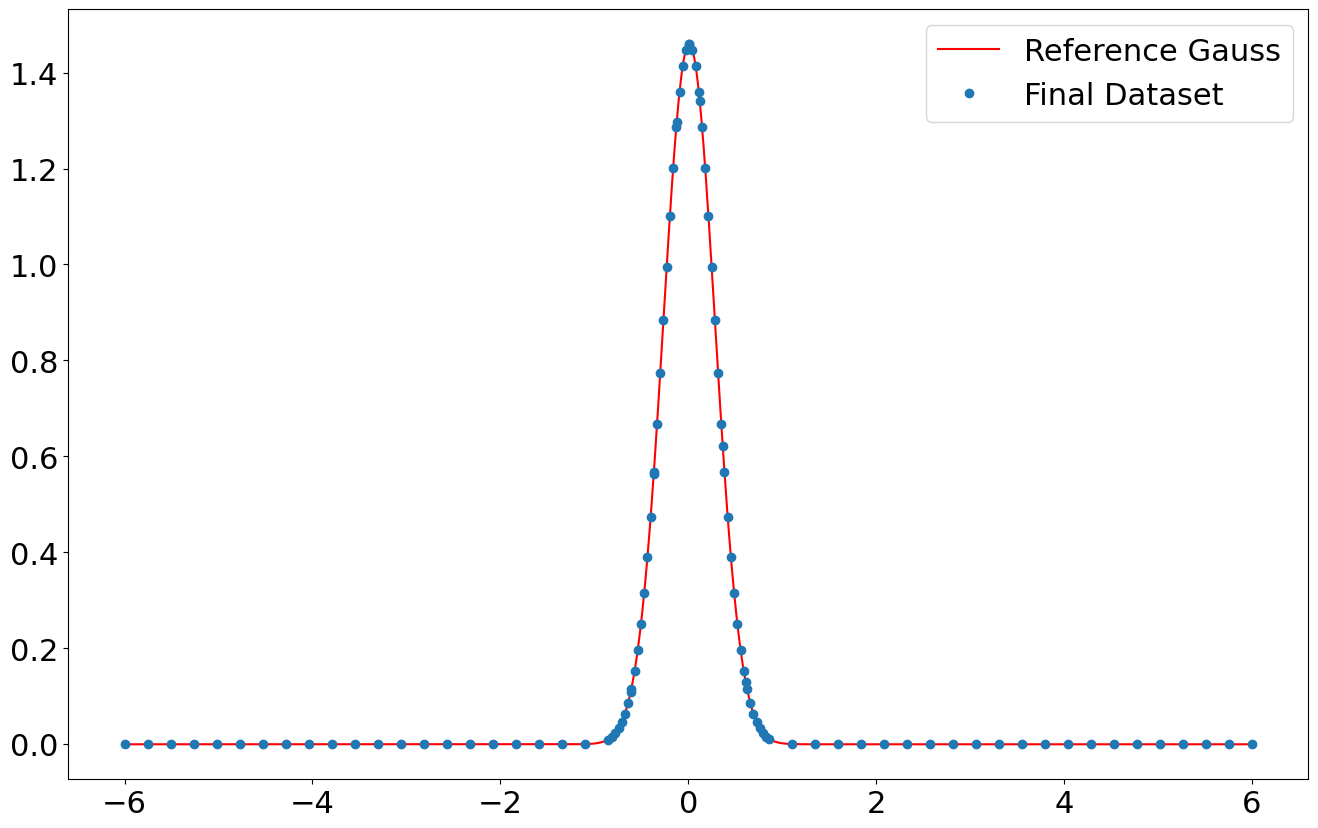

100


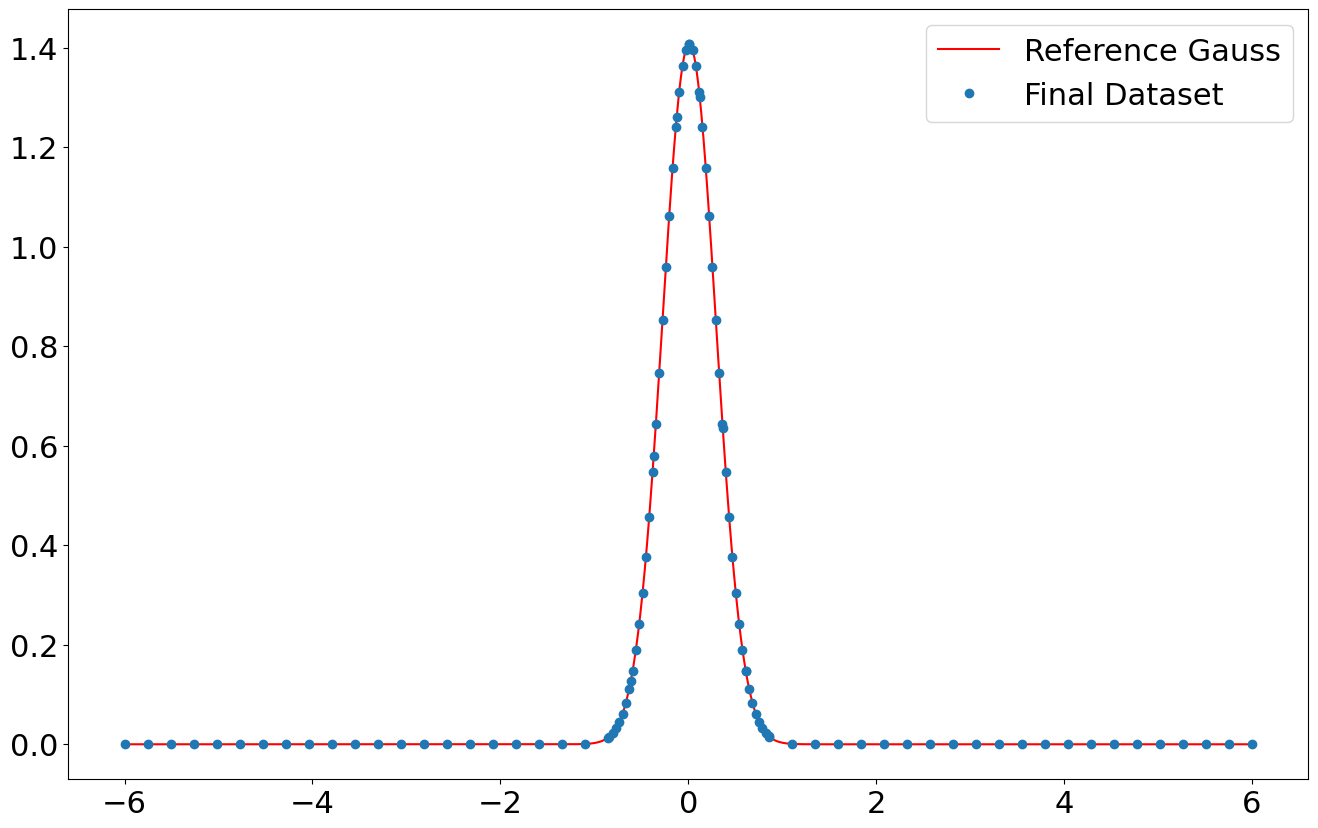

100


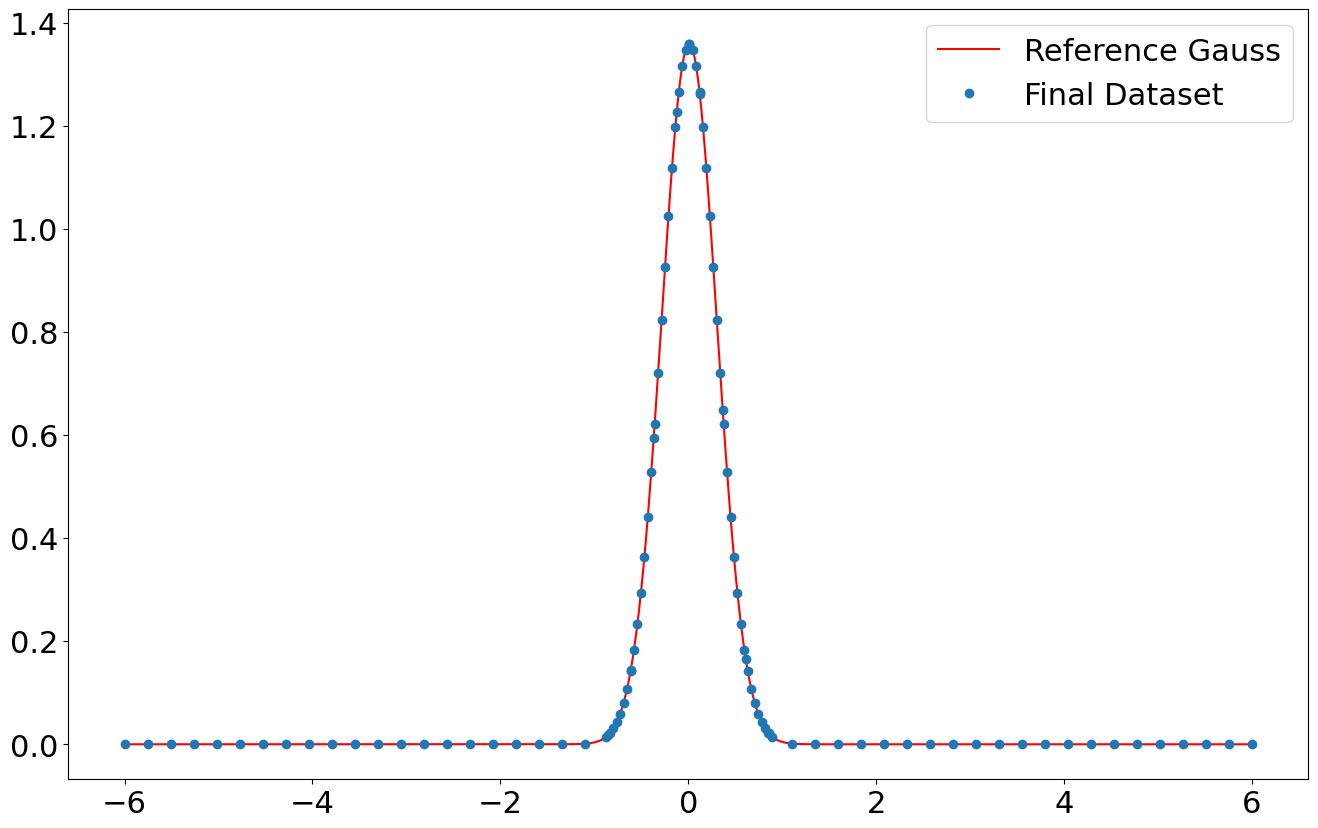

100


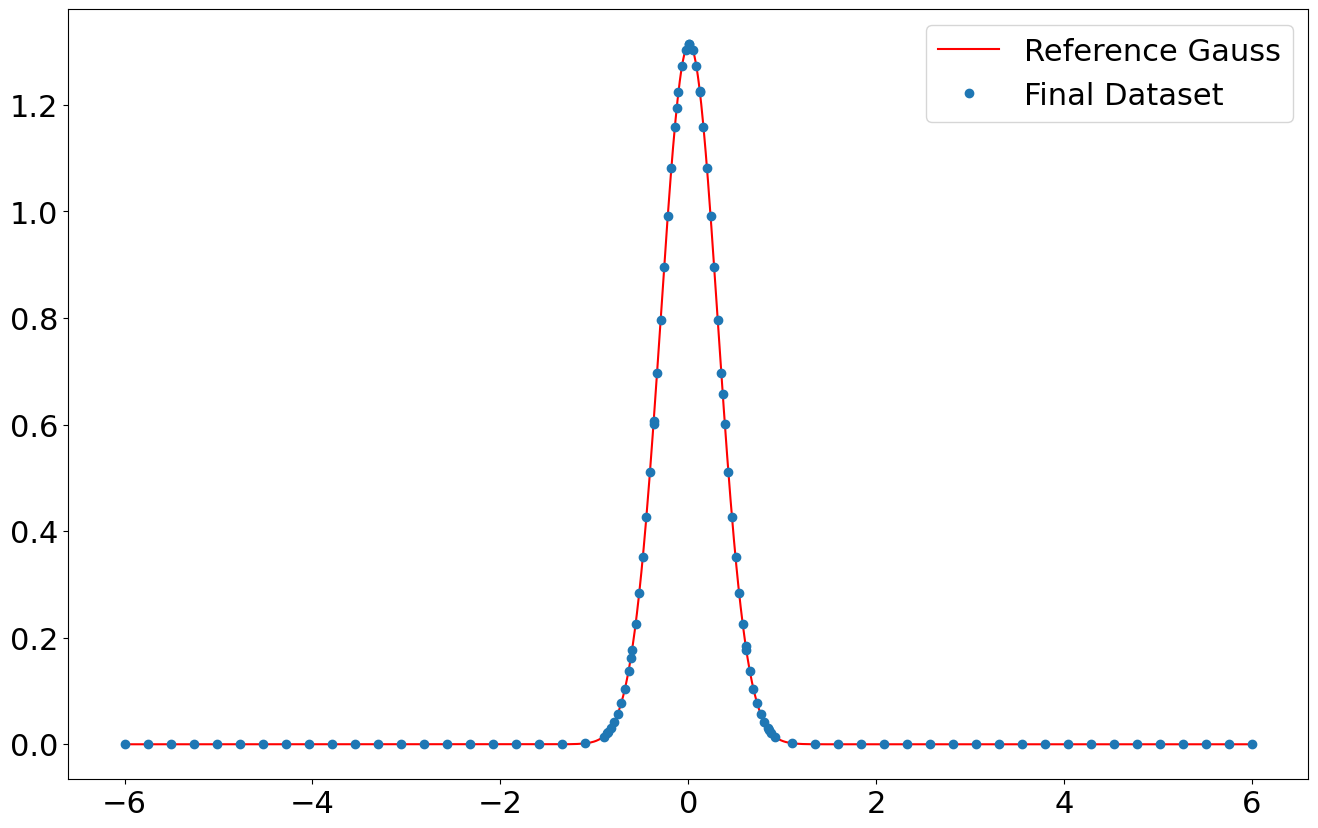

100


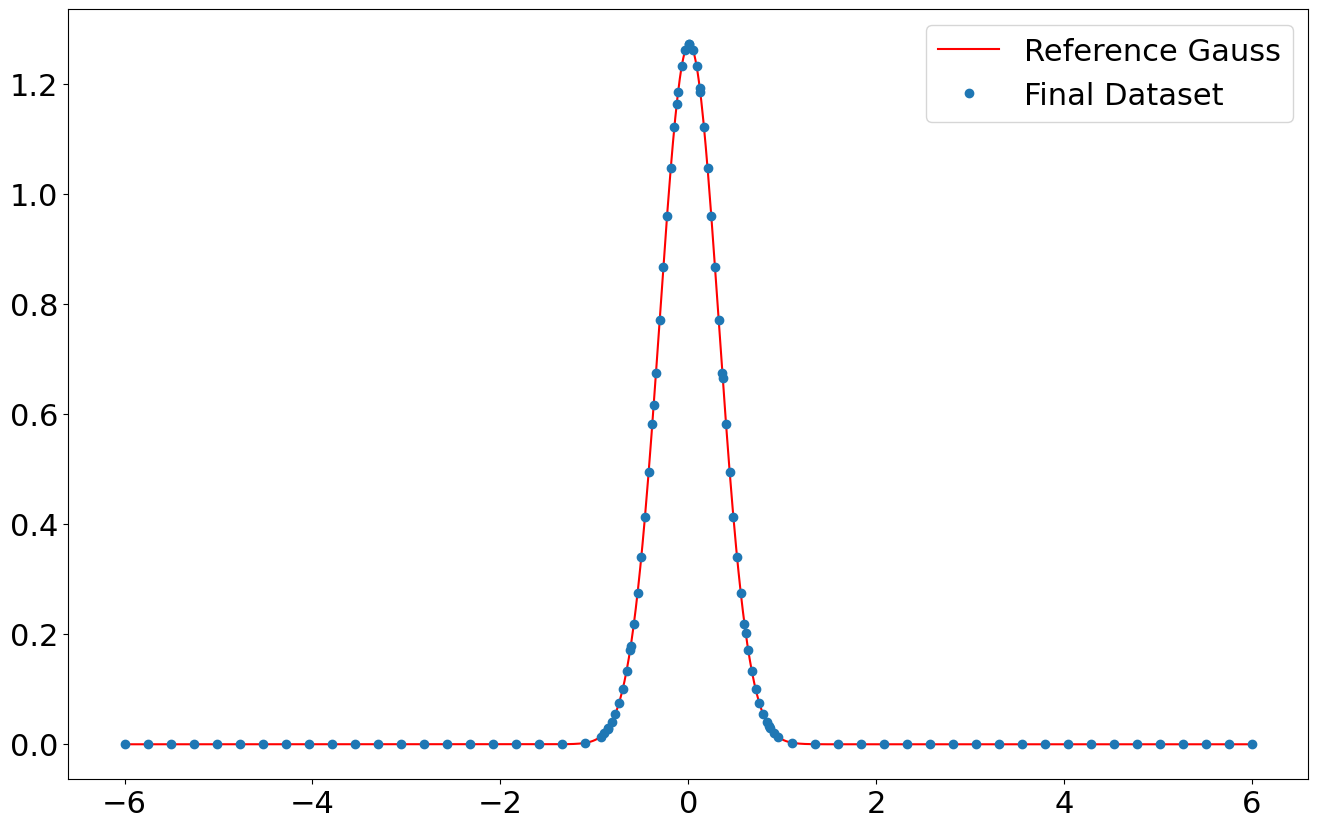

100


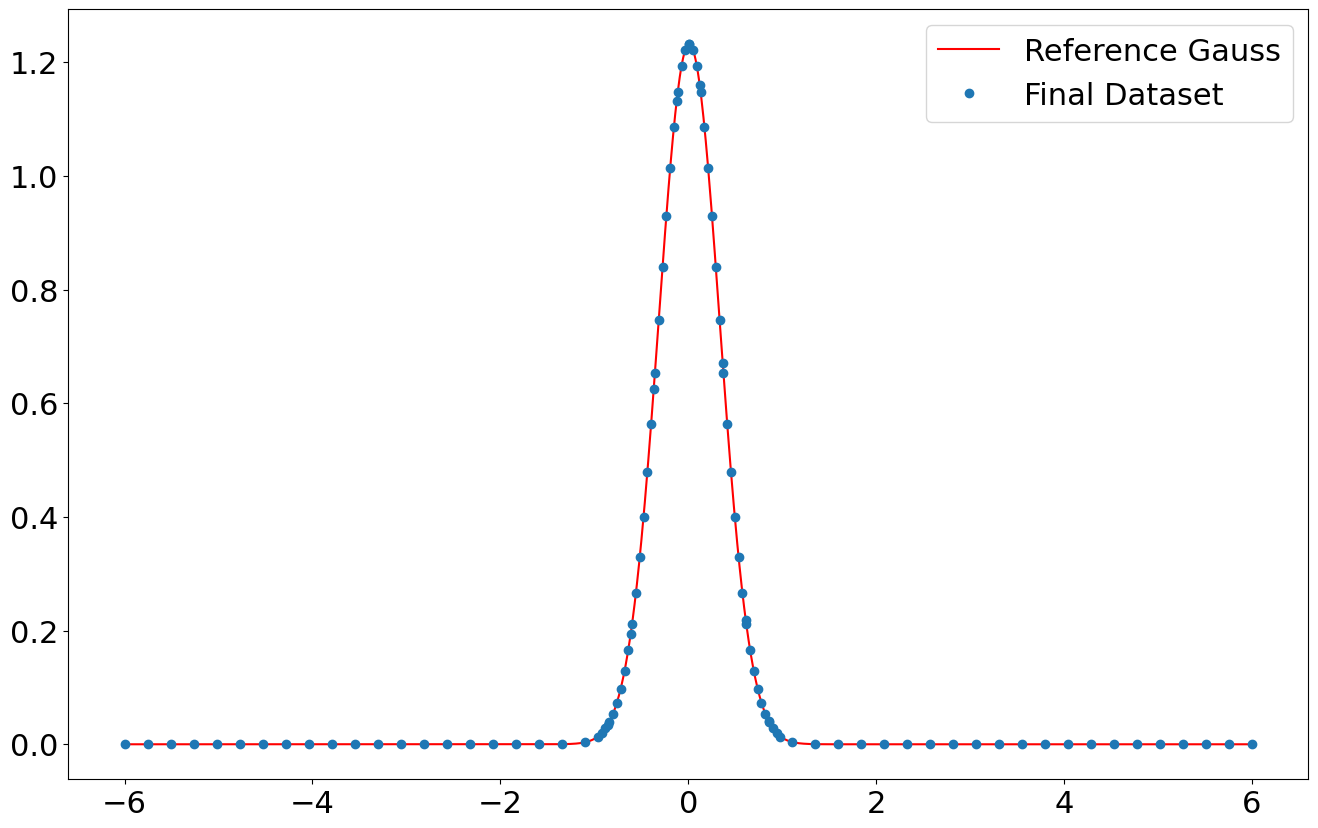

100


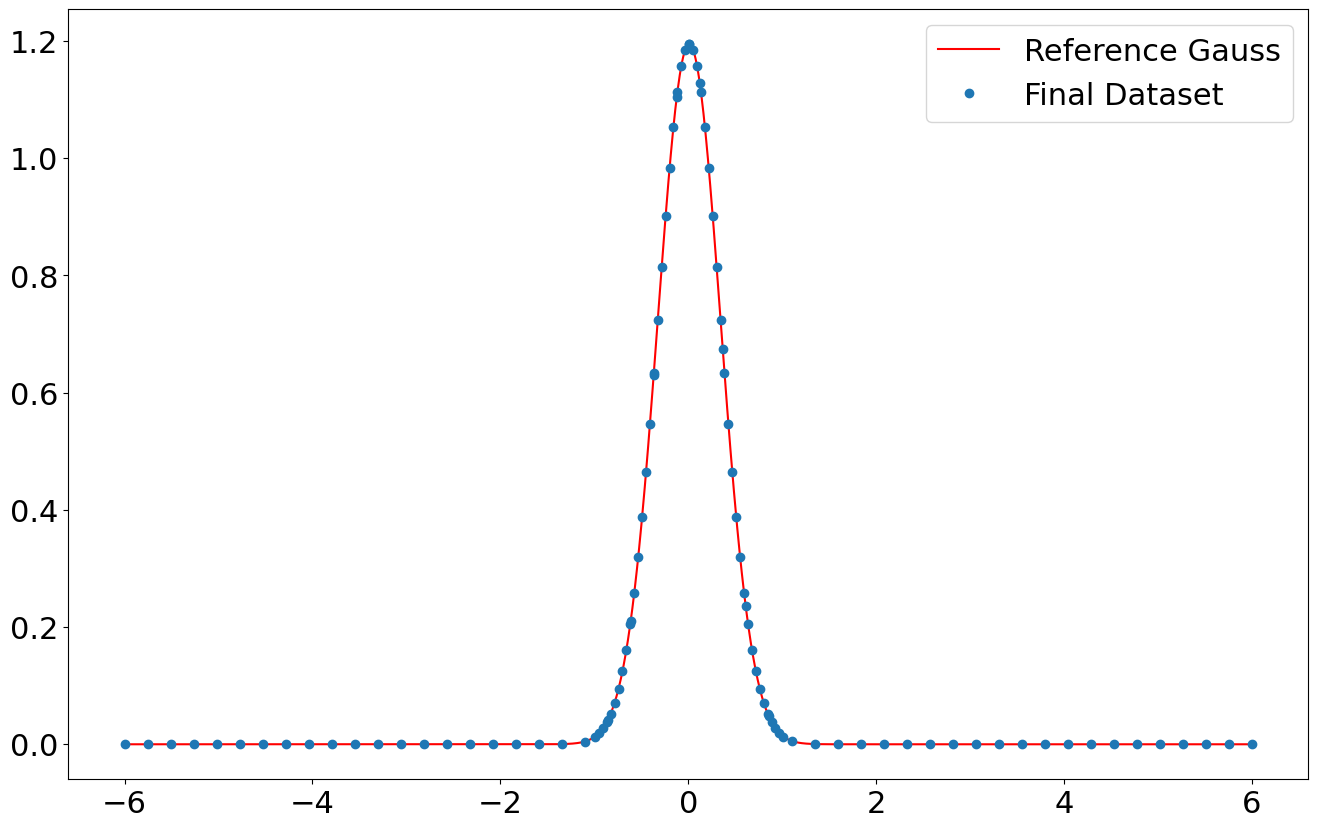

100


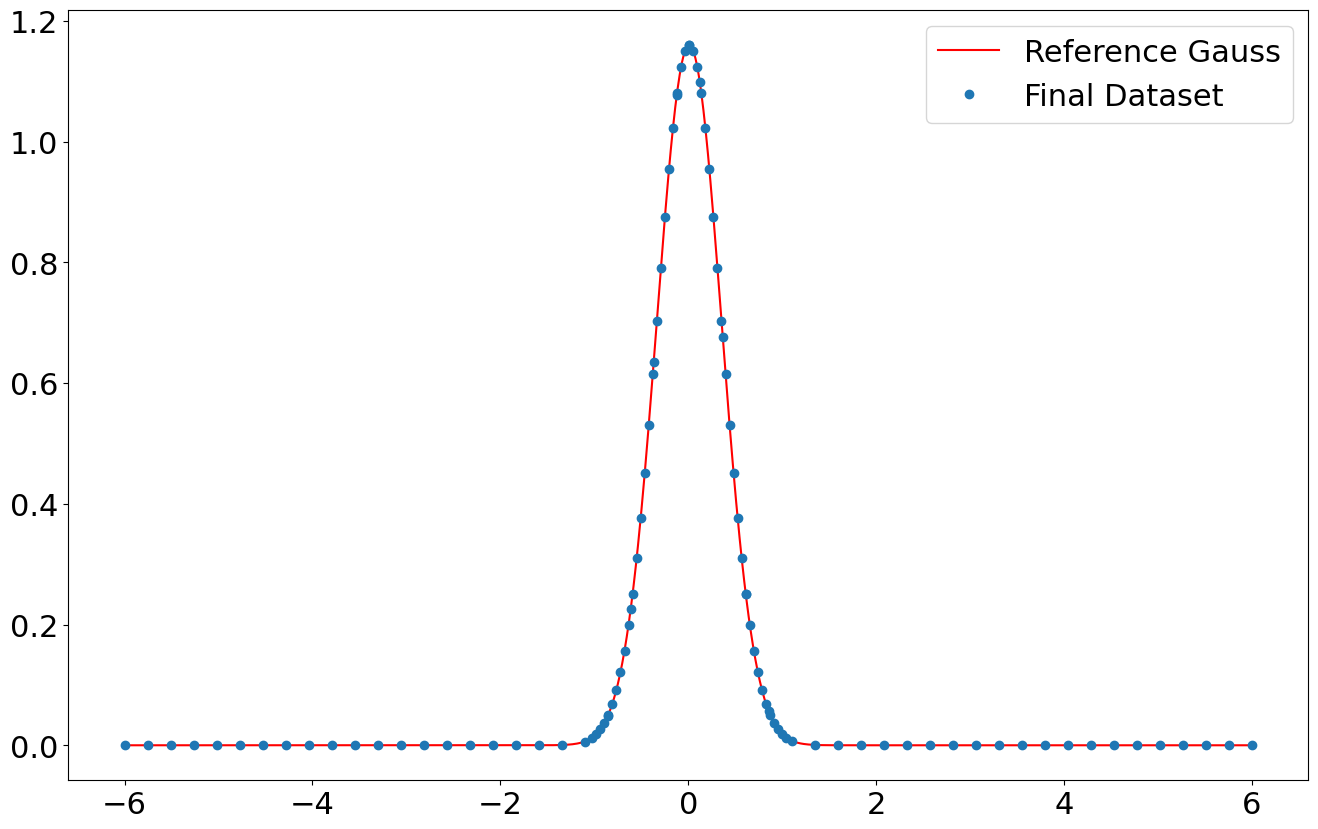

100


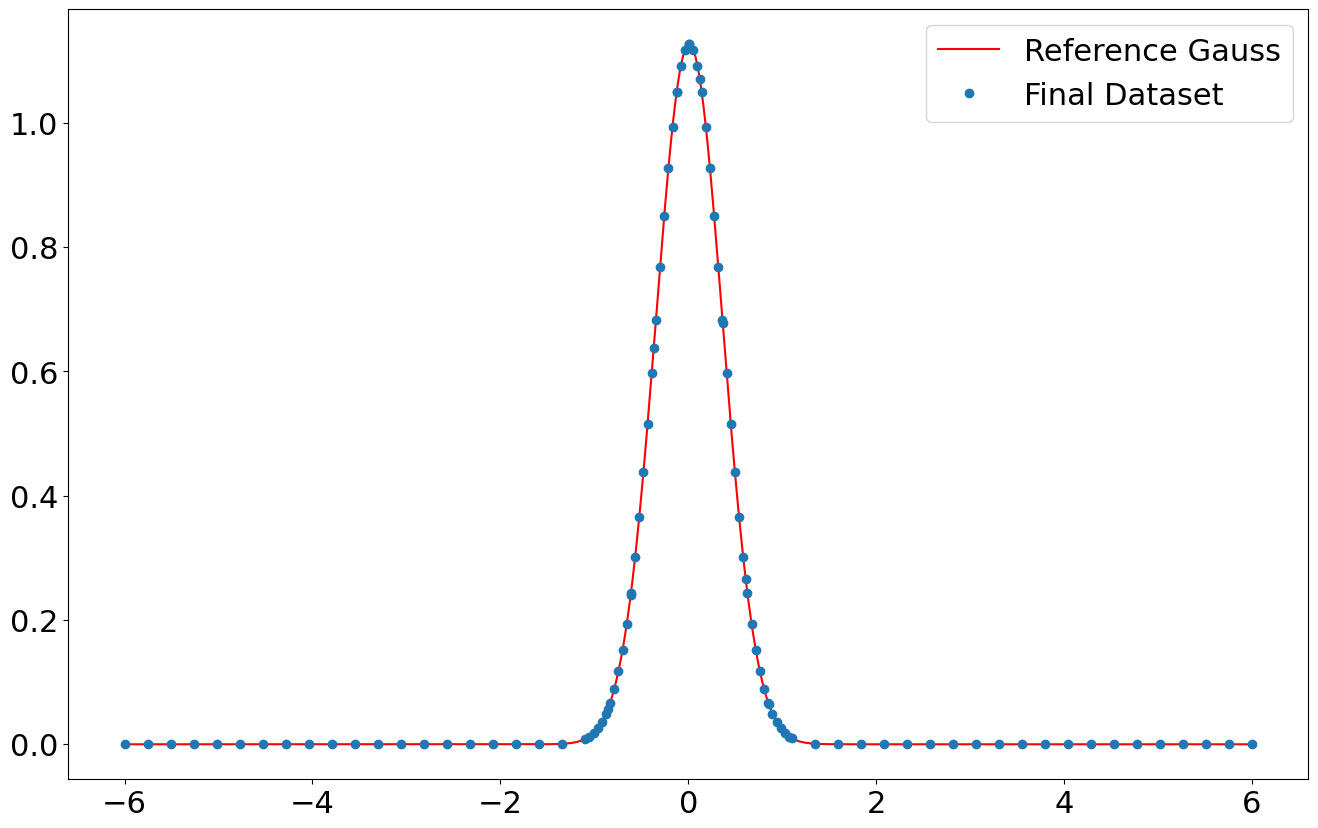

100


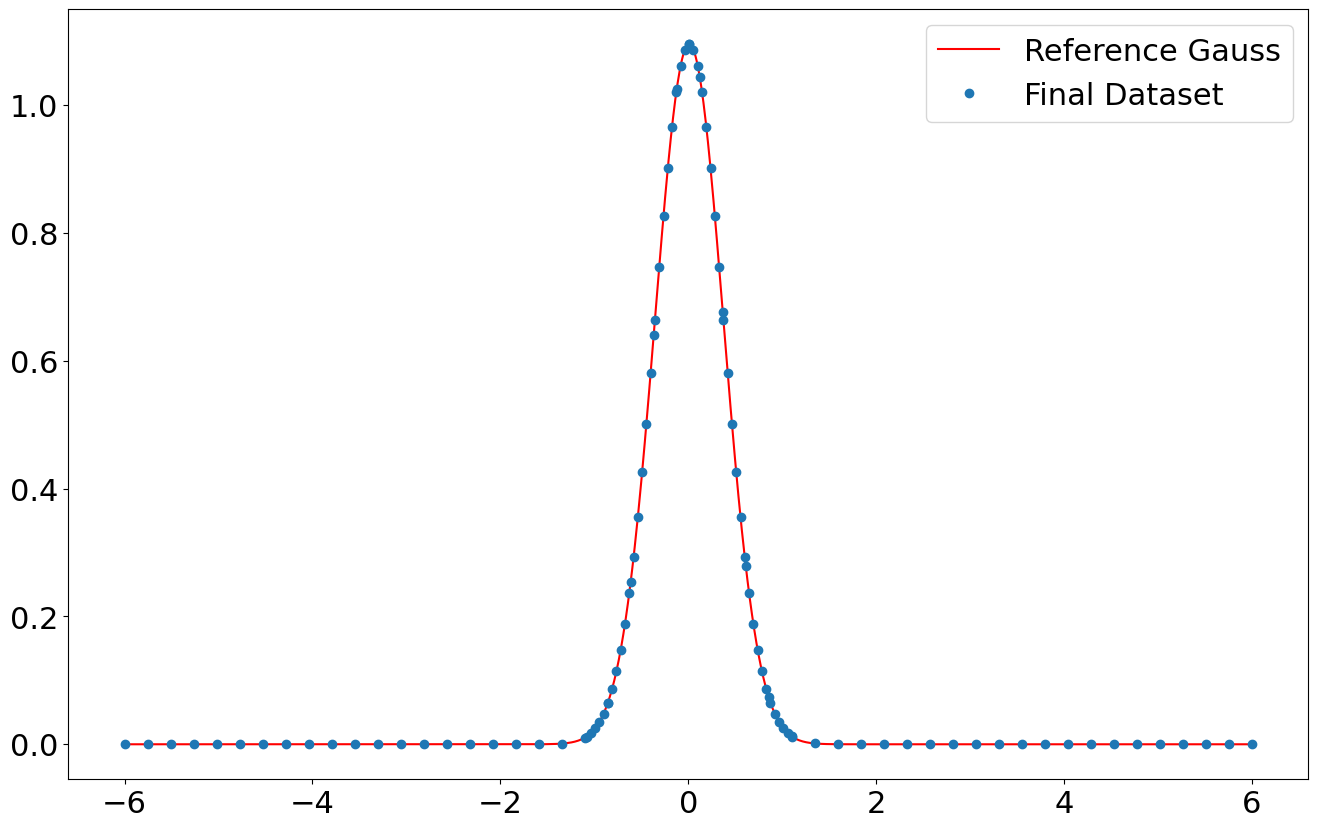

100


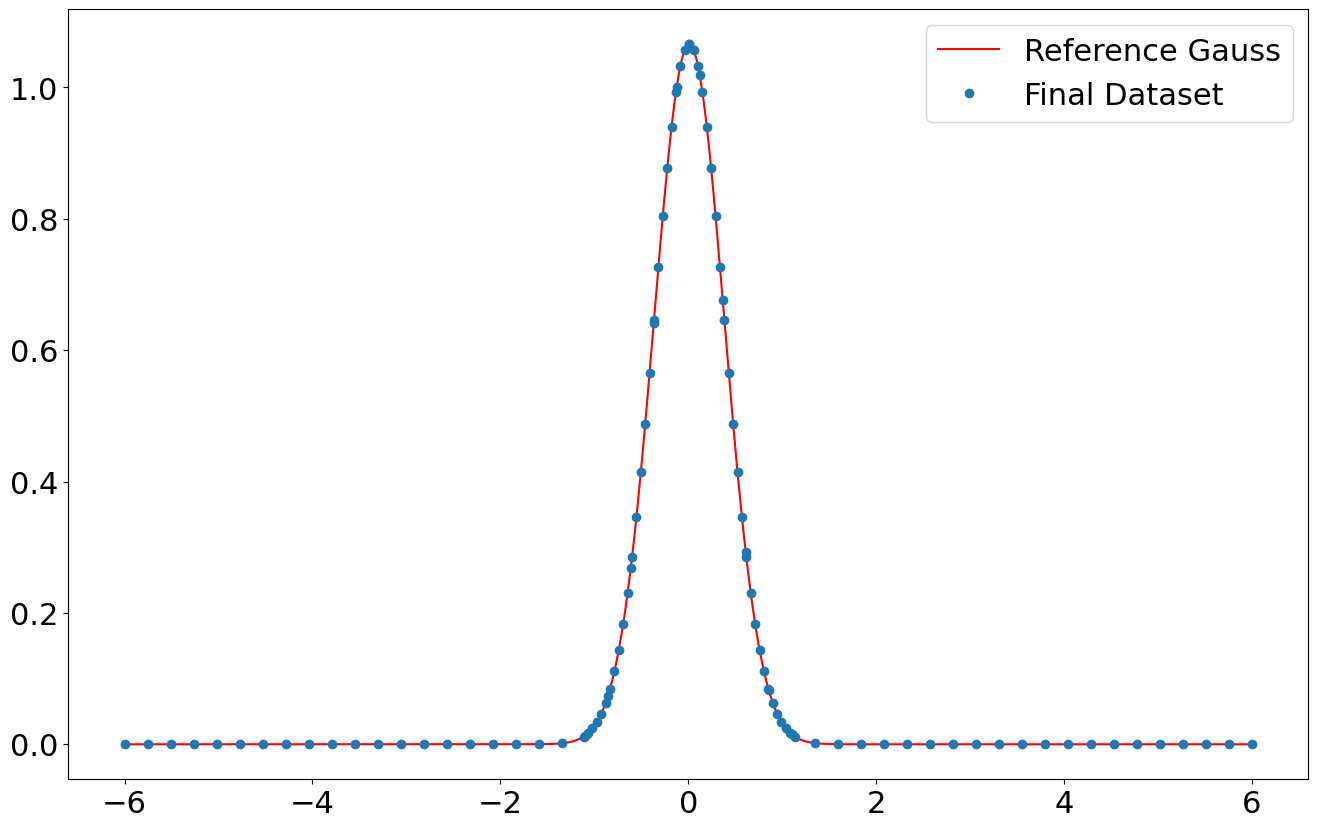

100


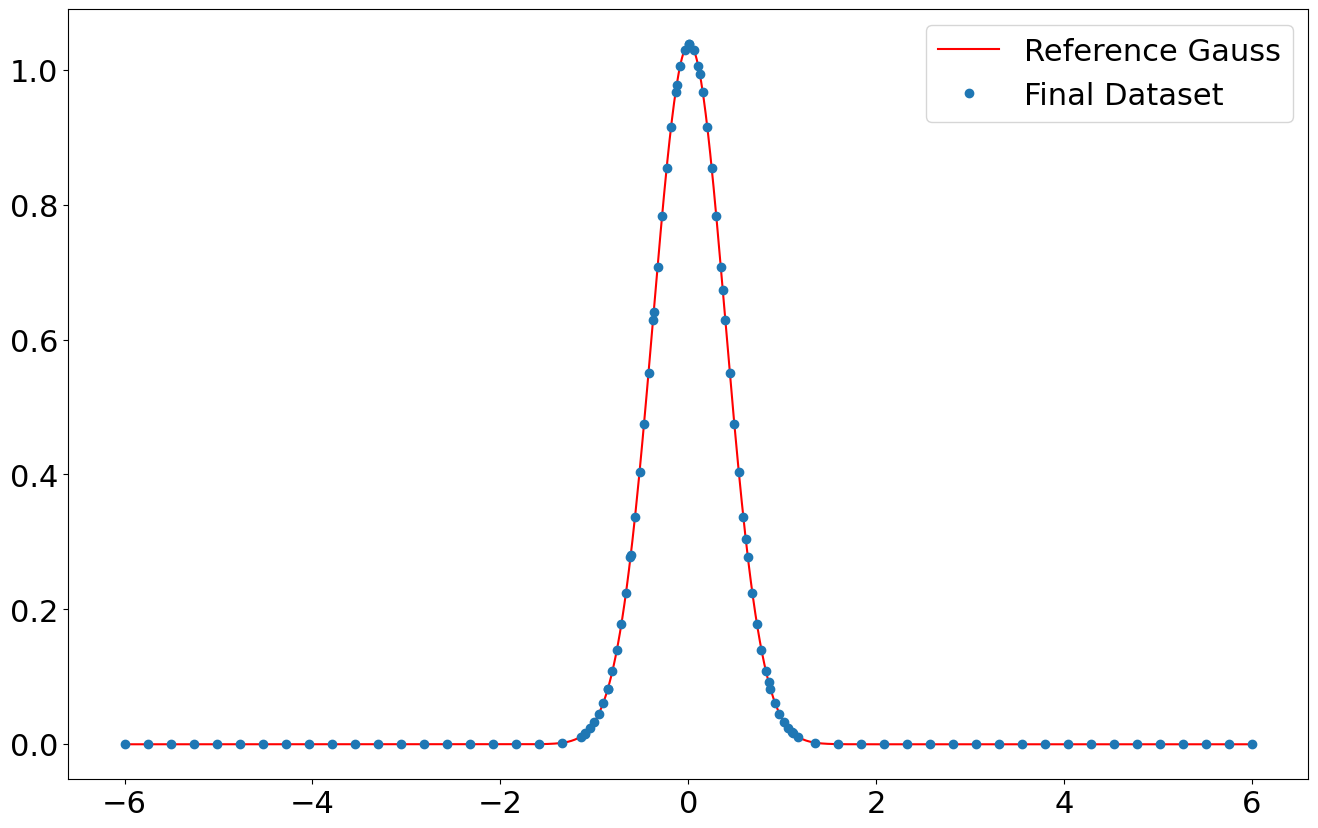

100


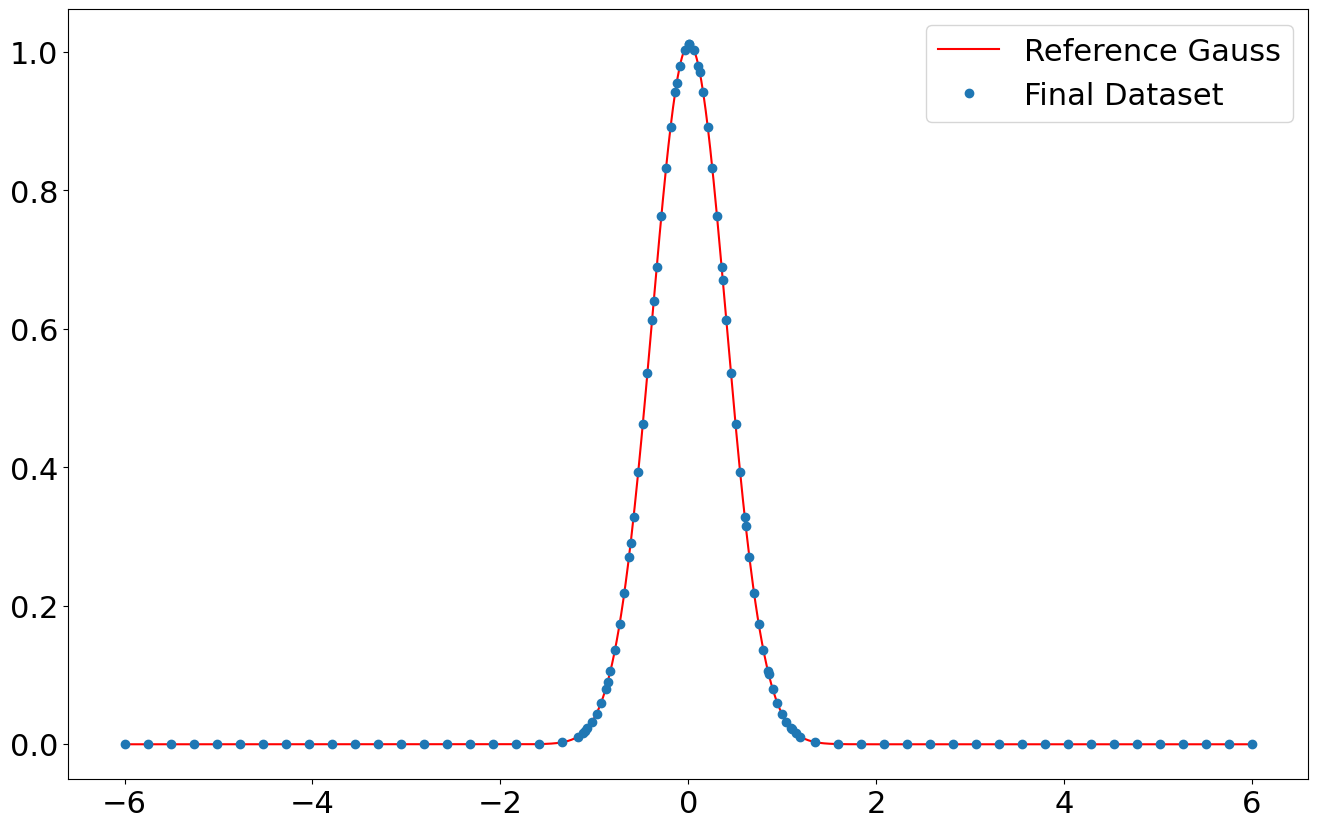

100


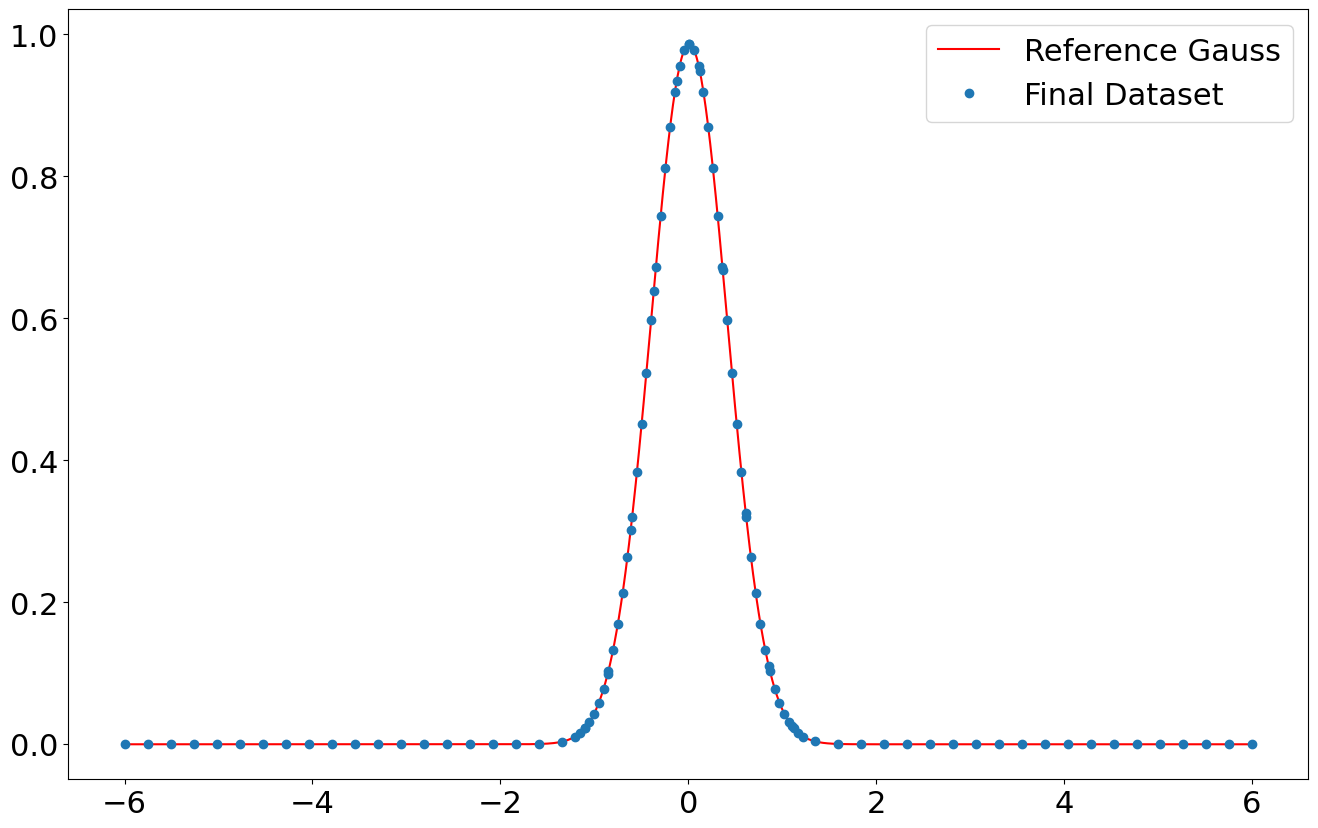

100


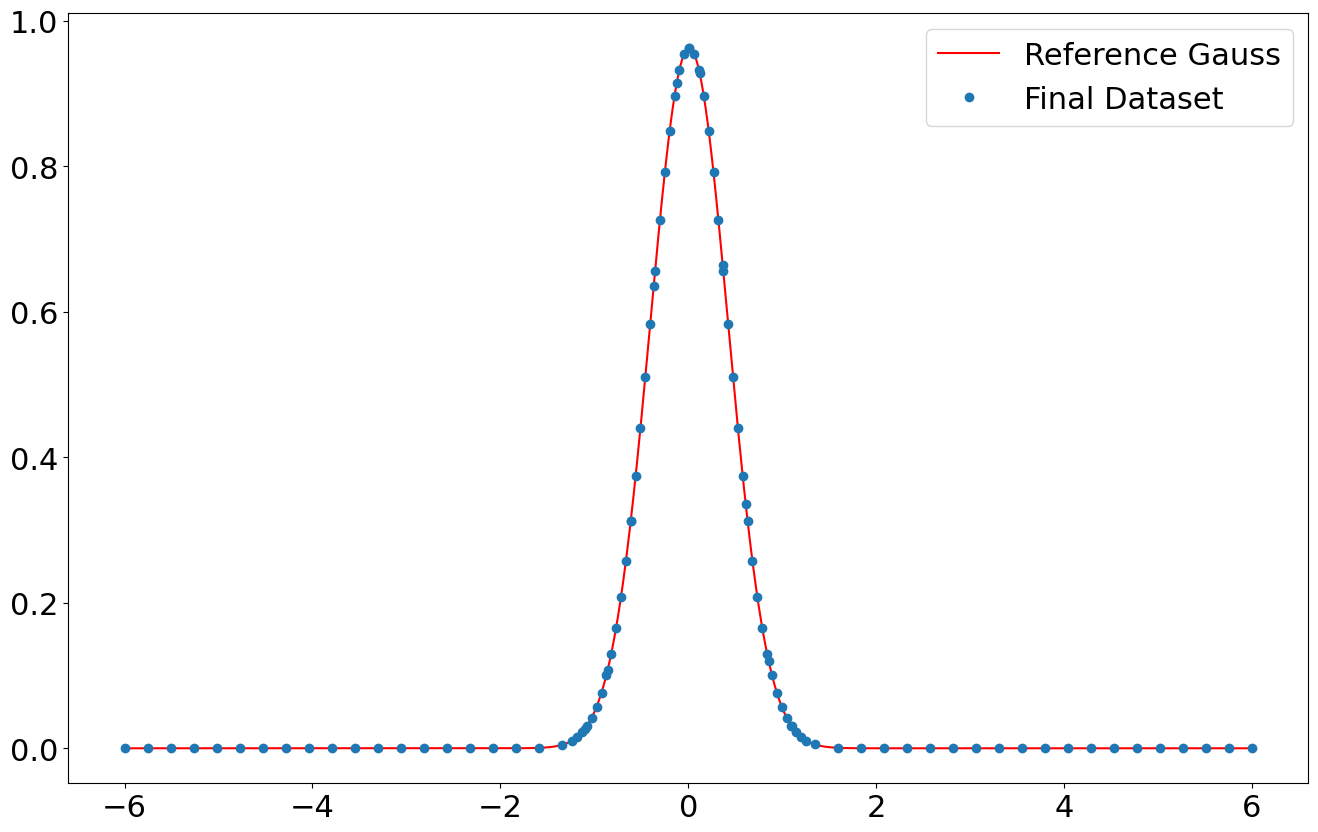

100


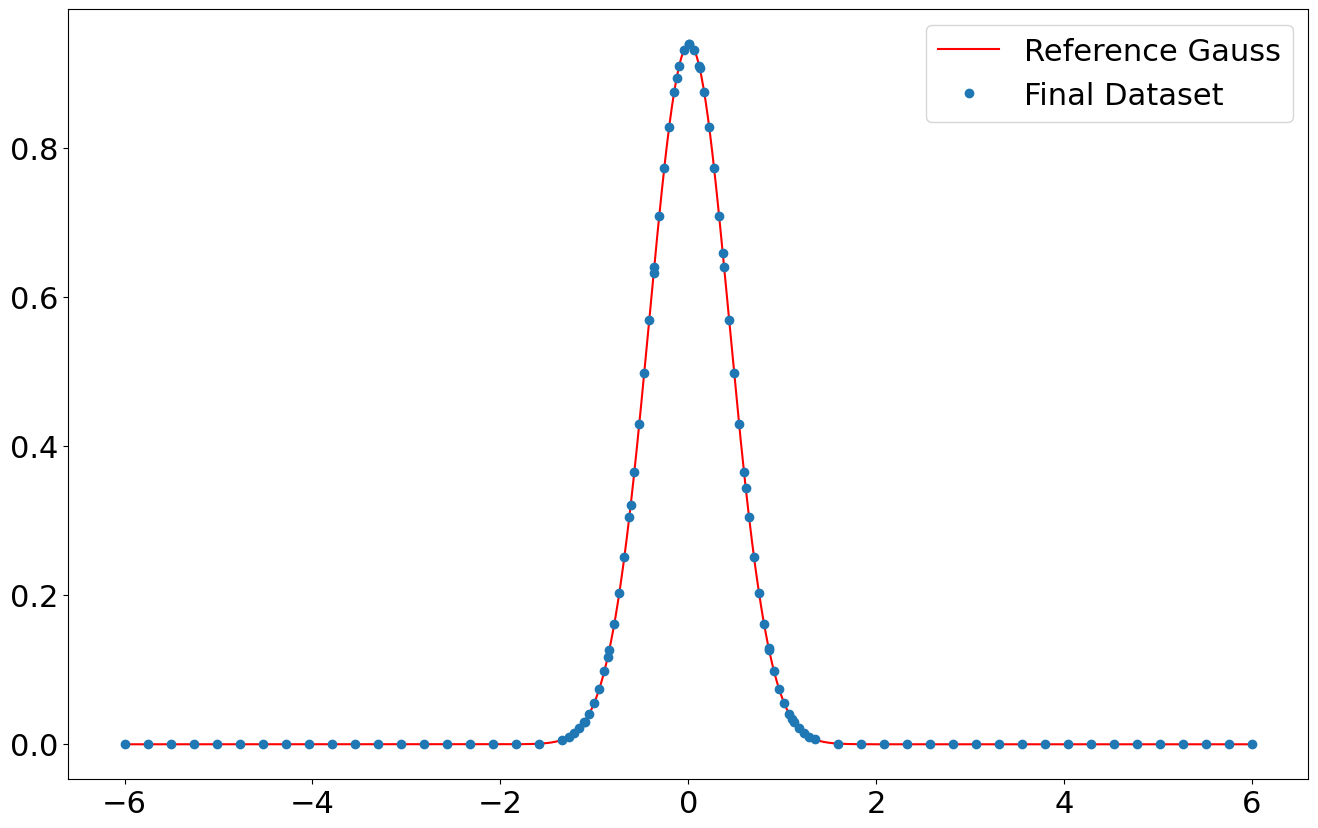

100


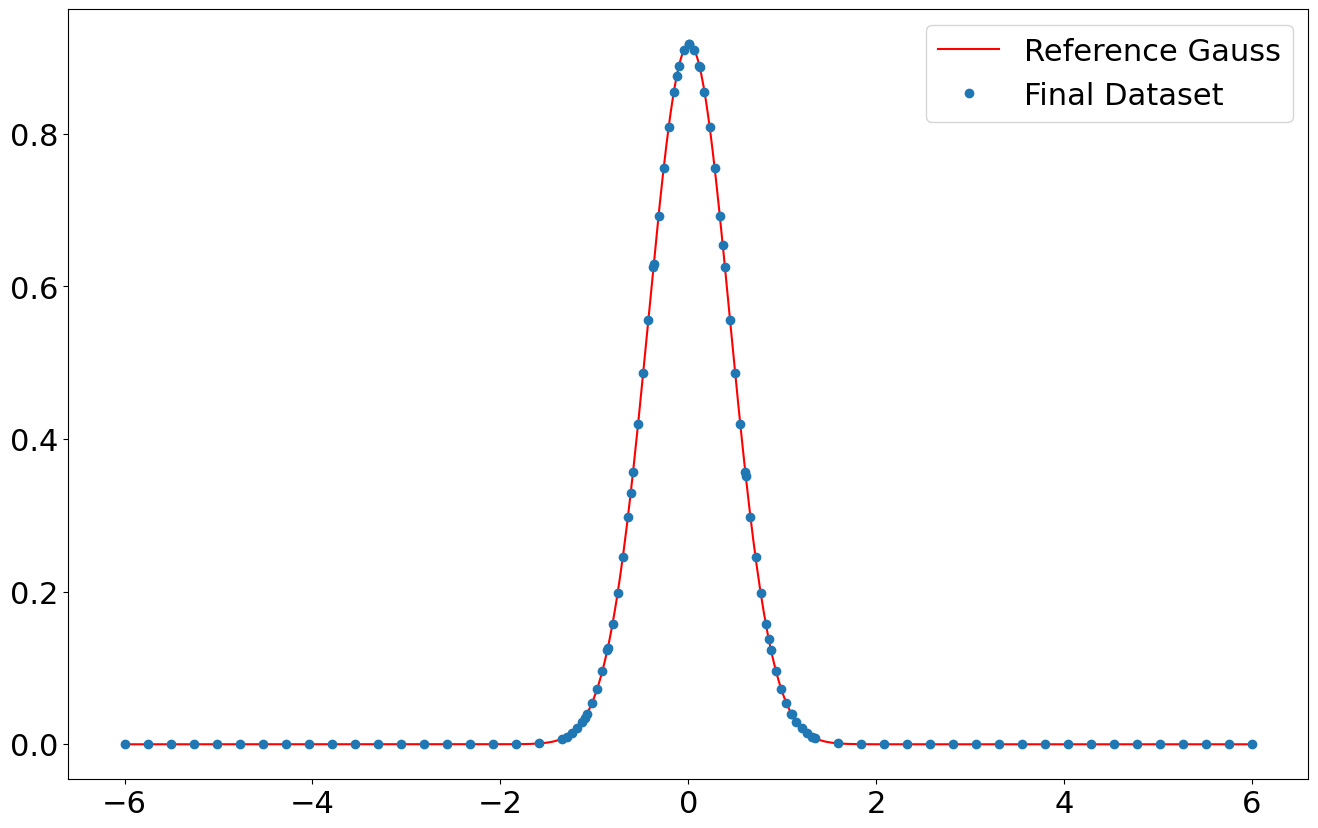

100


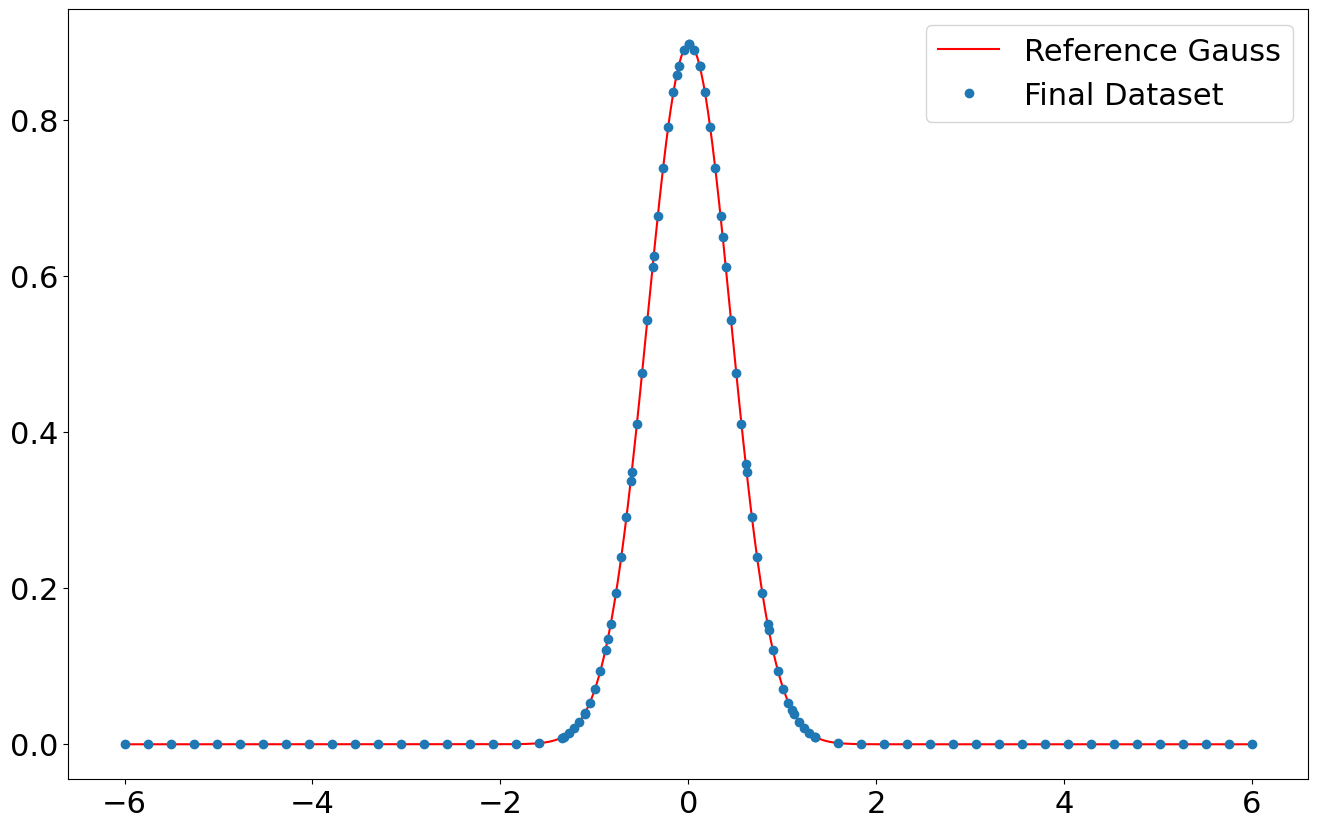

100


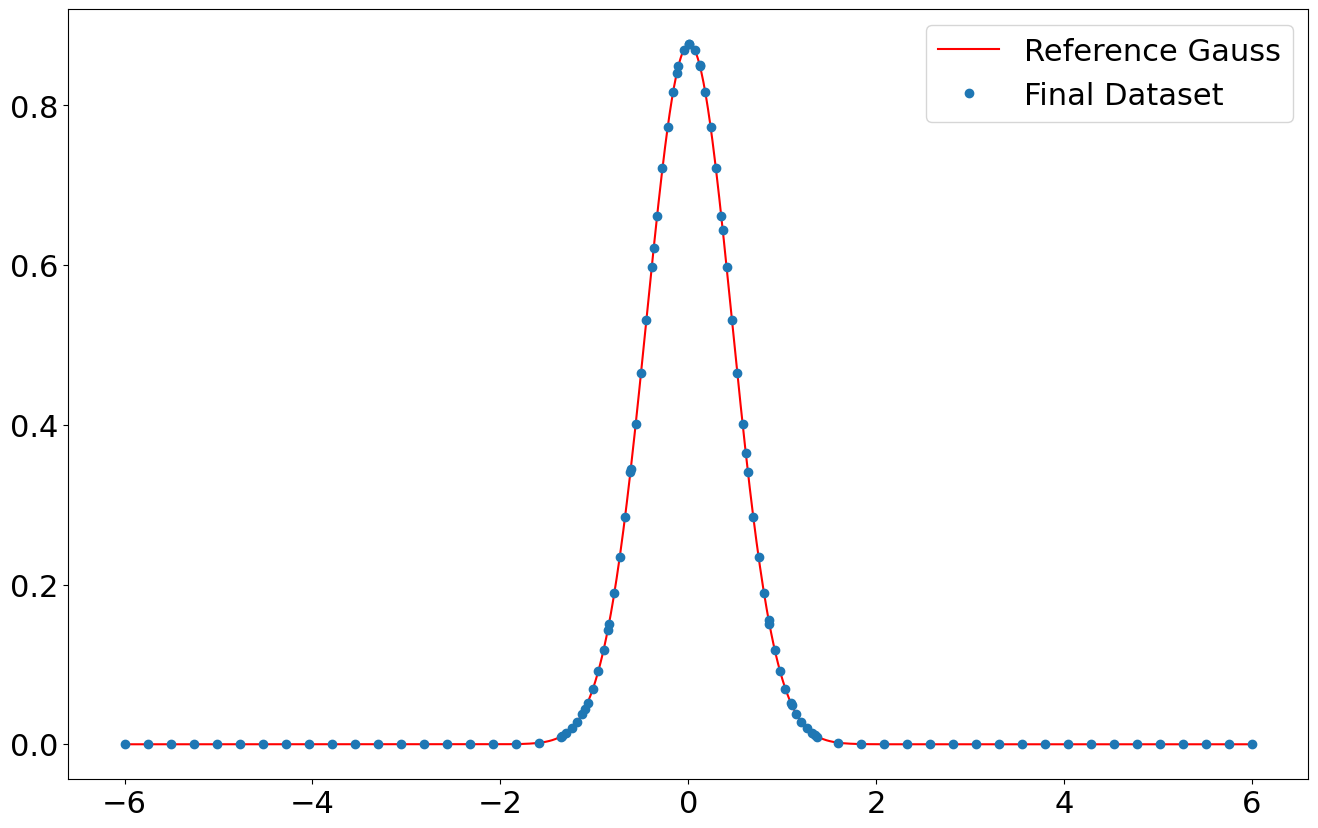

100


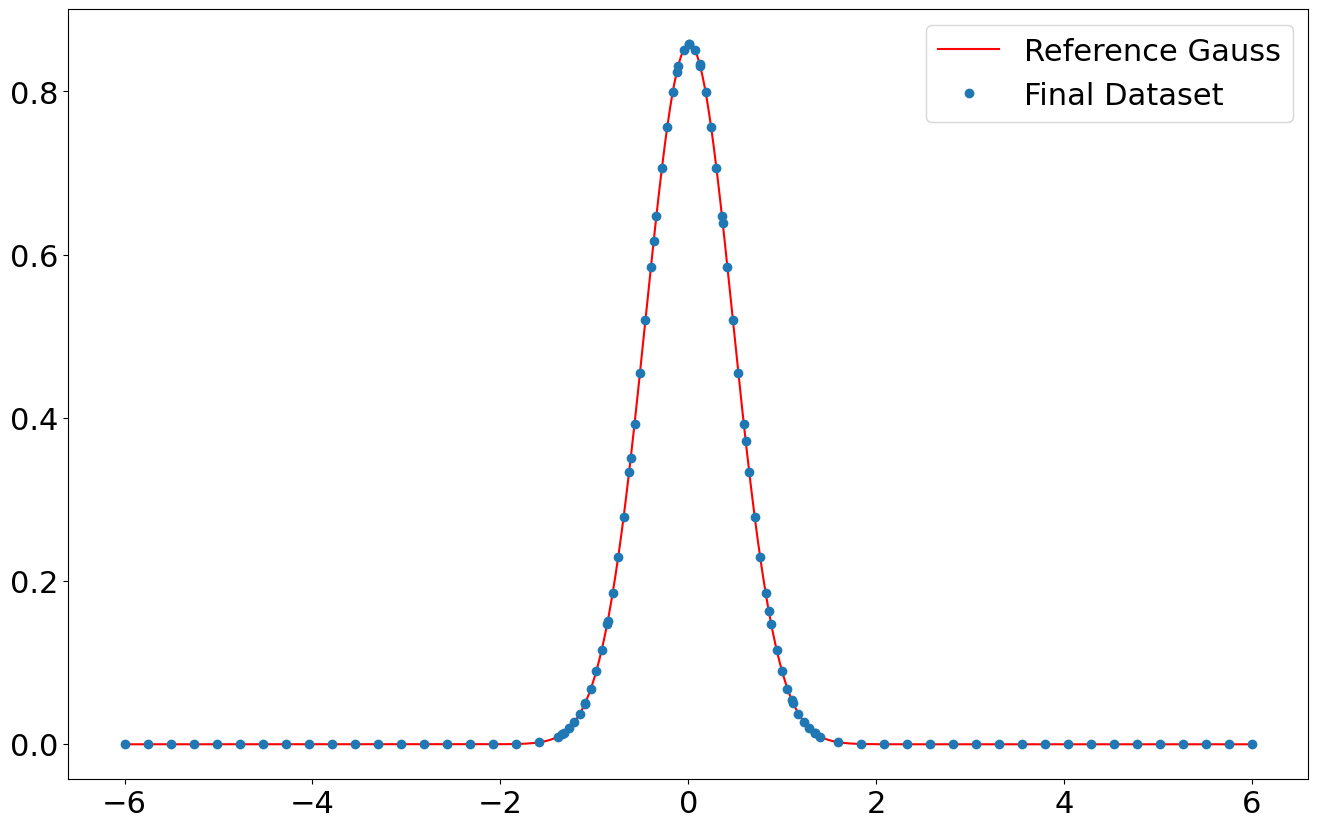

100


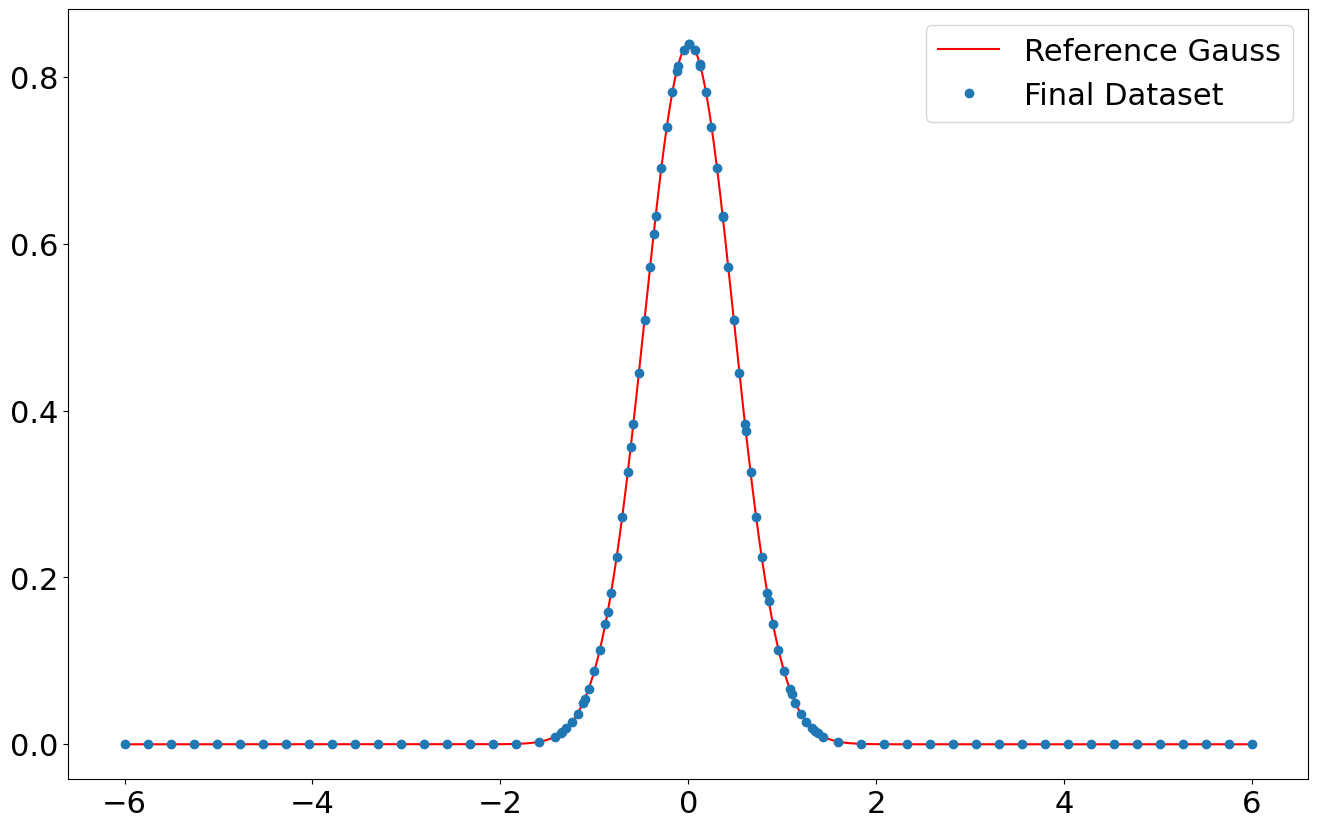

100


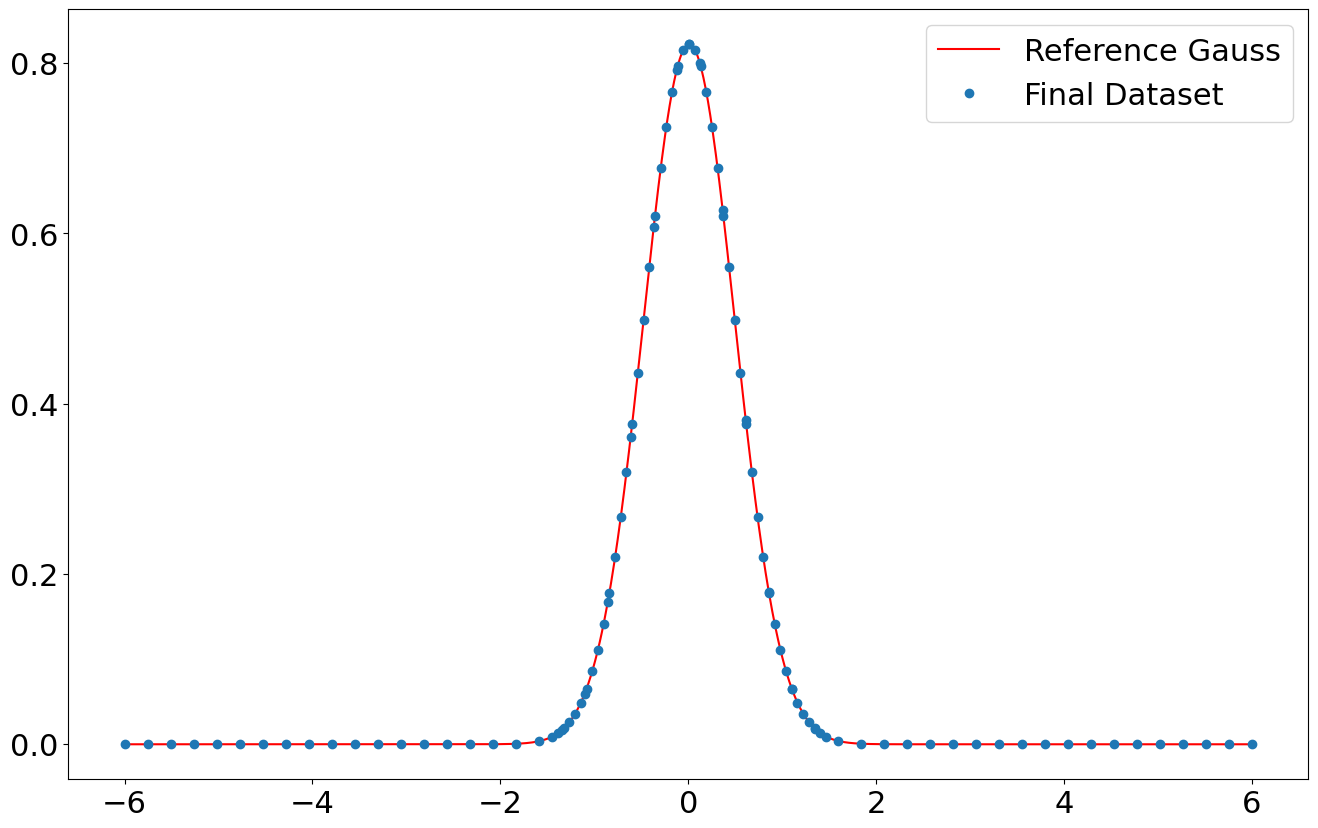

100


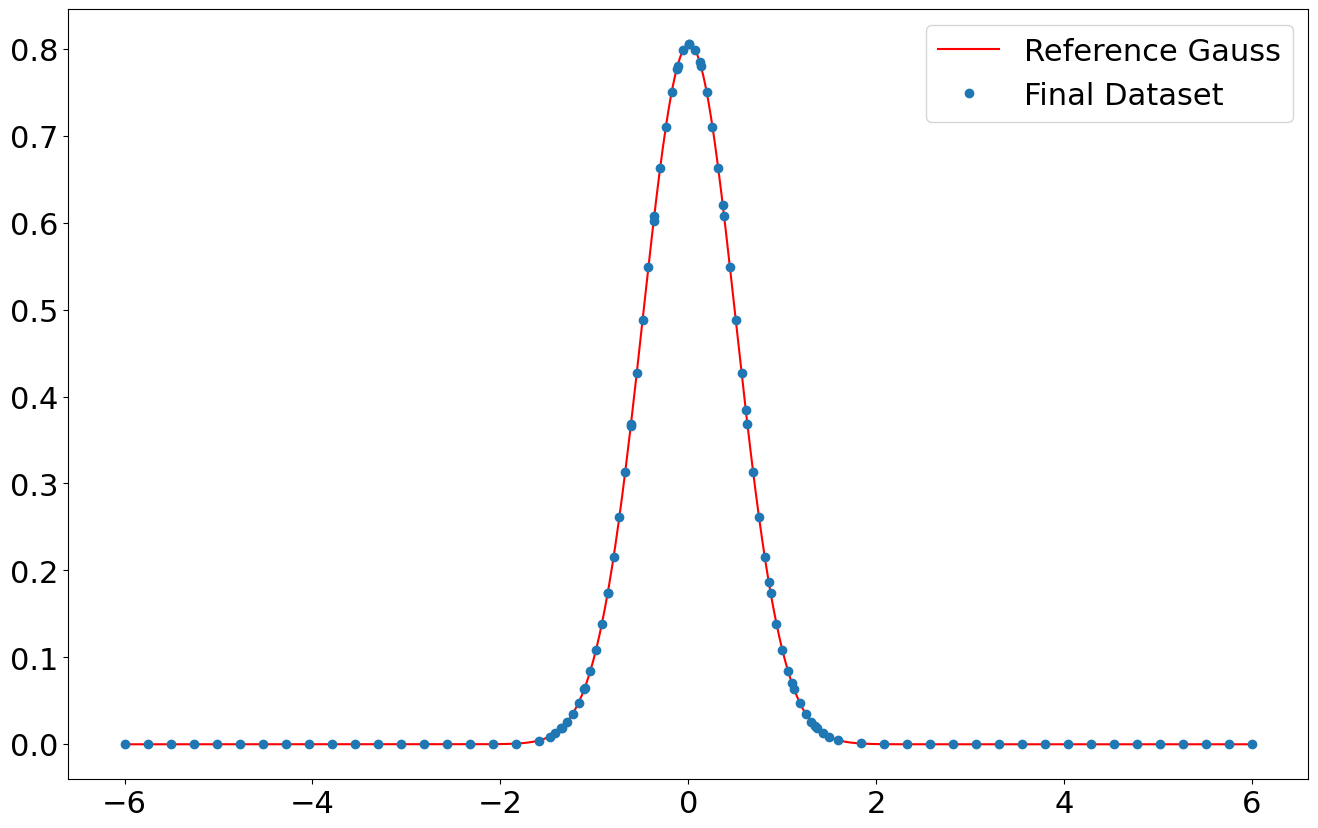

100


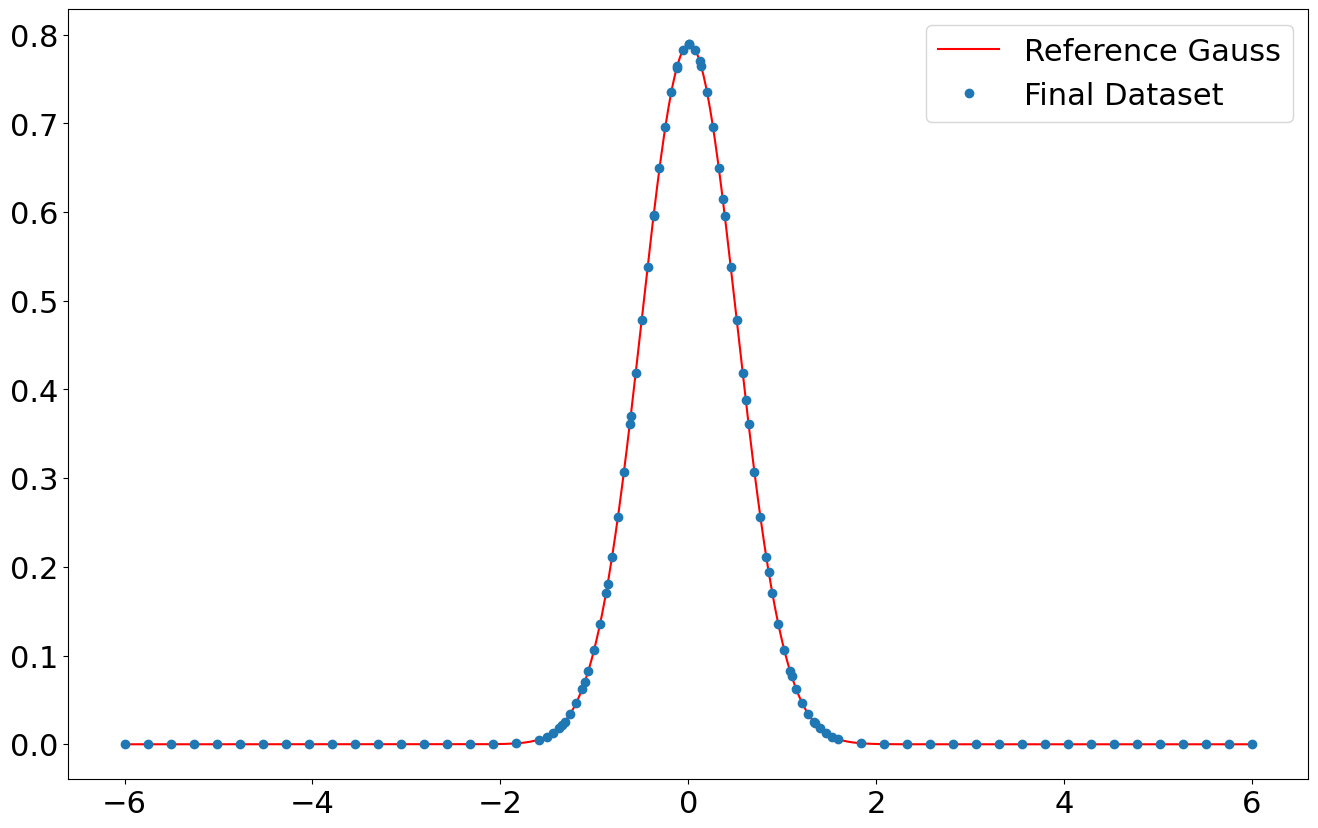

100


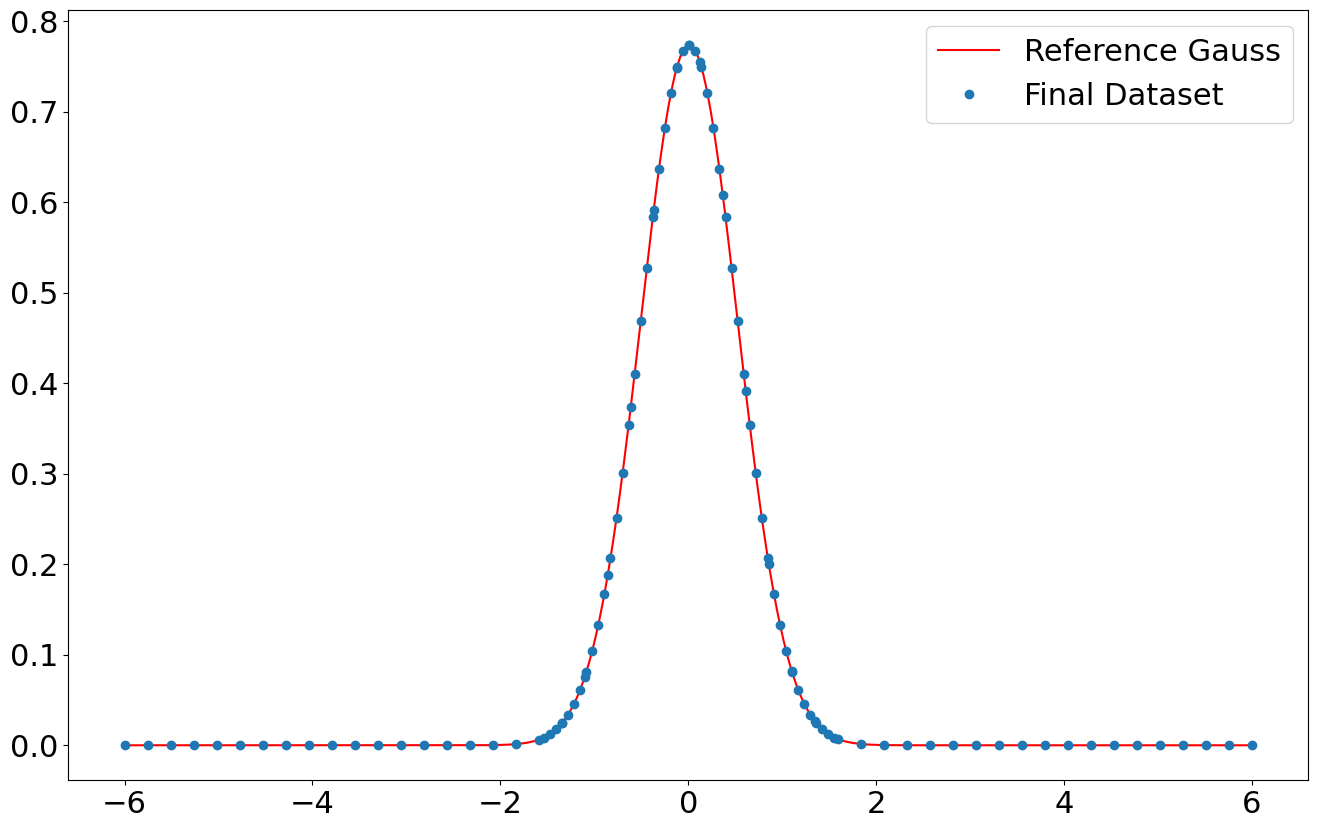

100


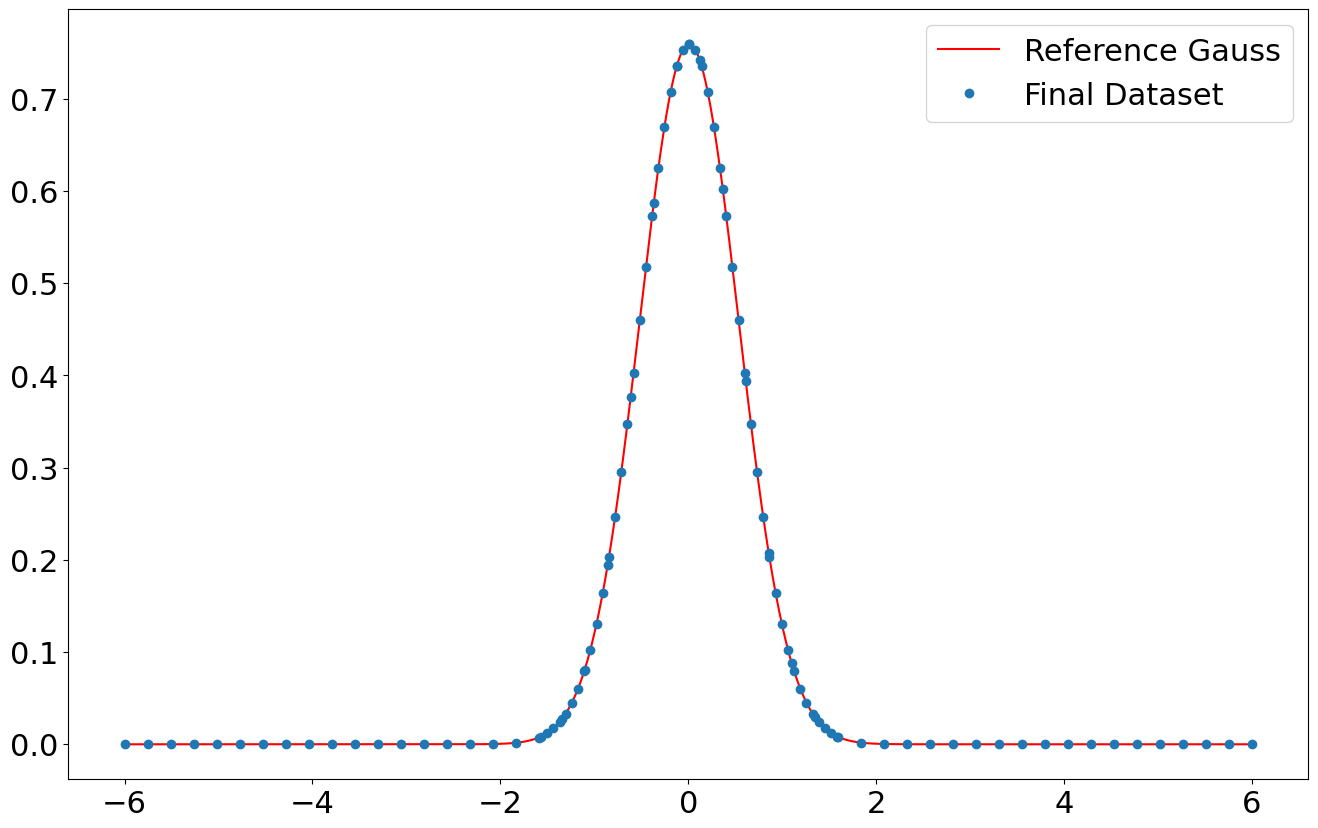

100


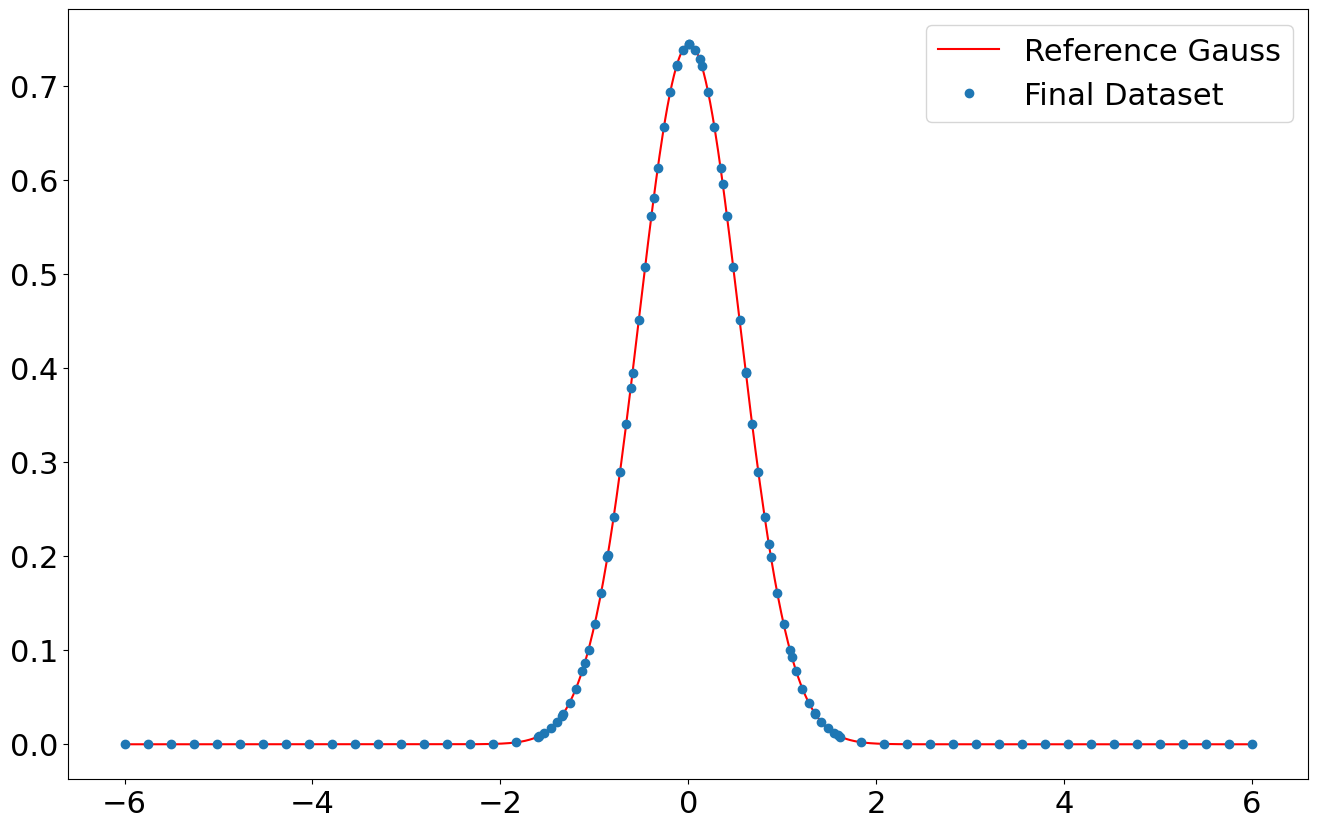

100


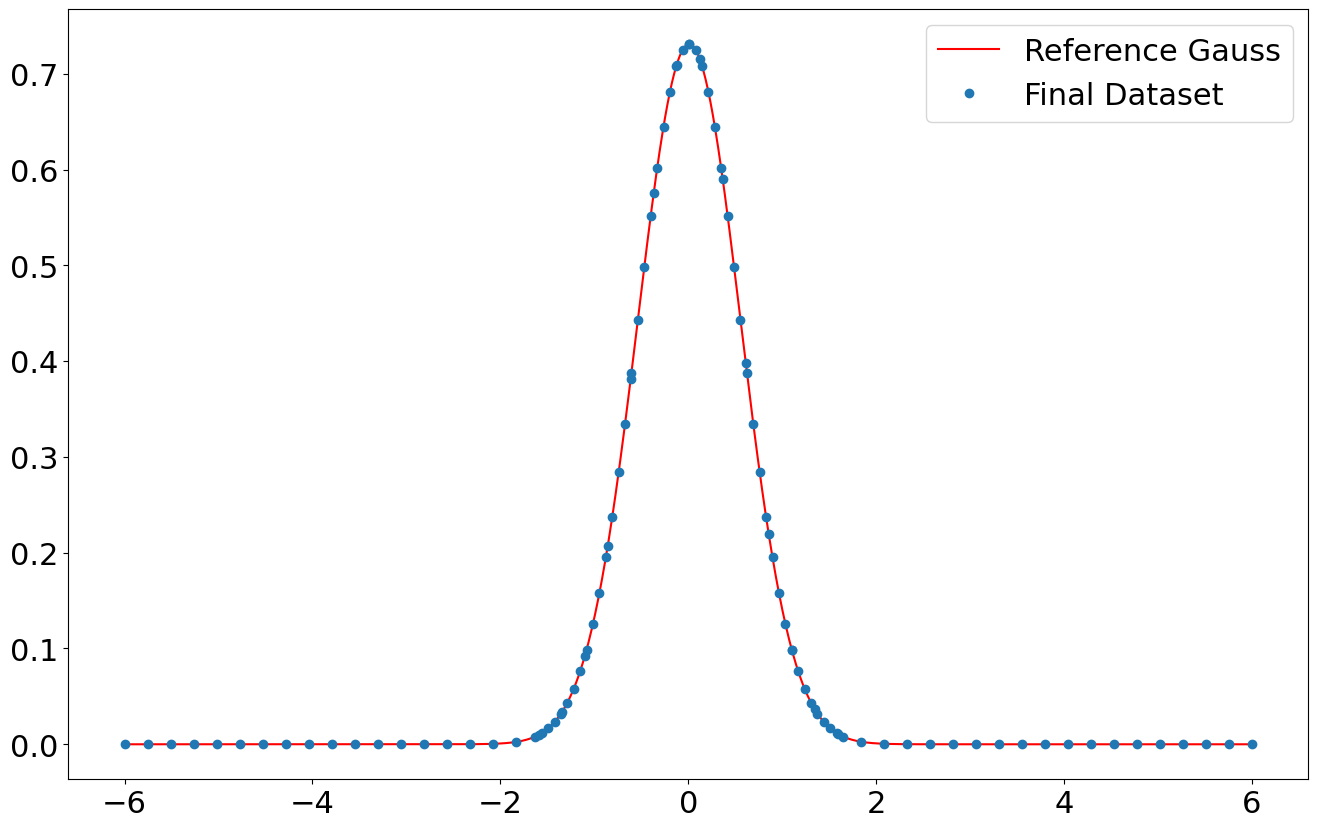

100


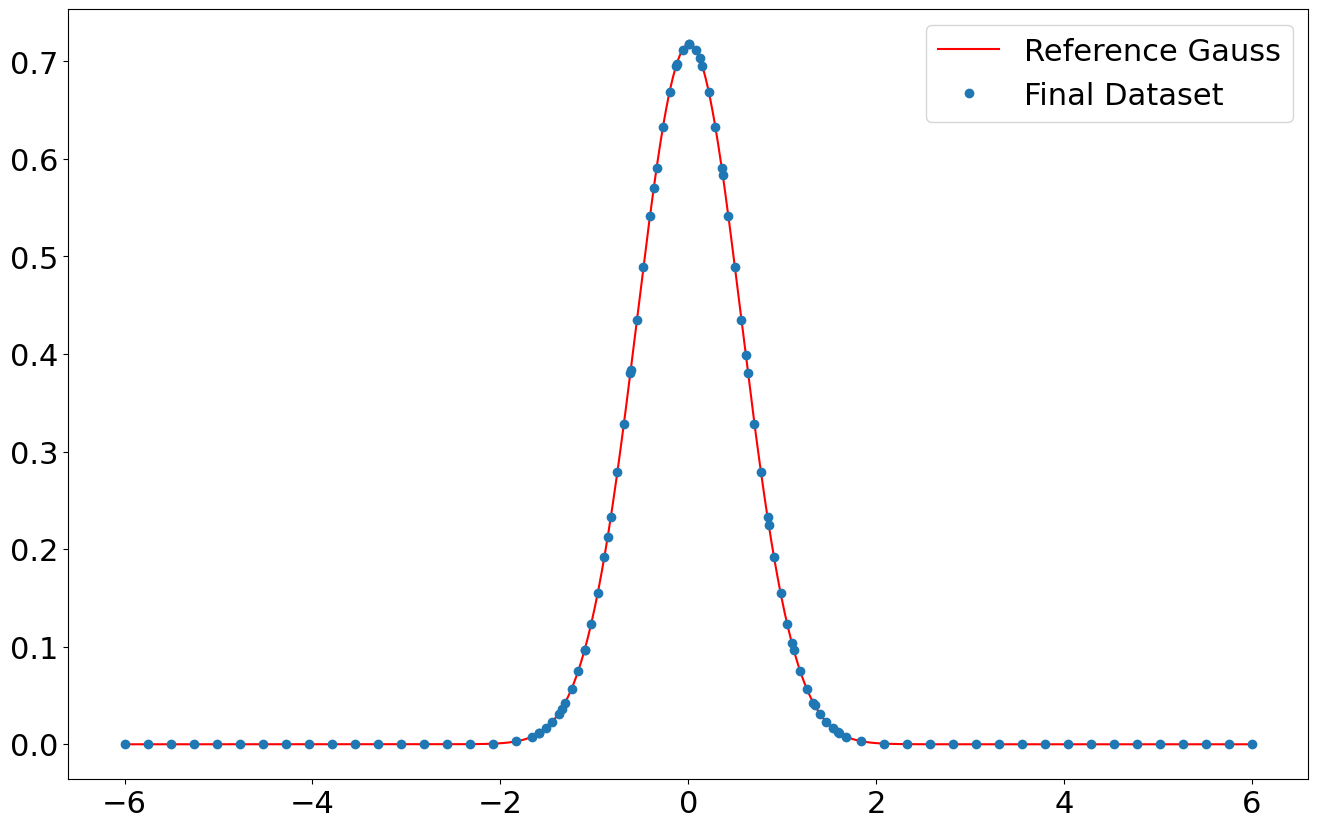

100


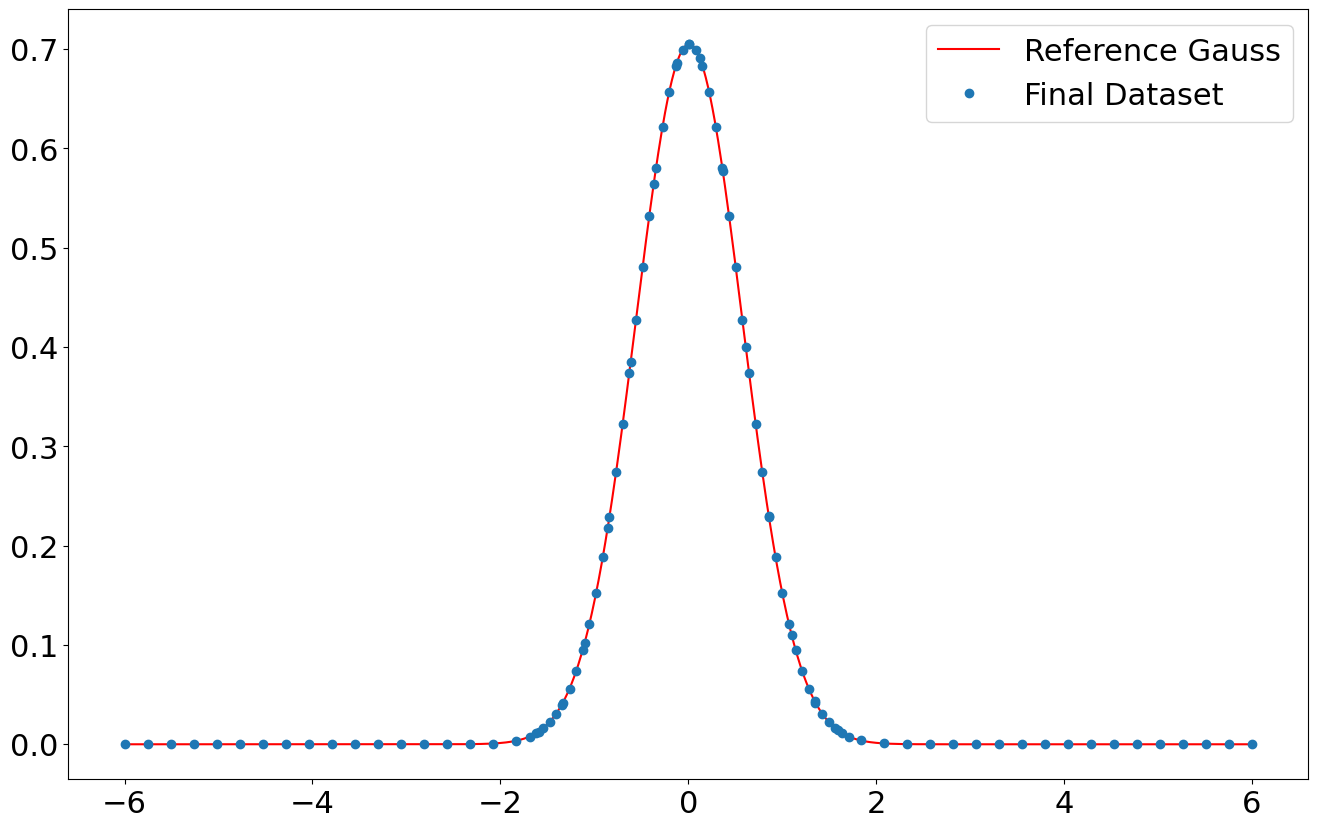

100


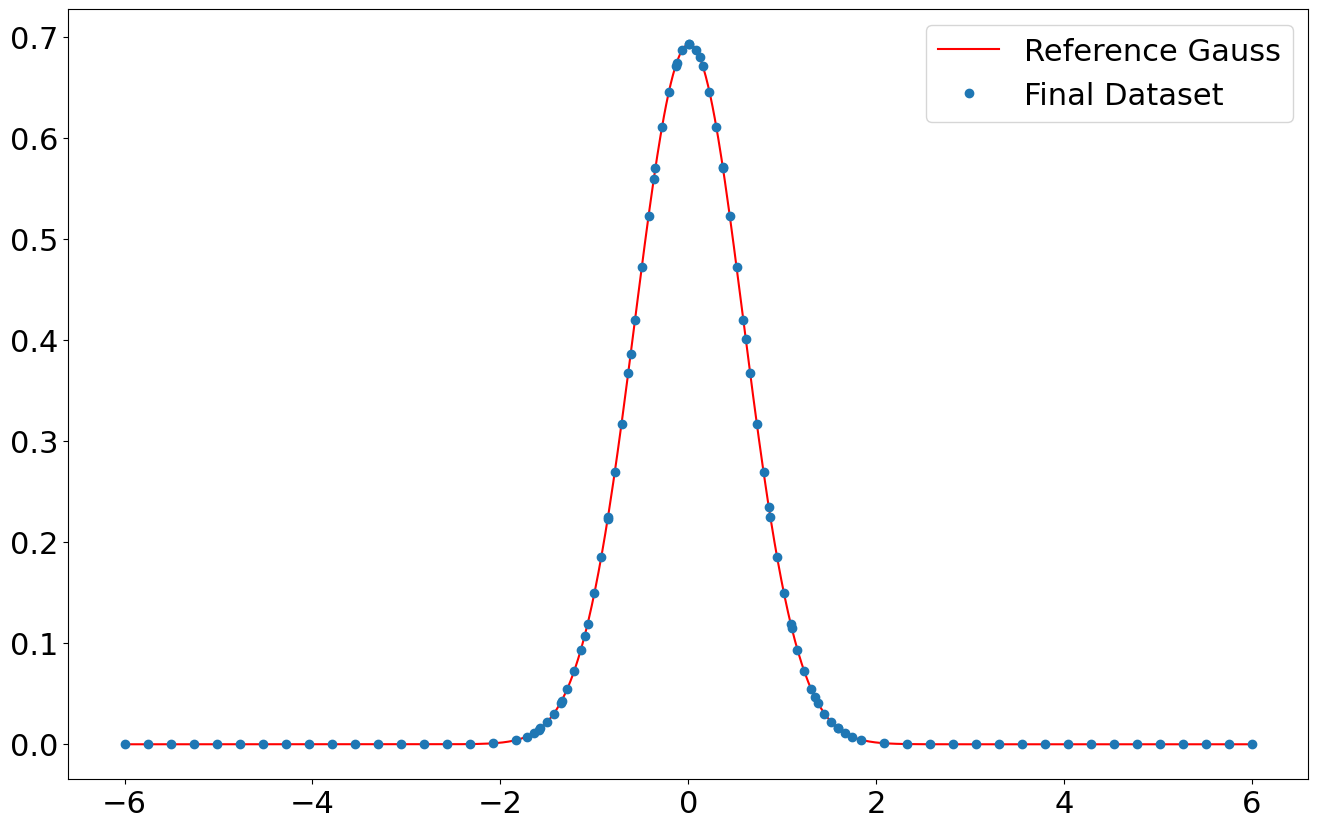

100


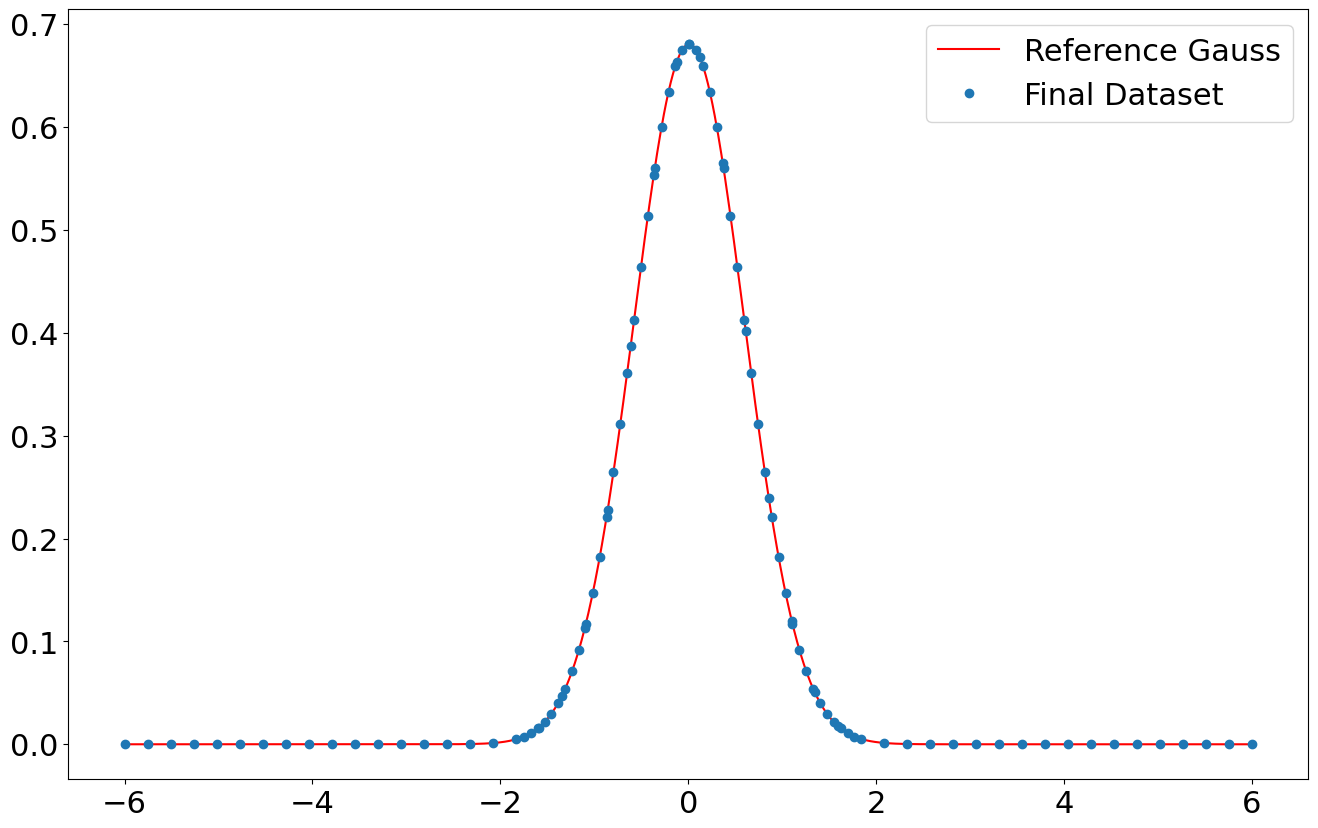

100


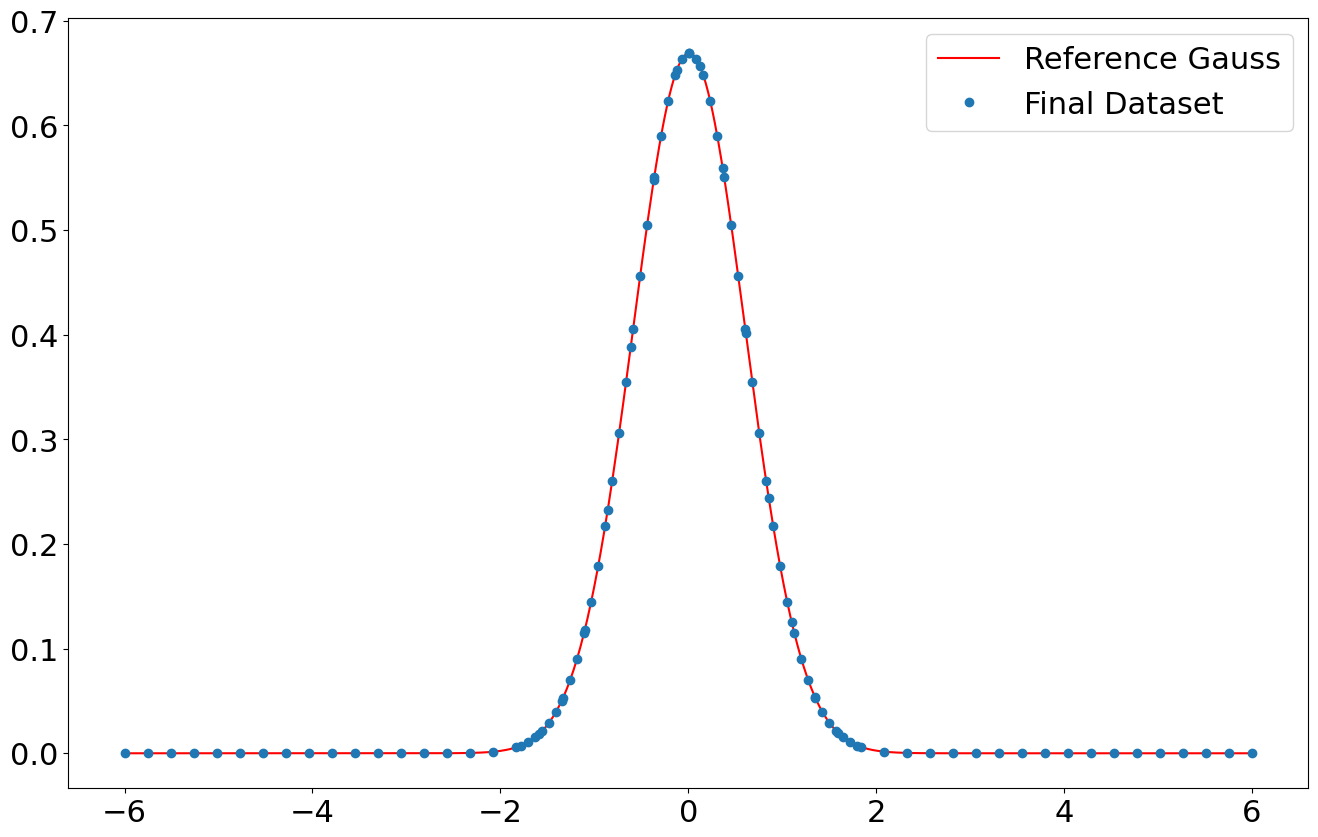

100


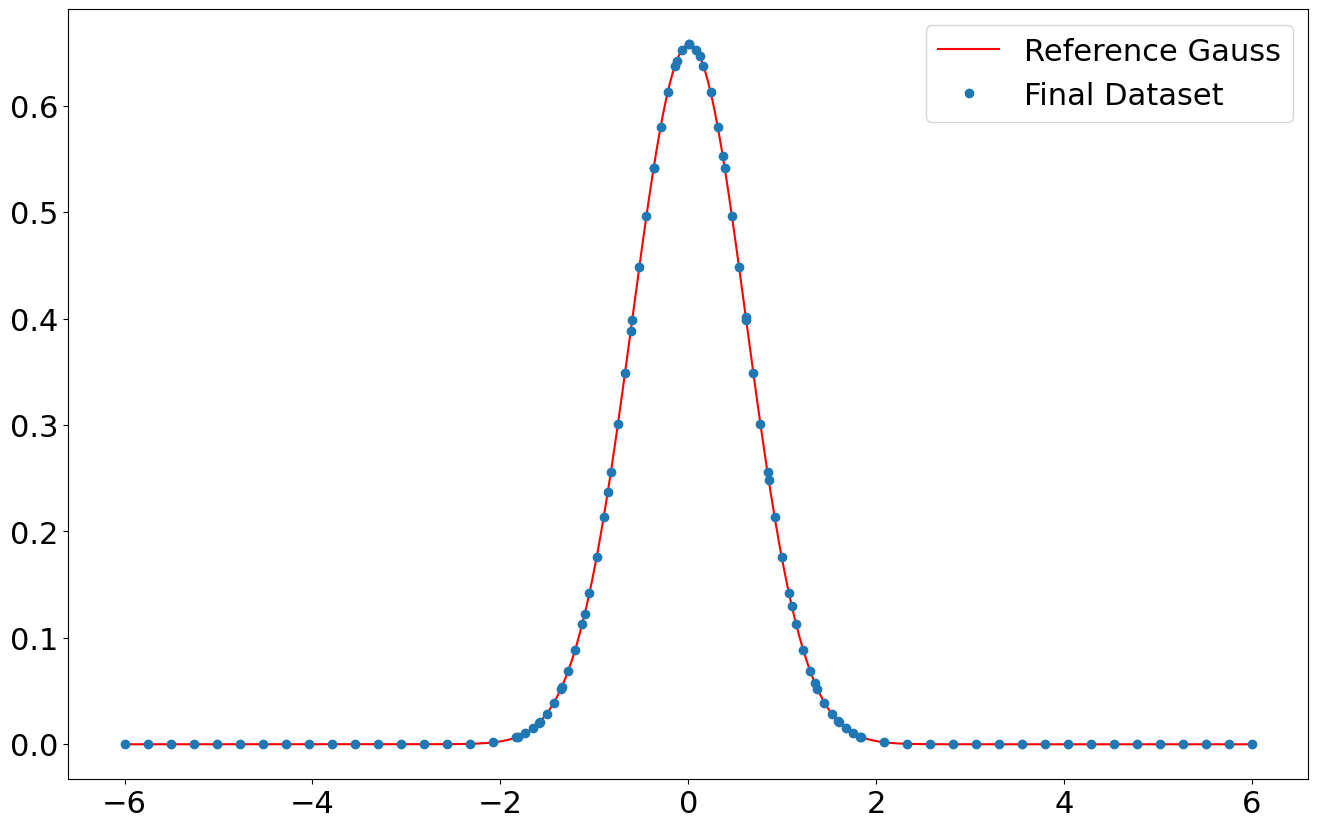

100


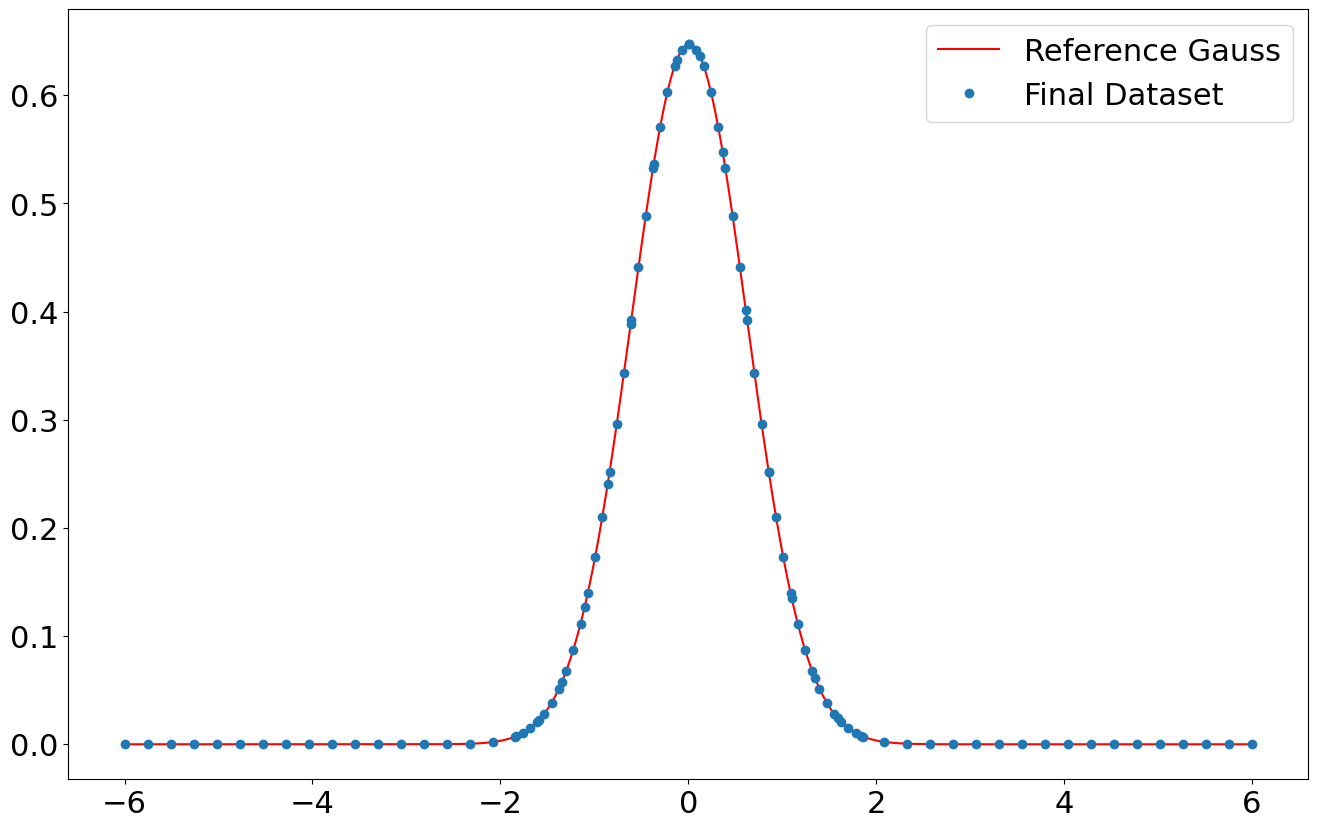

100


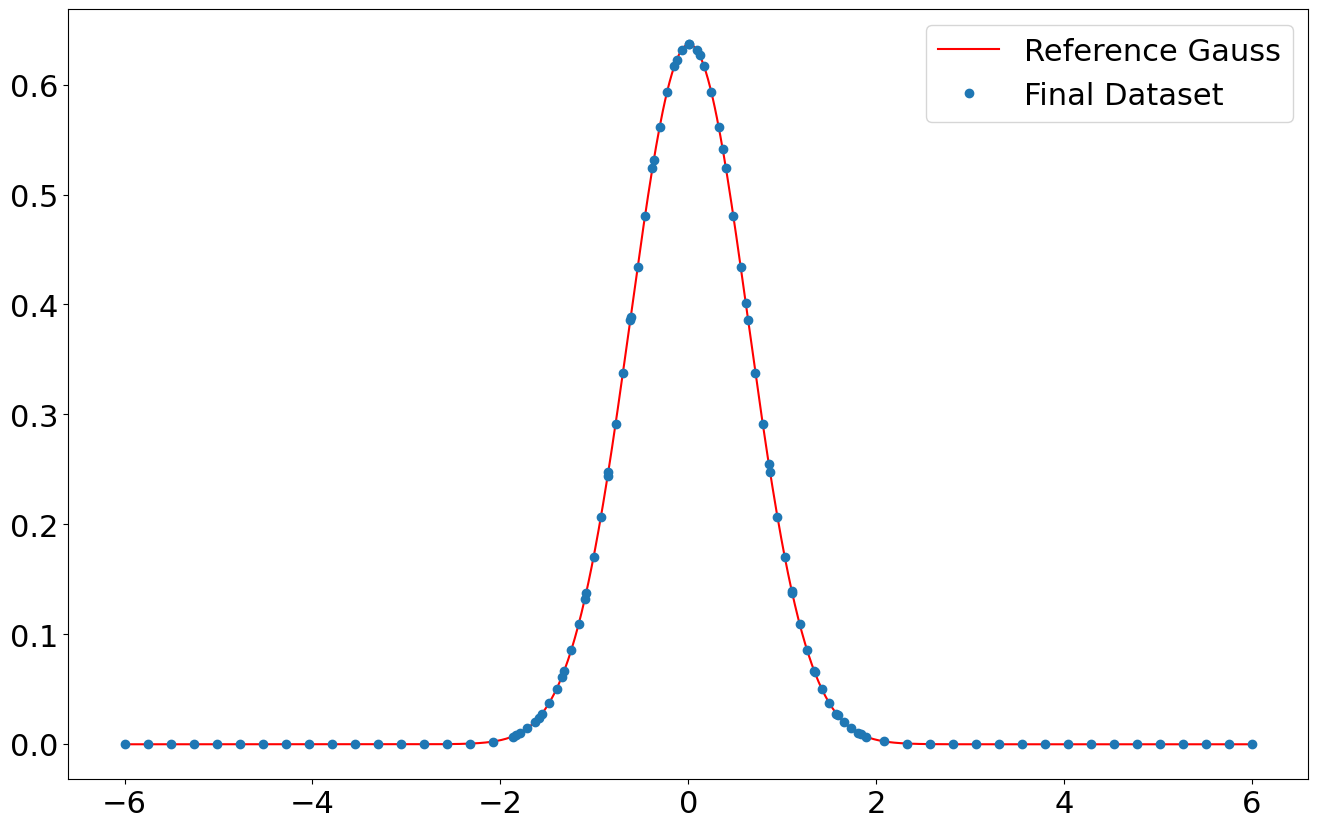

100


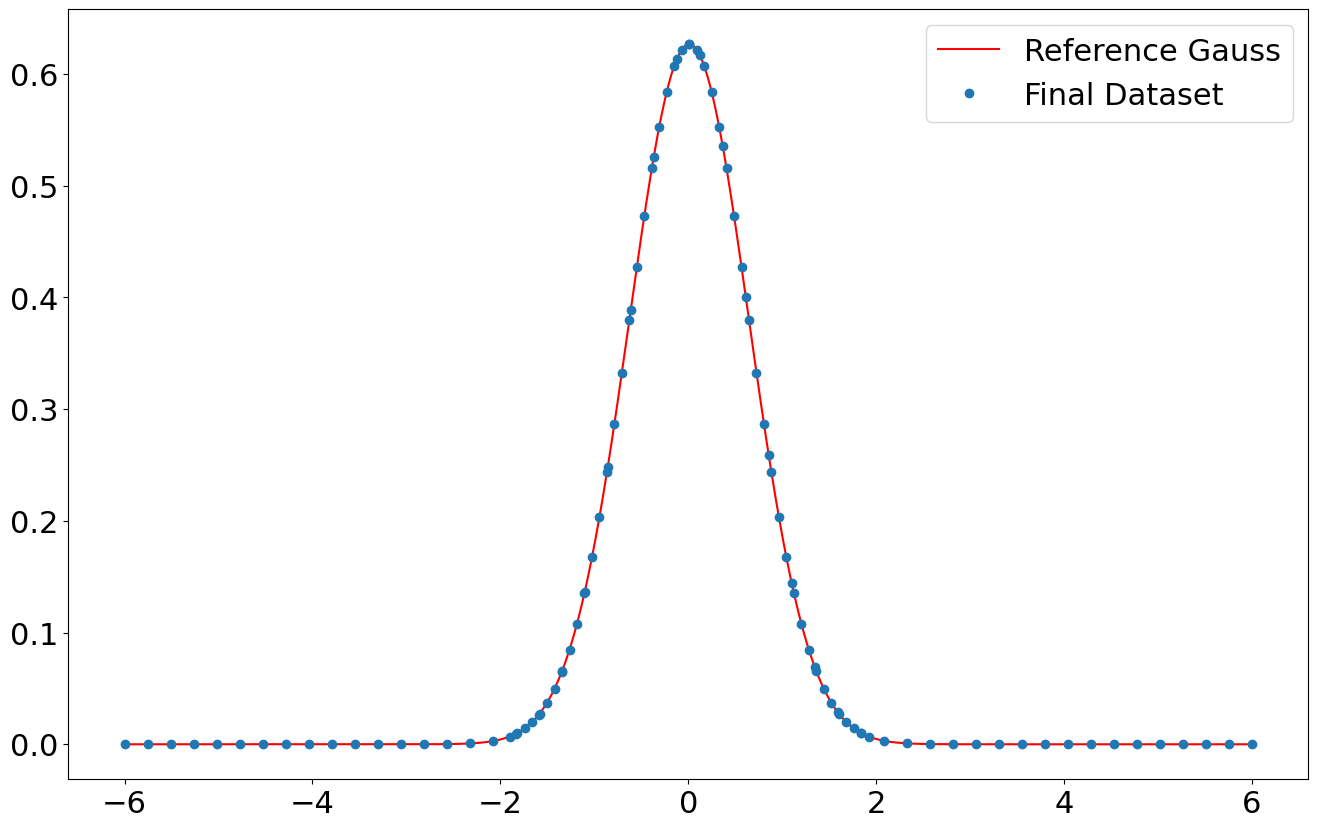

100


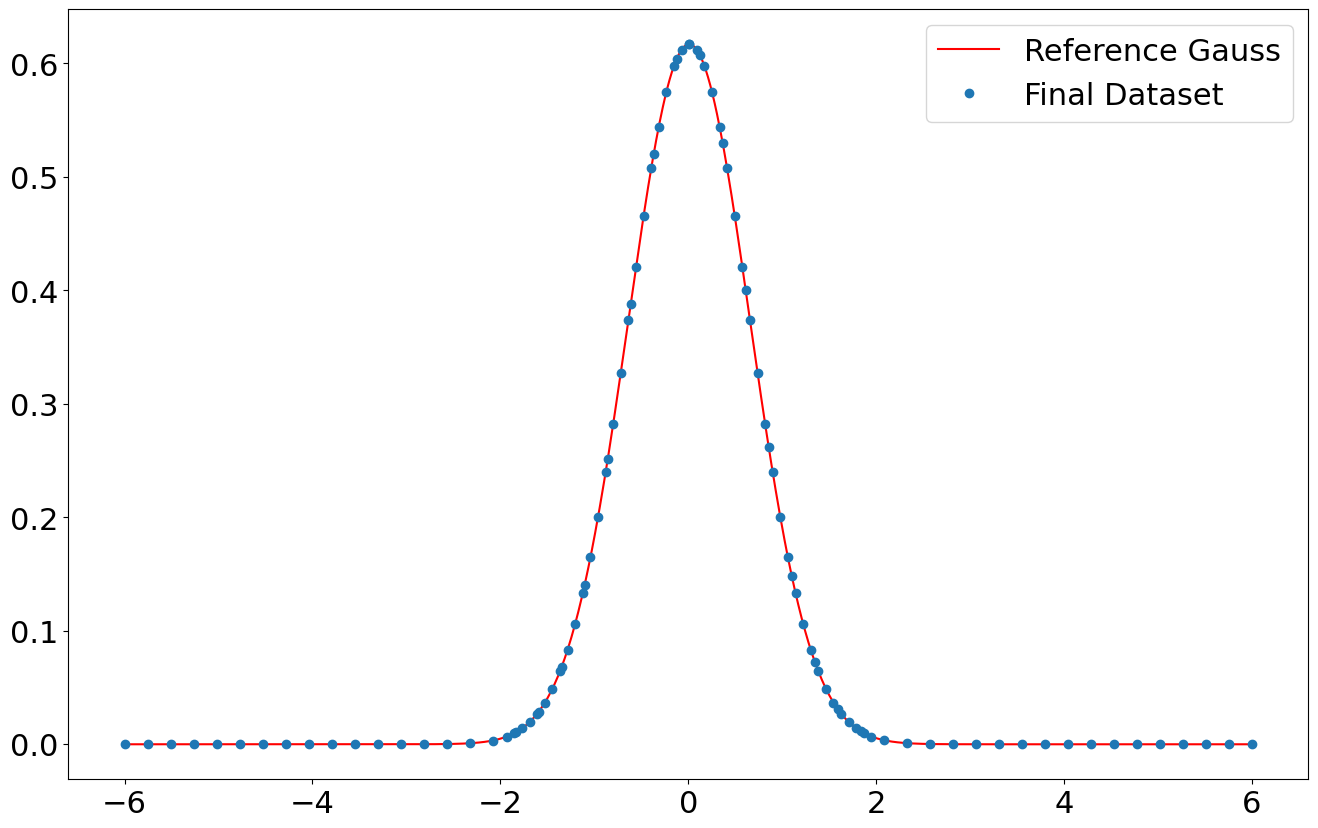

100


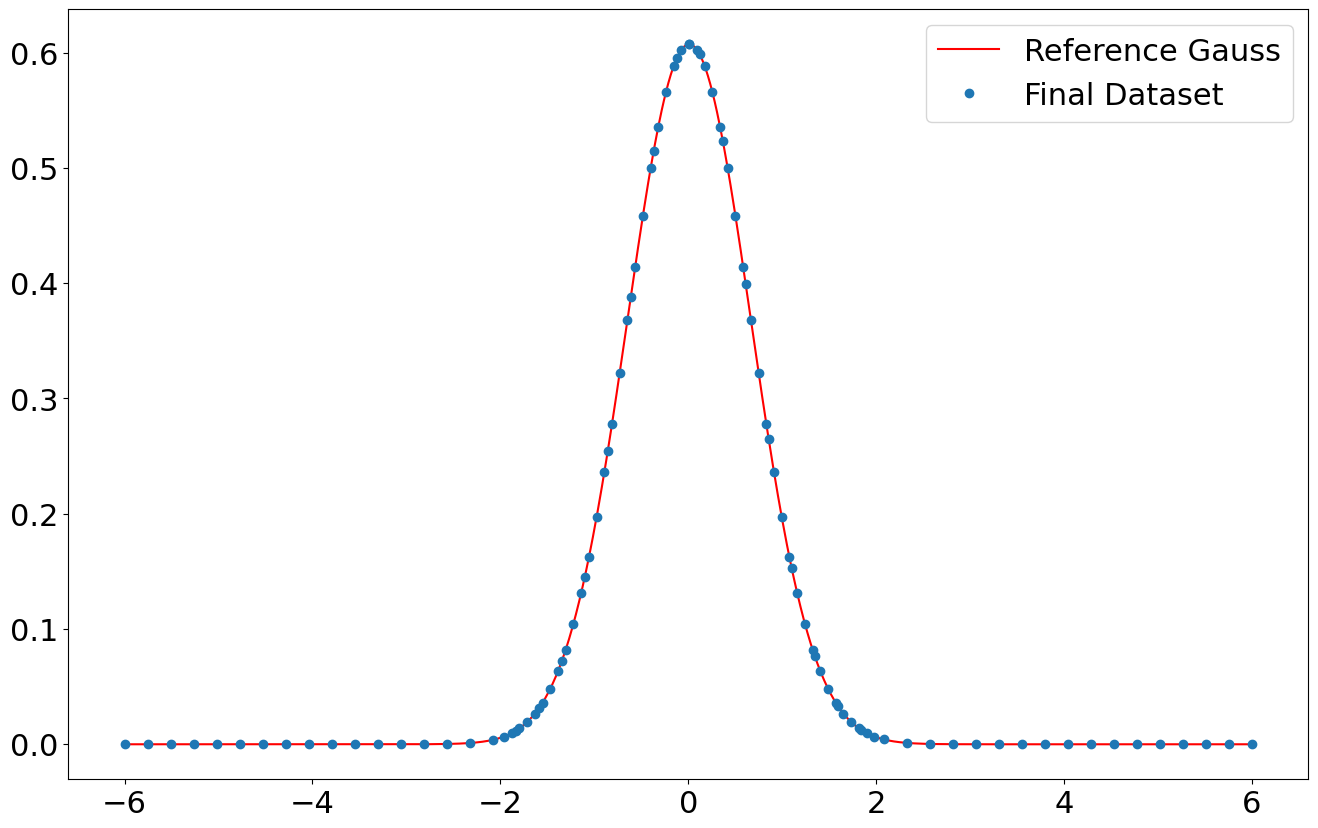

100


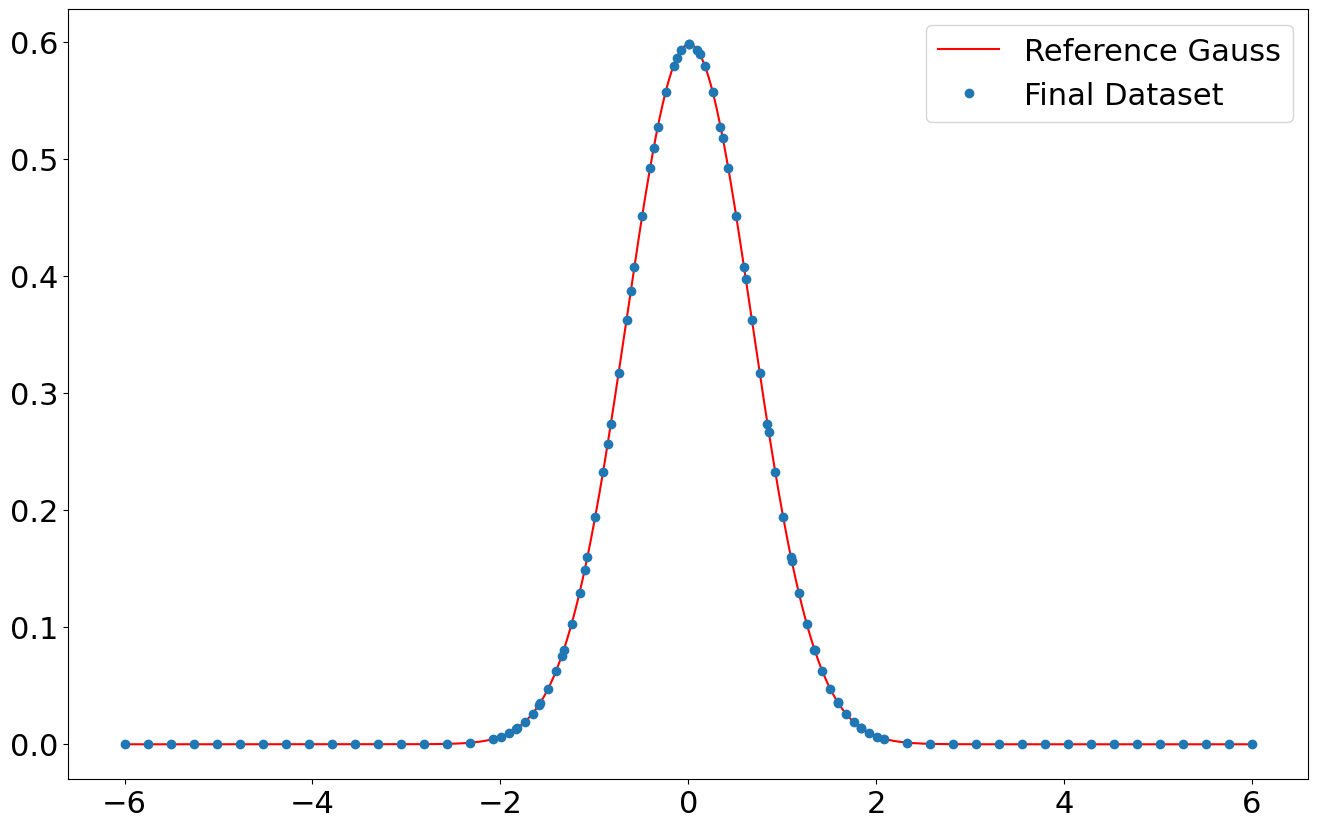

100


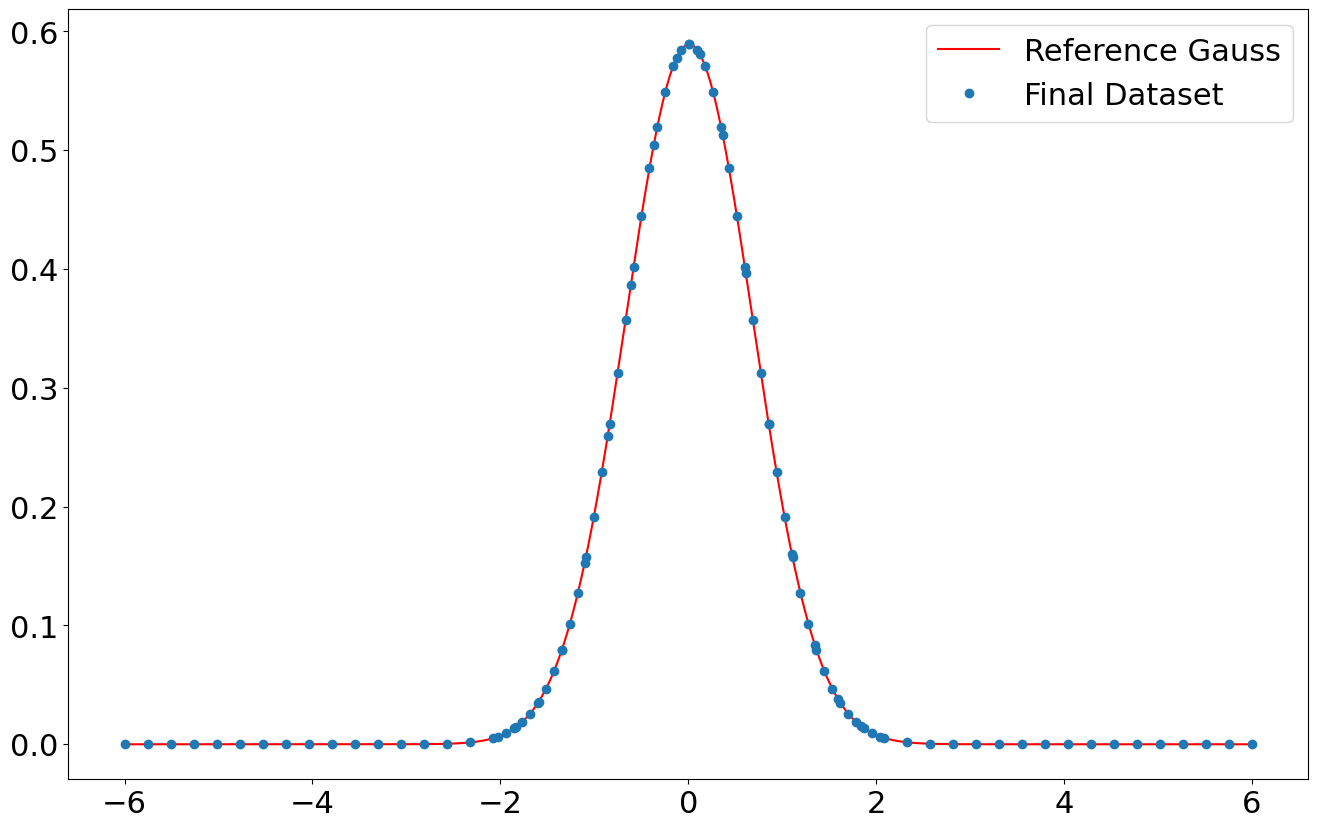

100


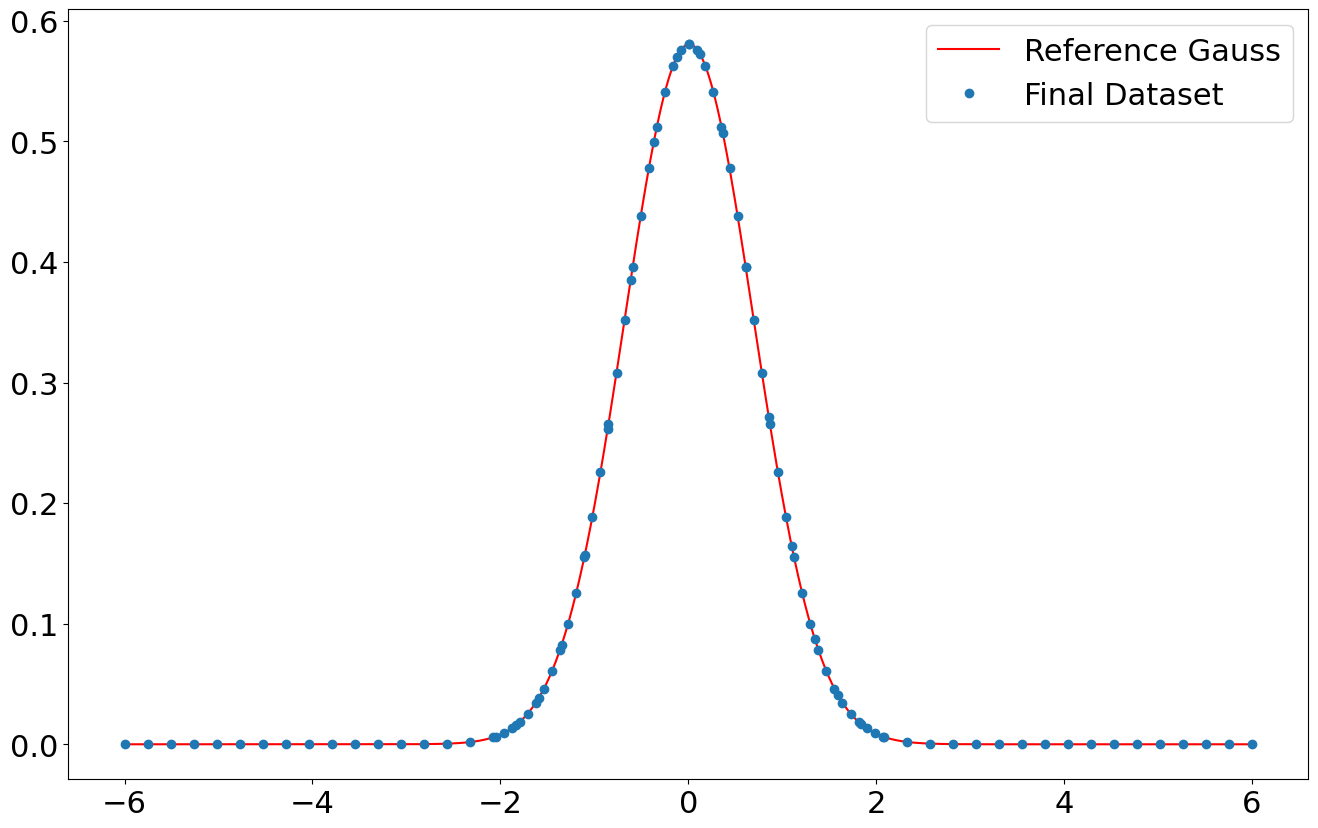

100


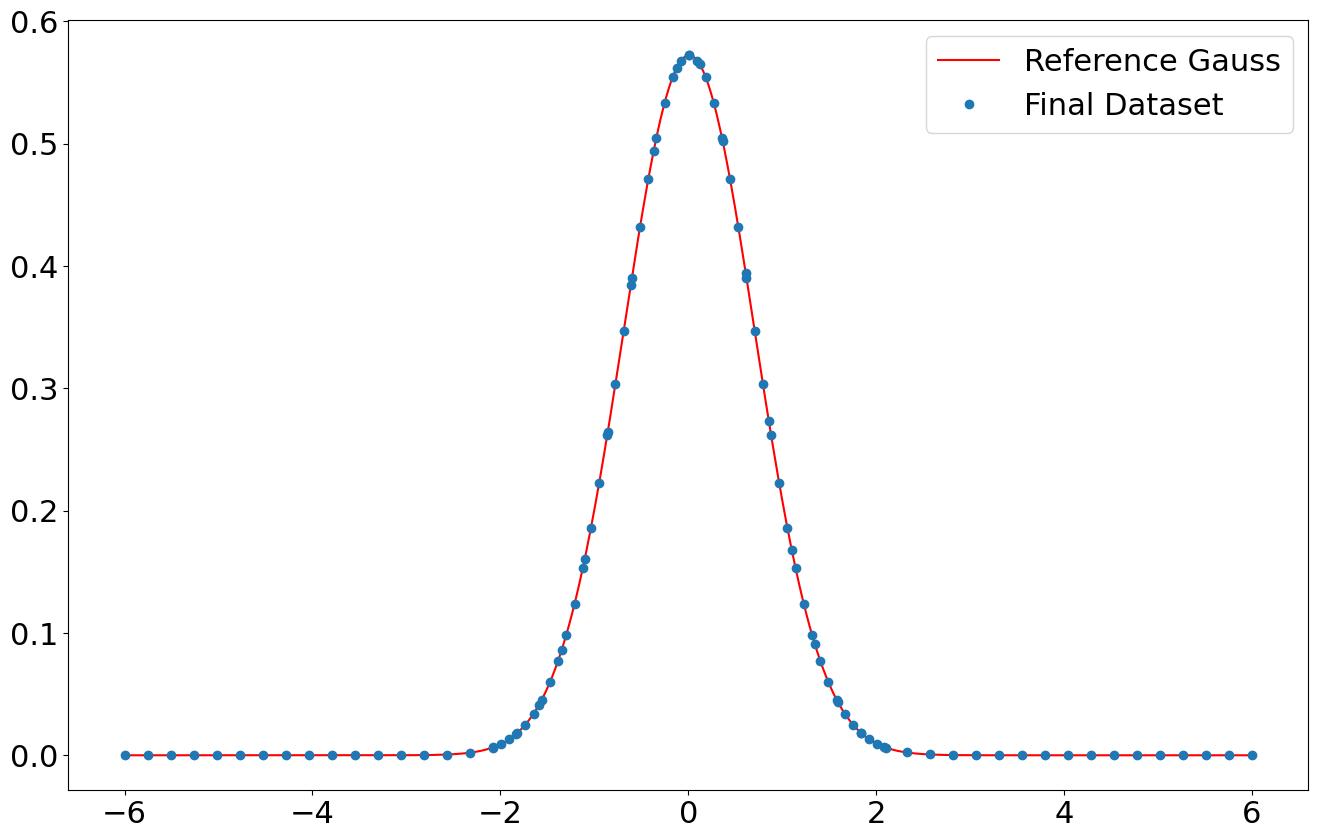

100


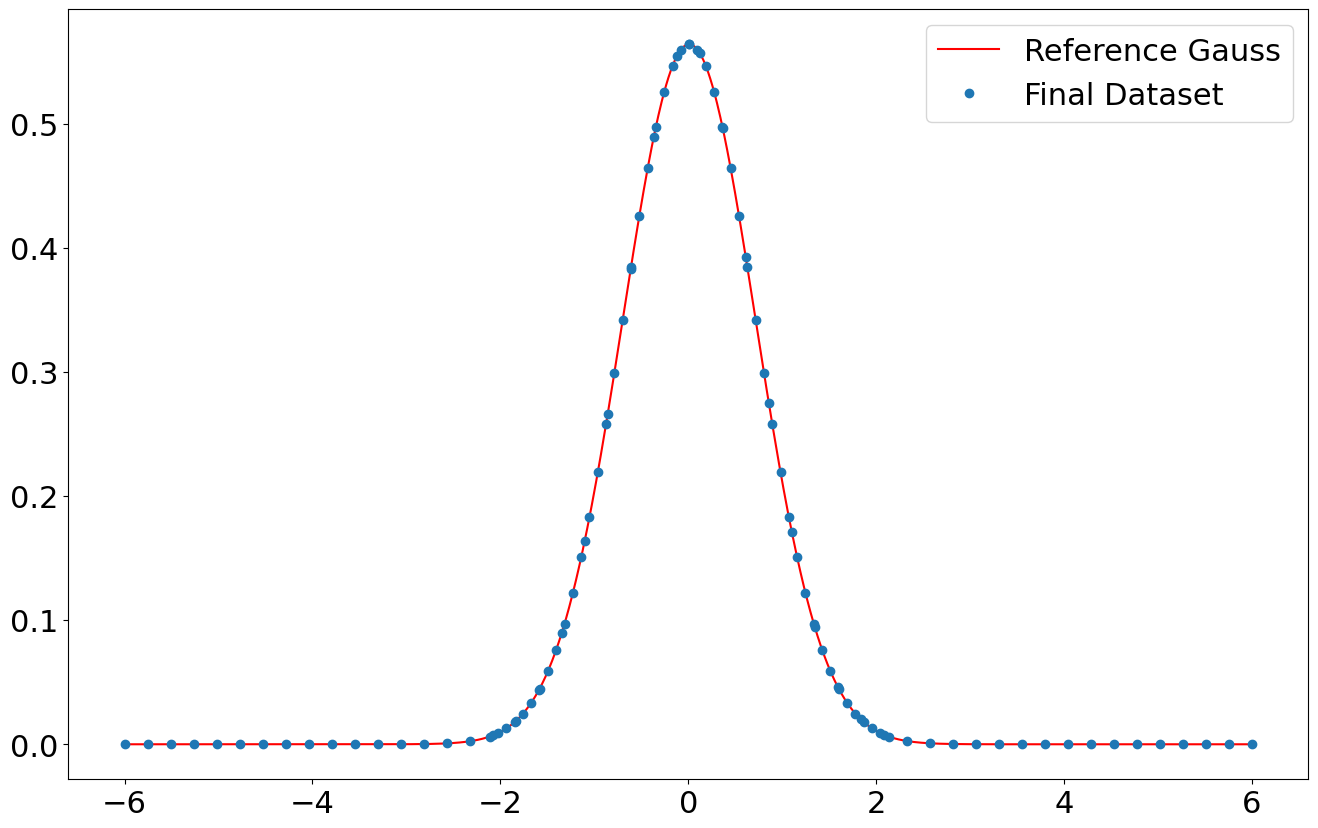

100


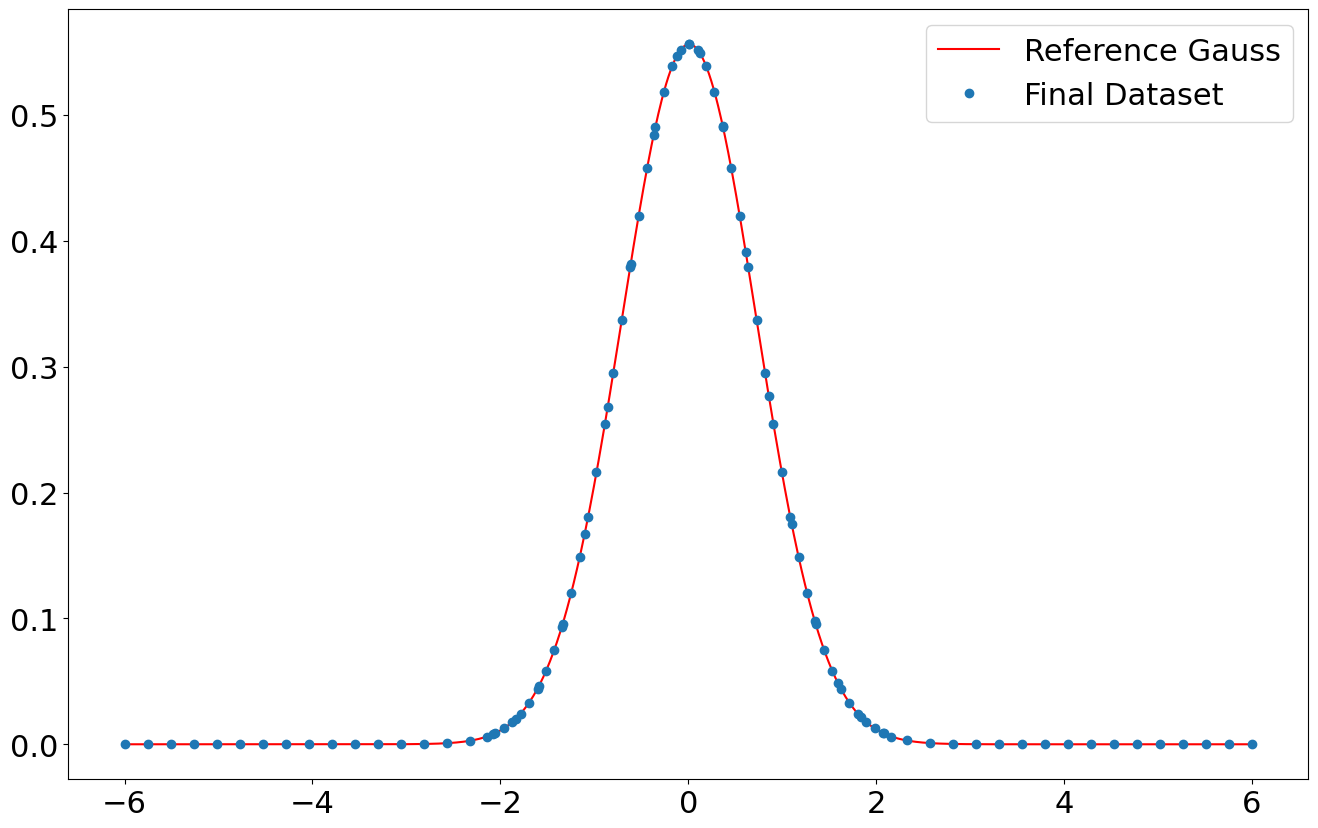

100


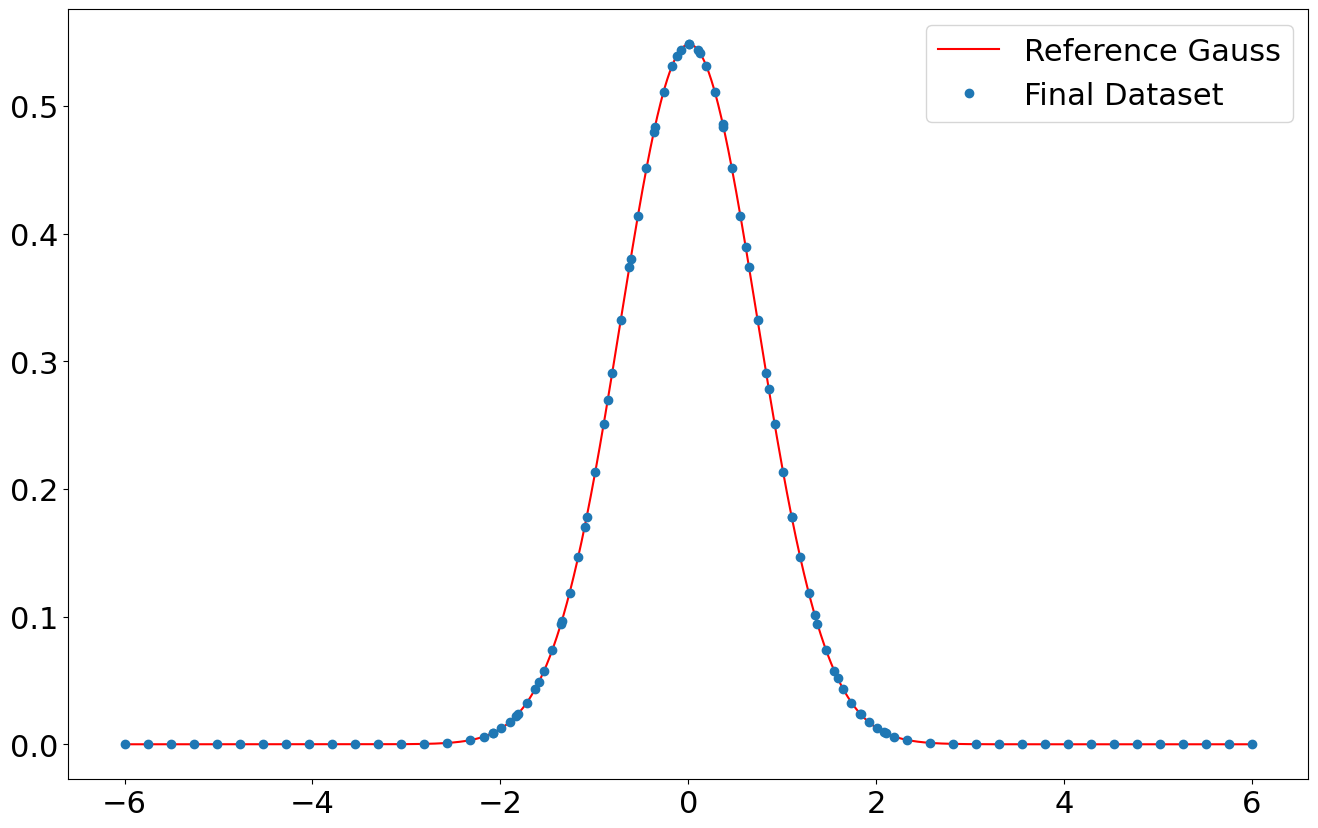

100


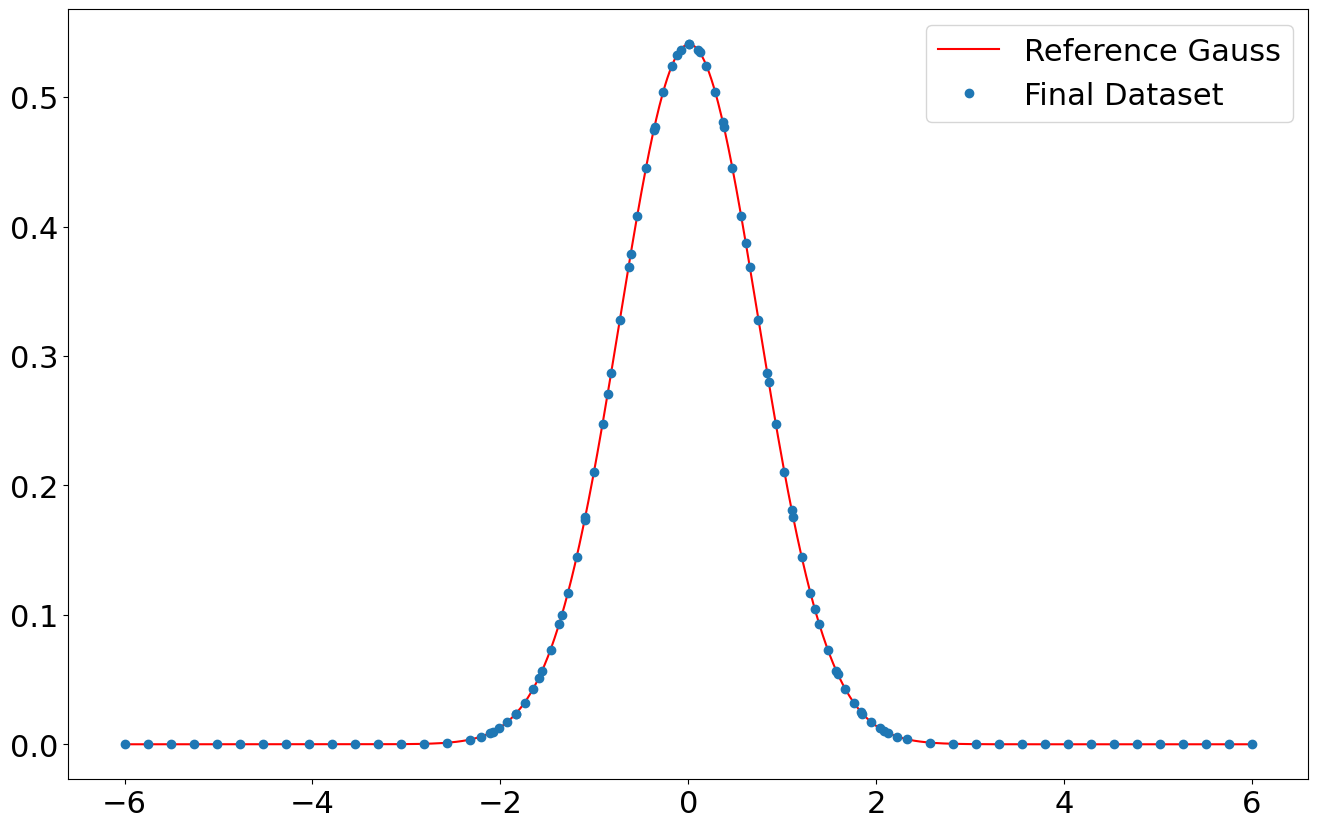

100


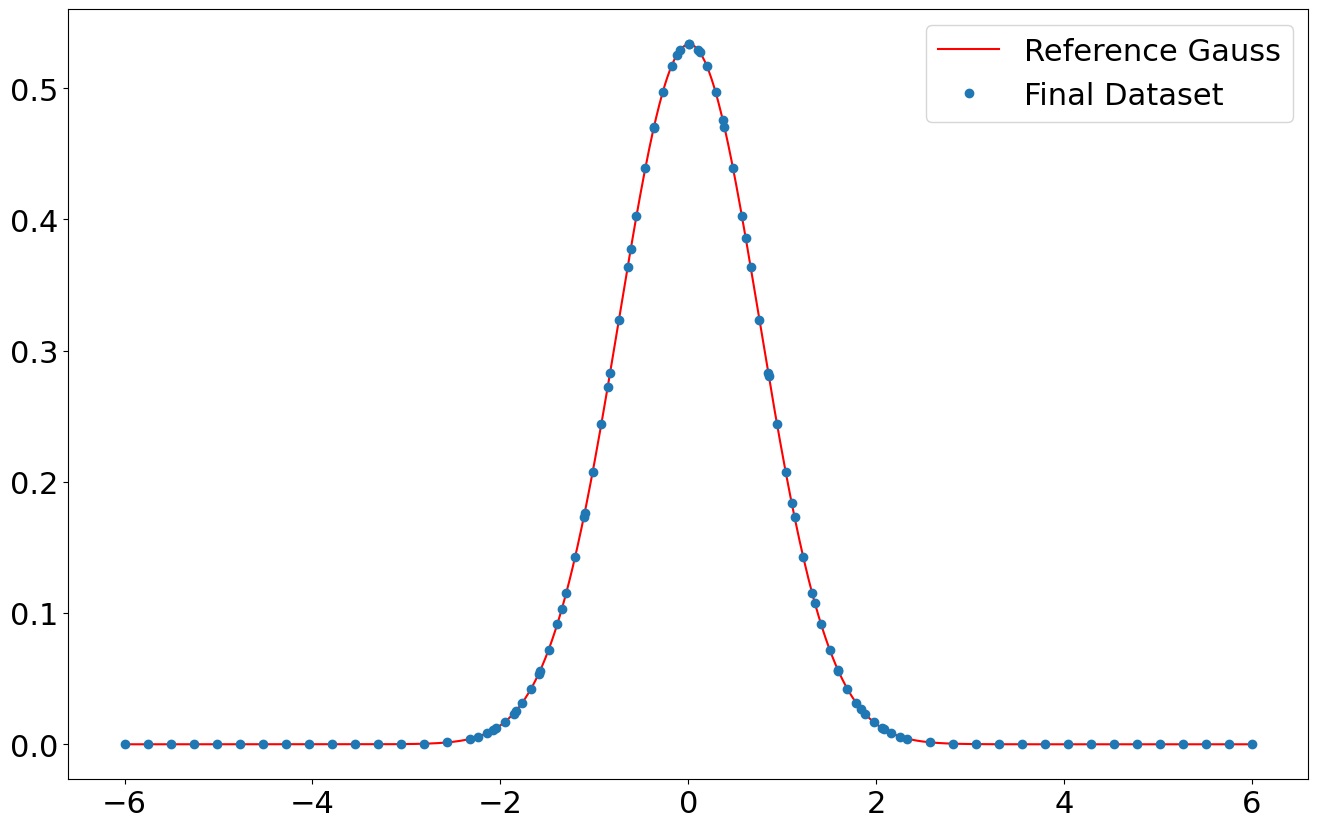

100


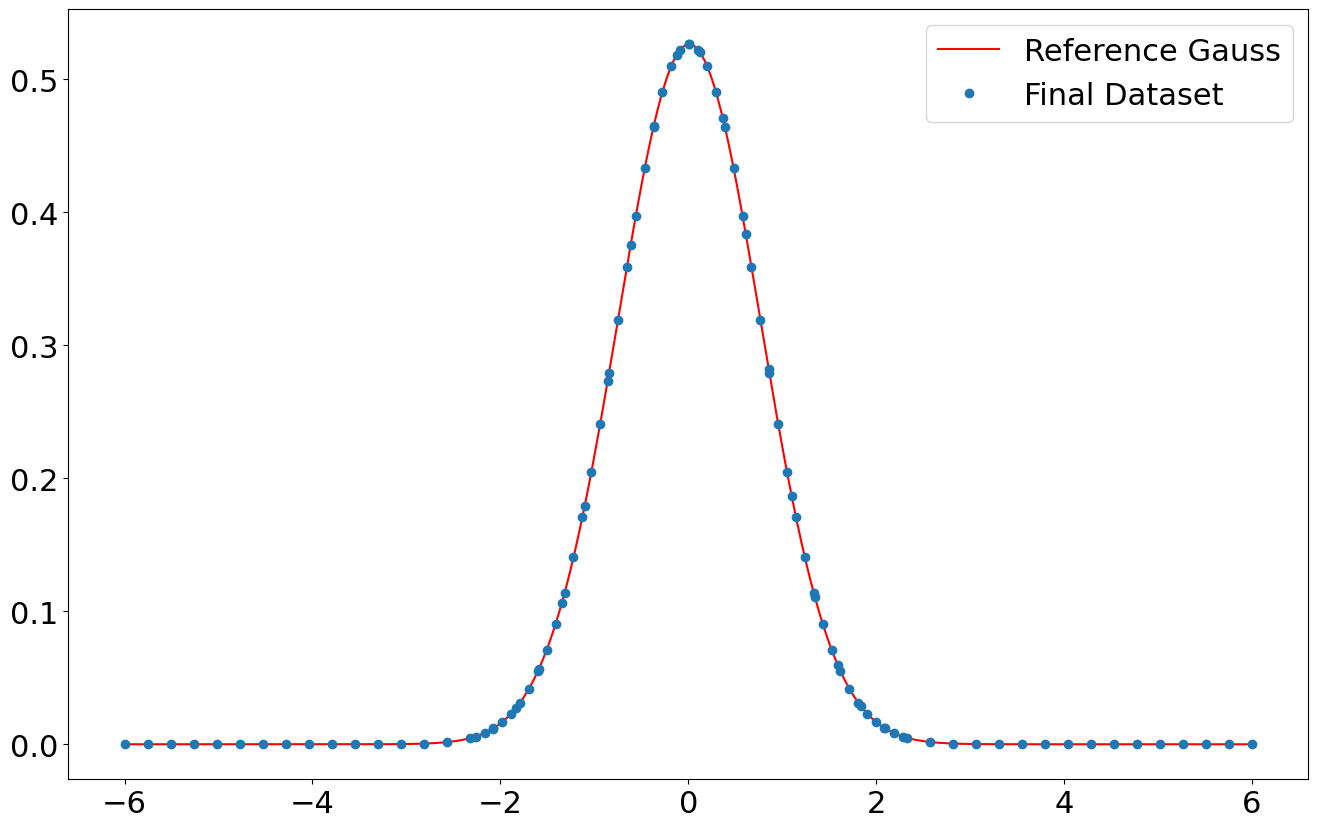

100


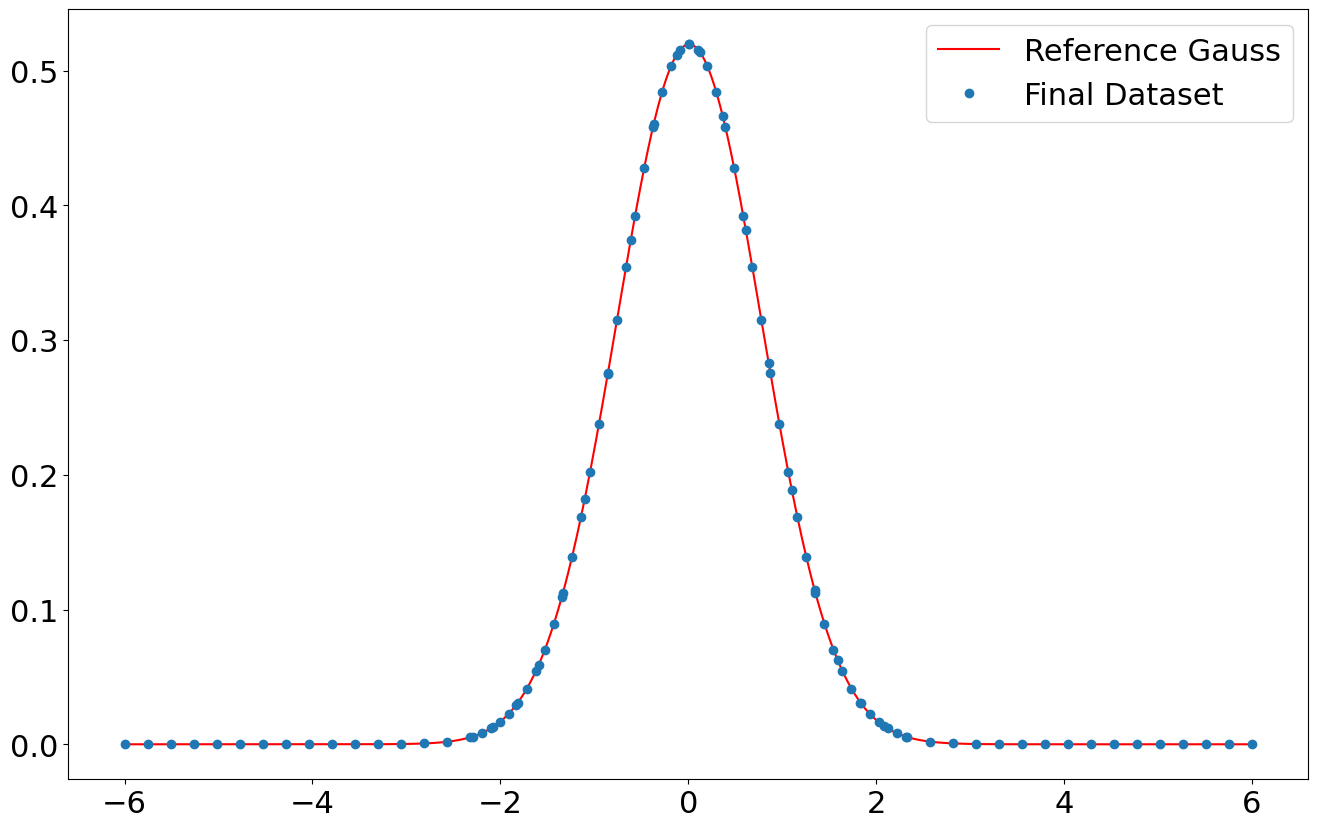

100


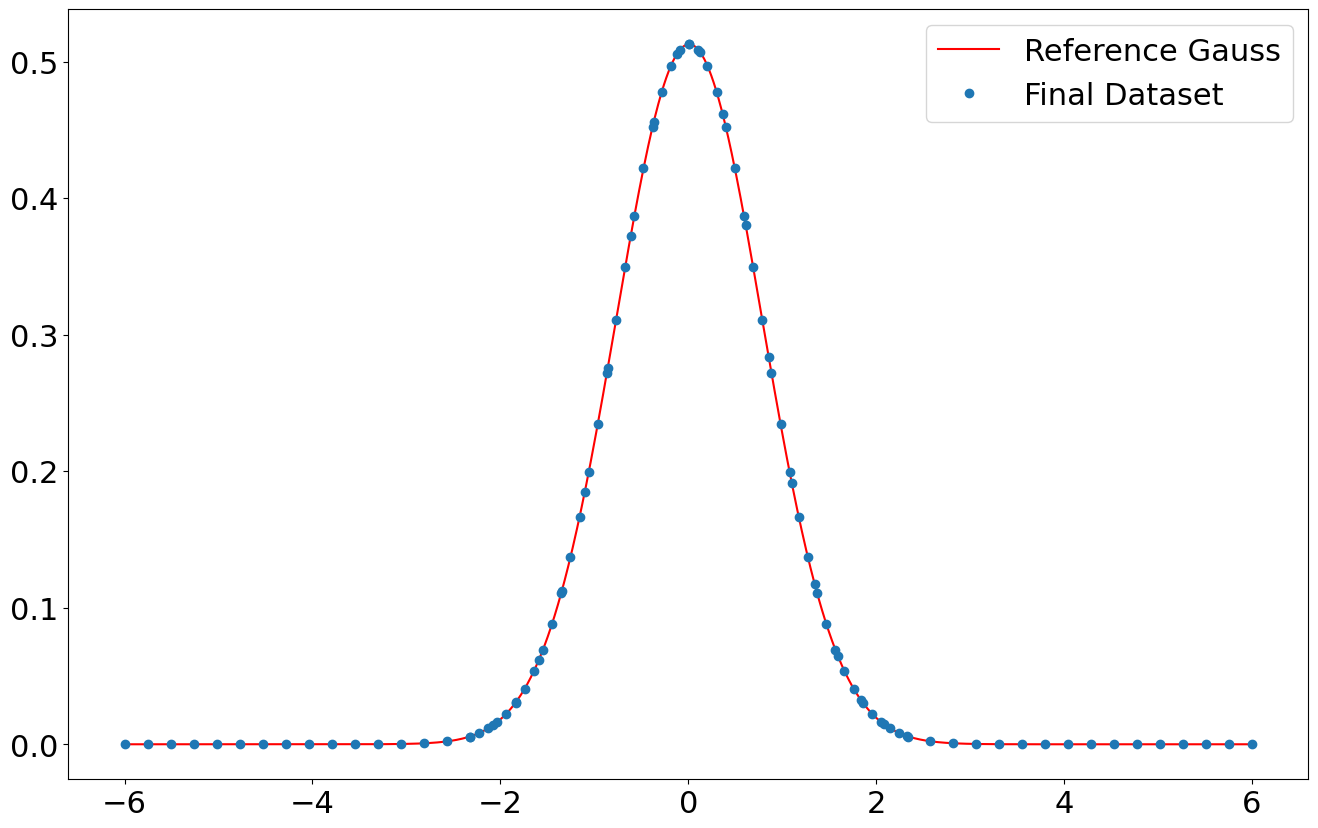

100


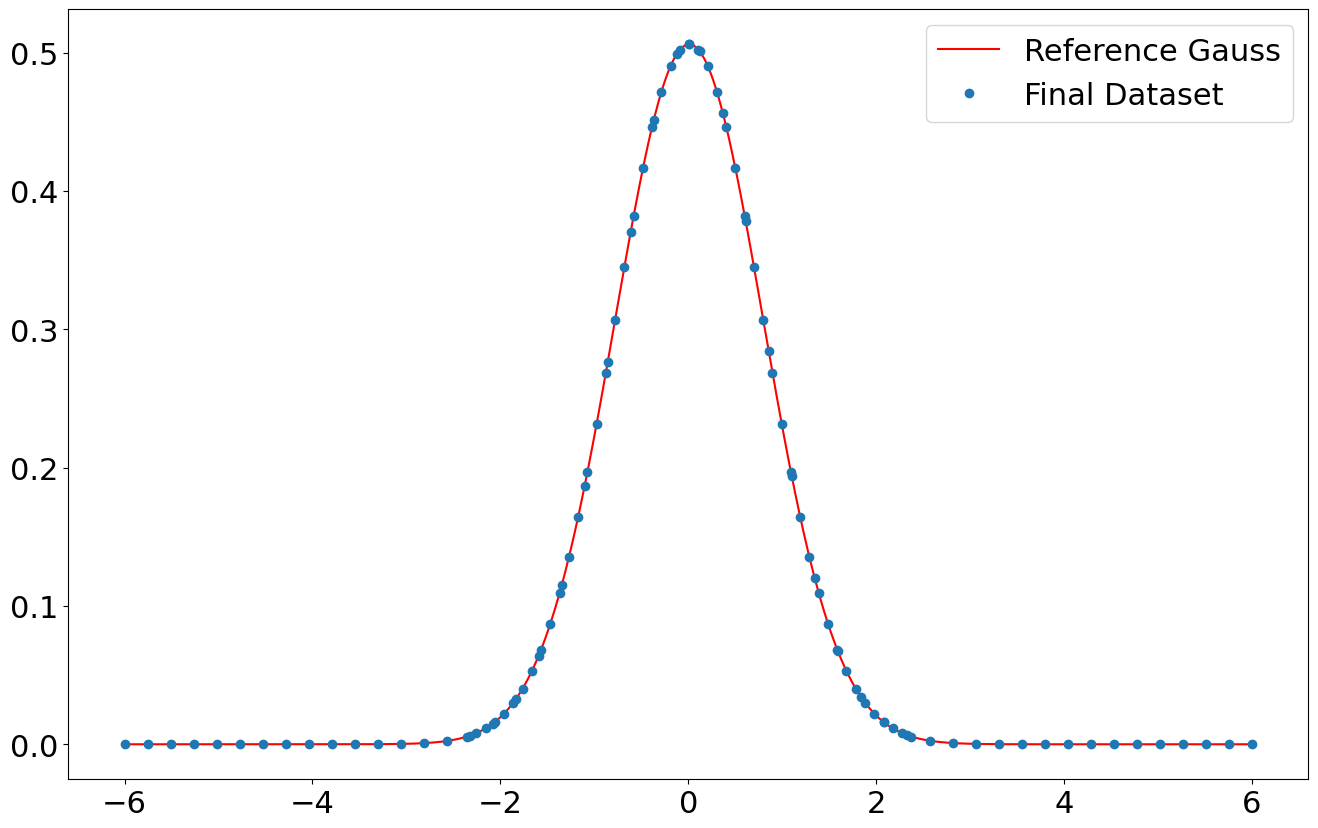

100


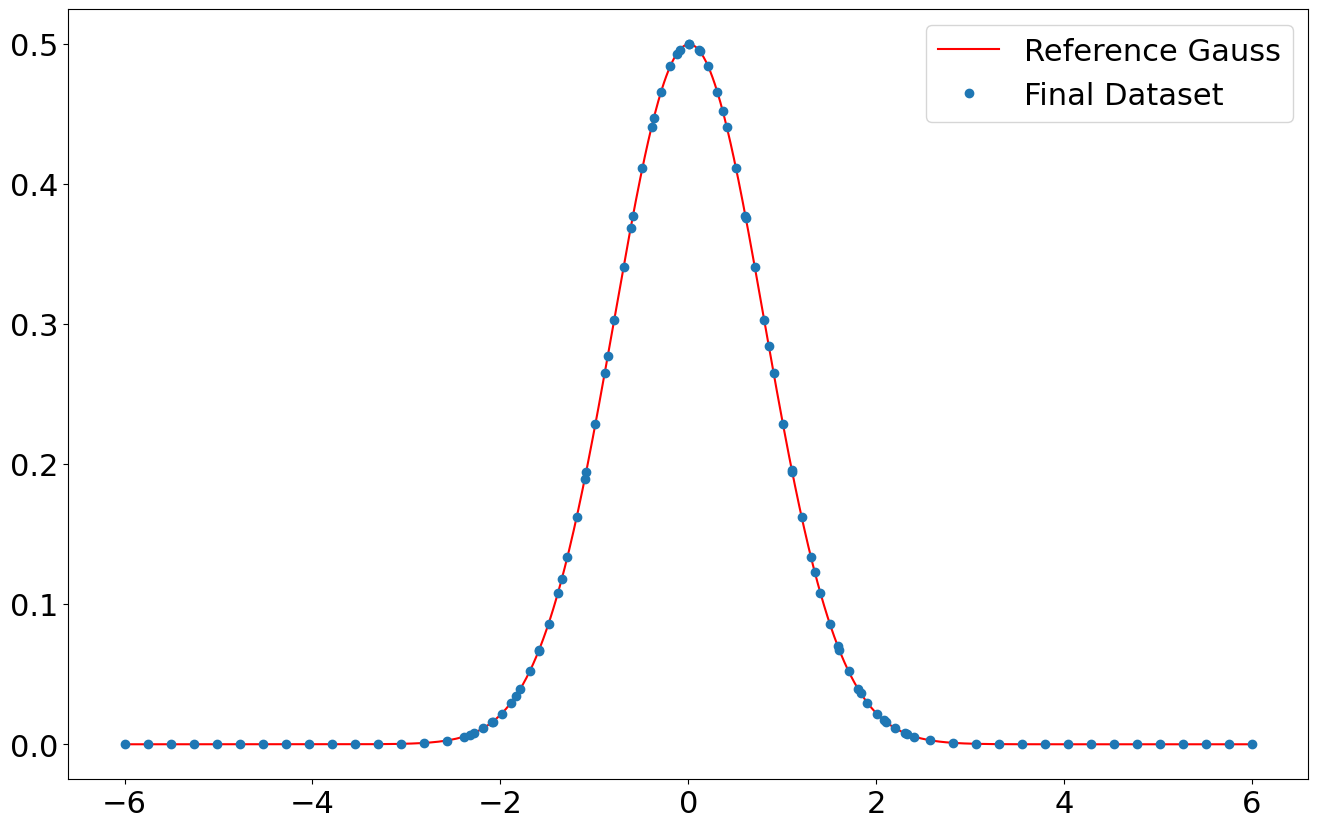

100


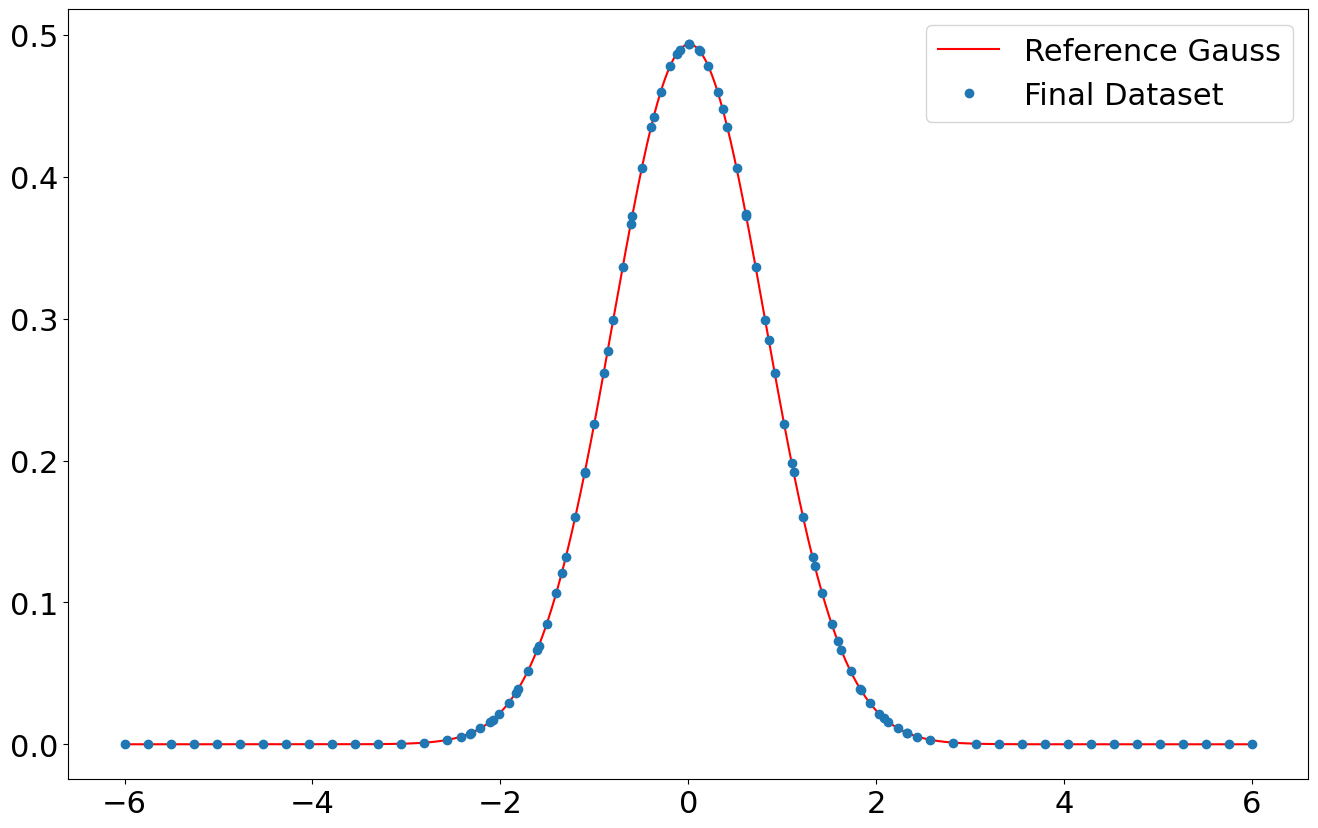

100


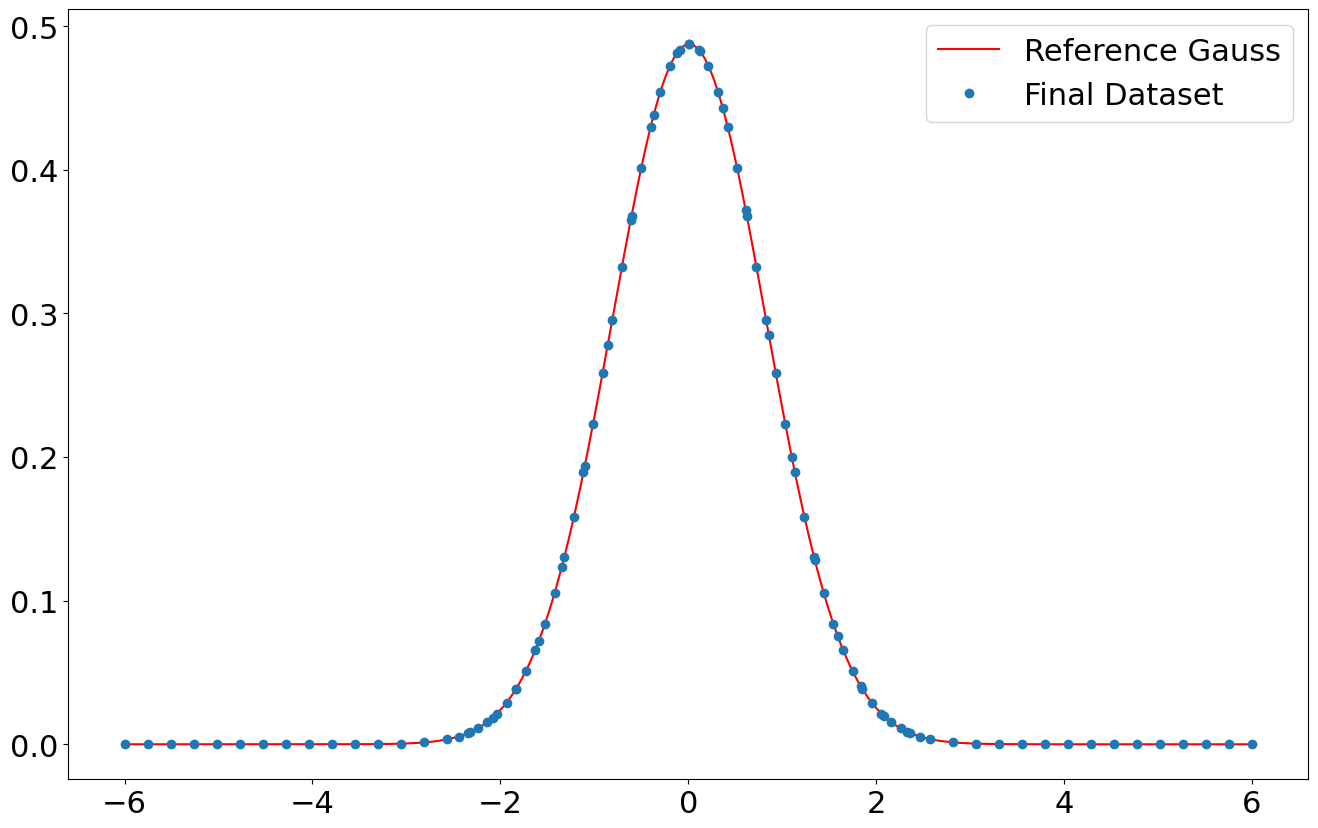

100


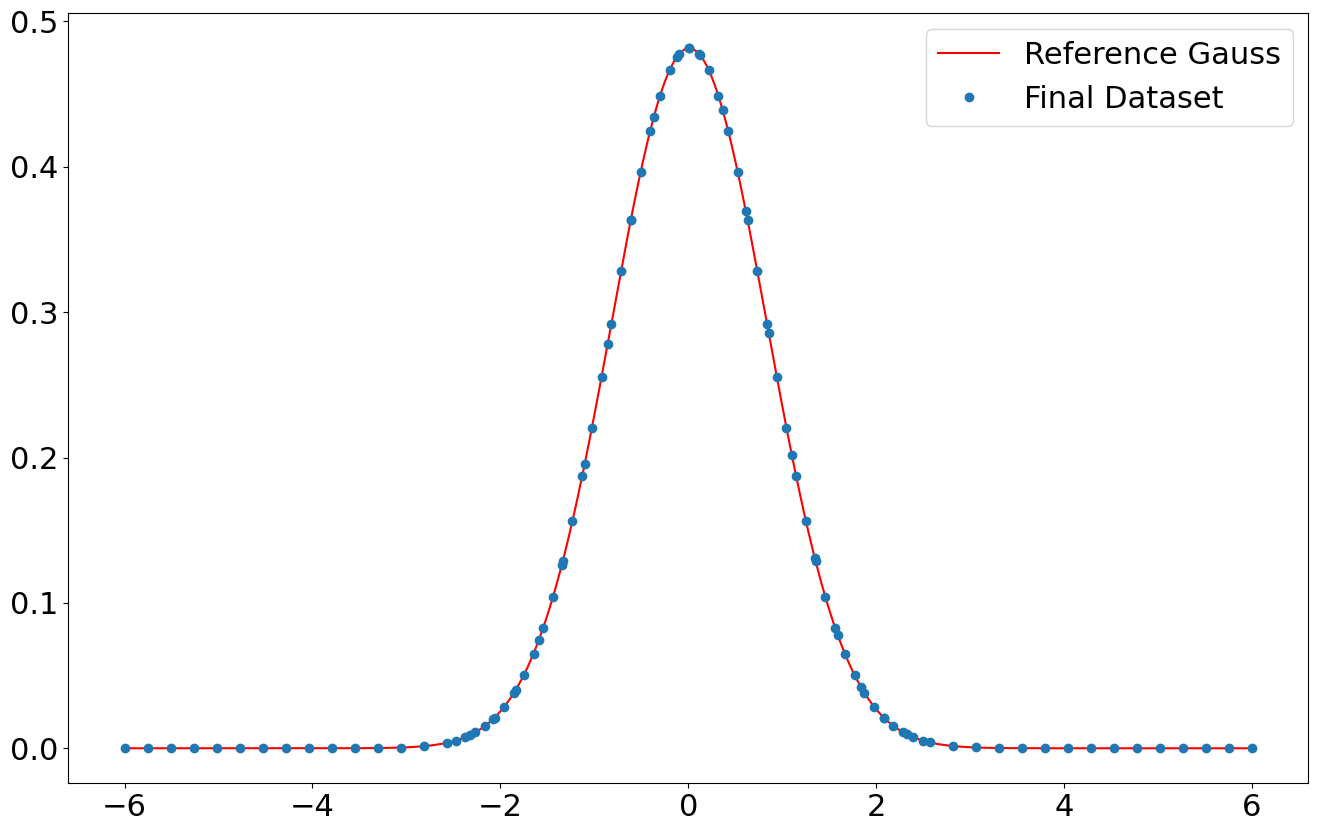

100


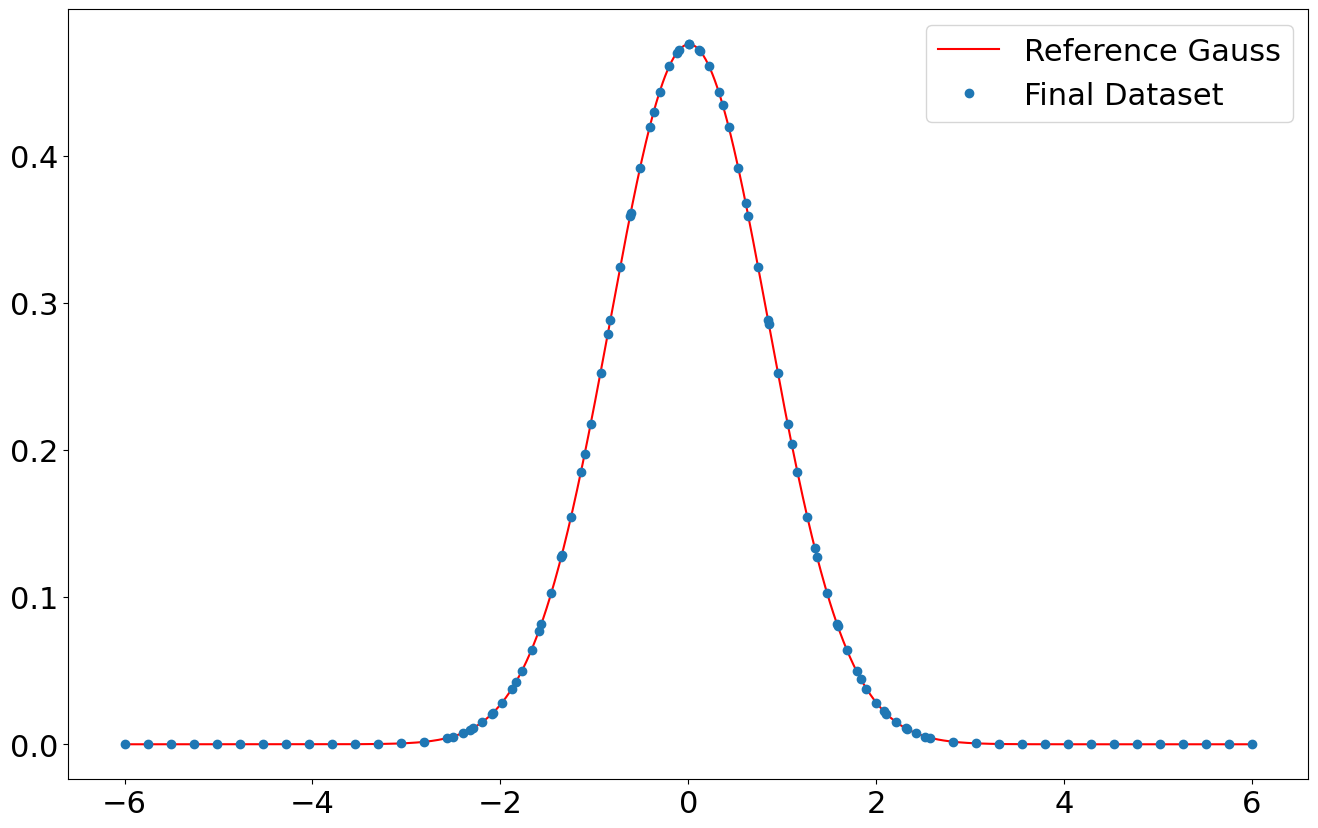

100


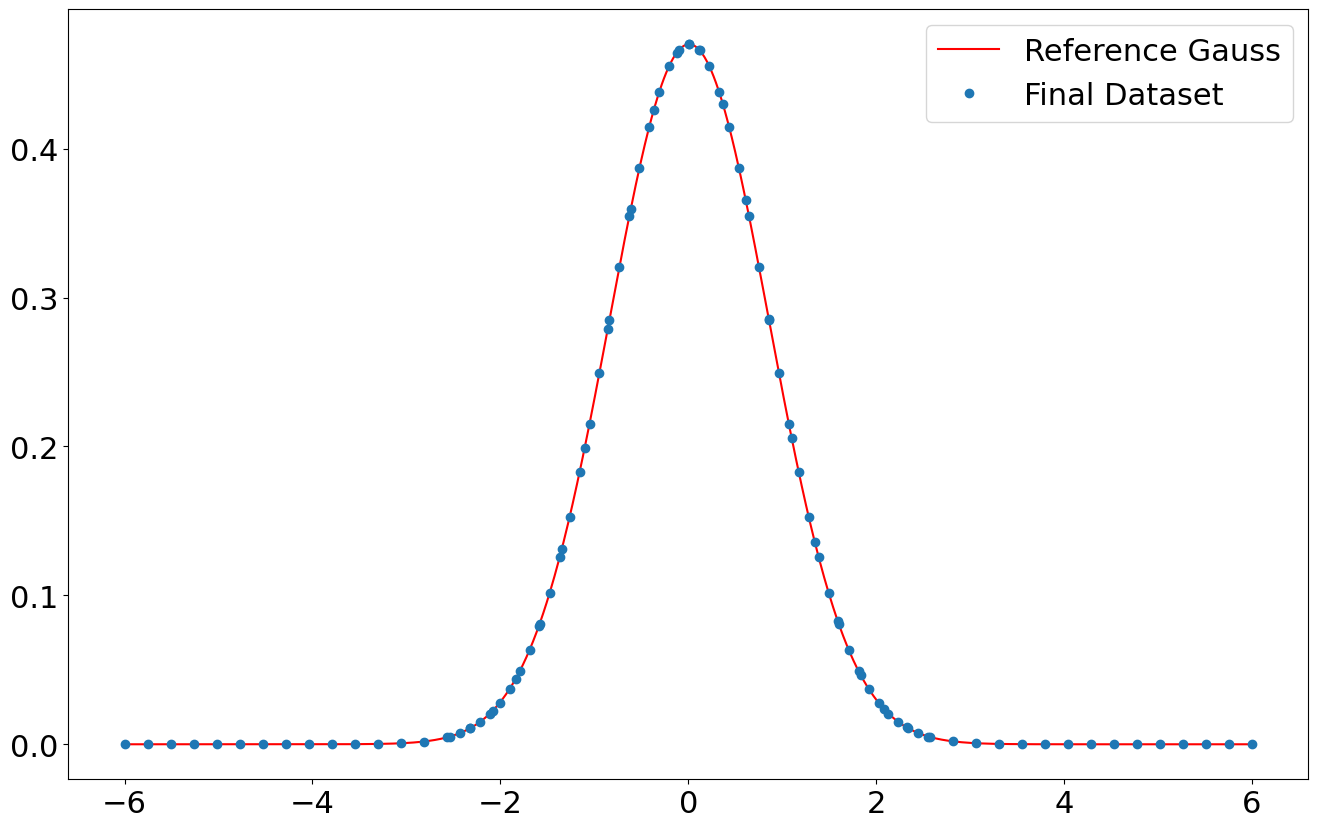

100


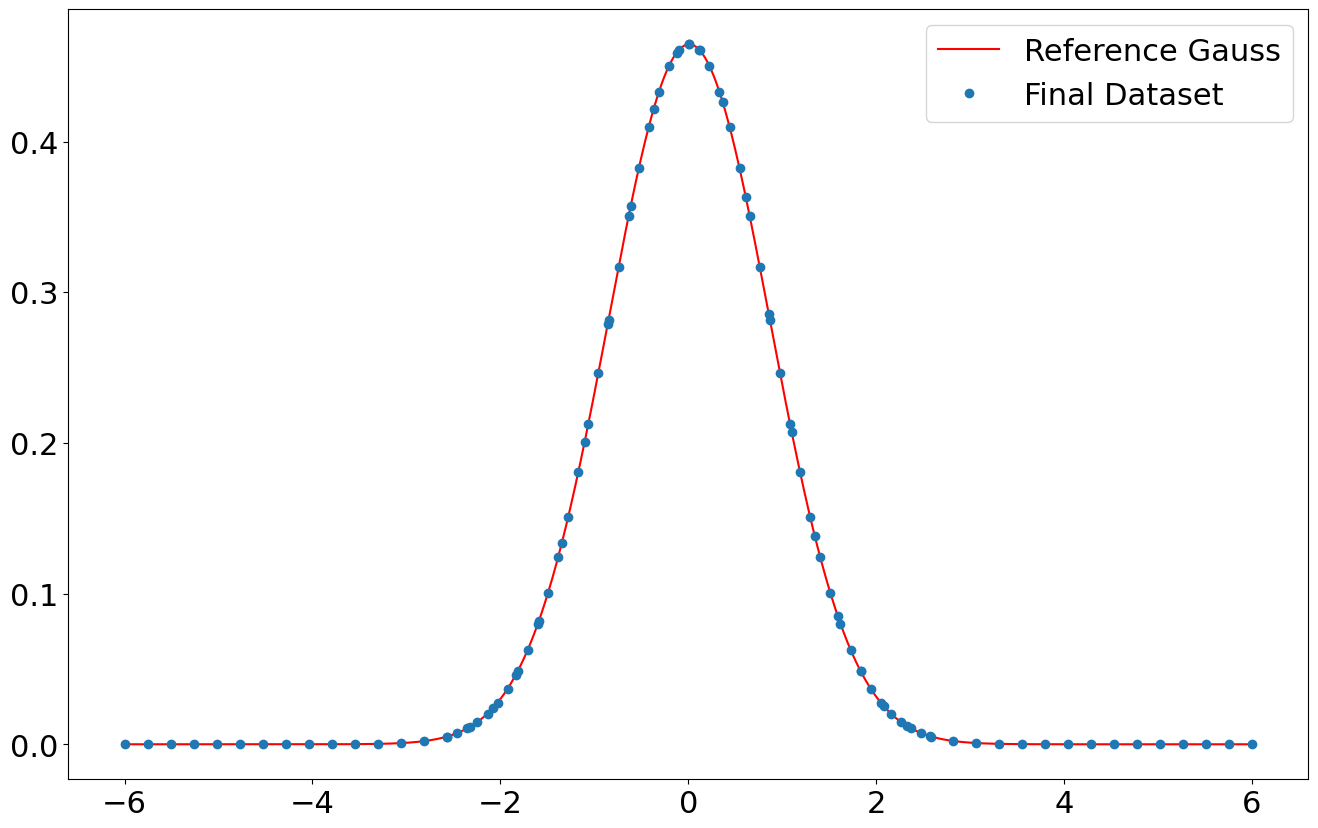

100


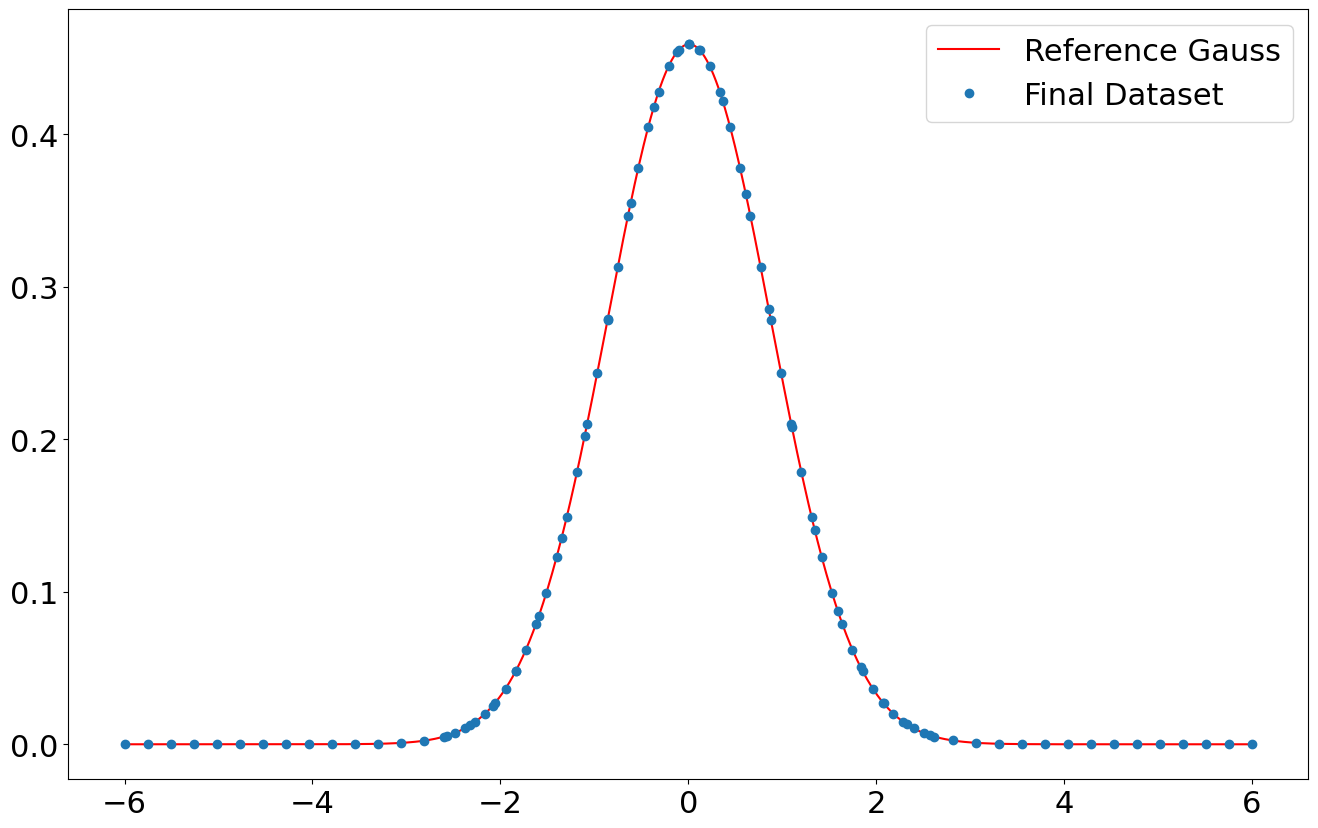

100


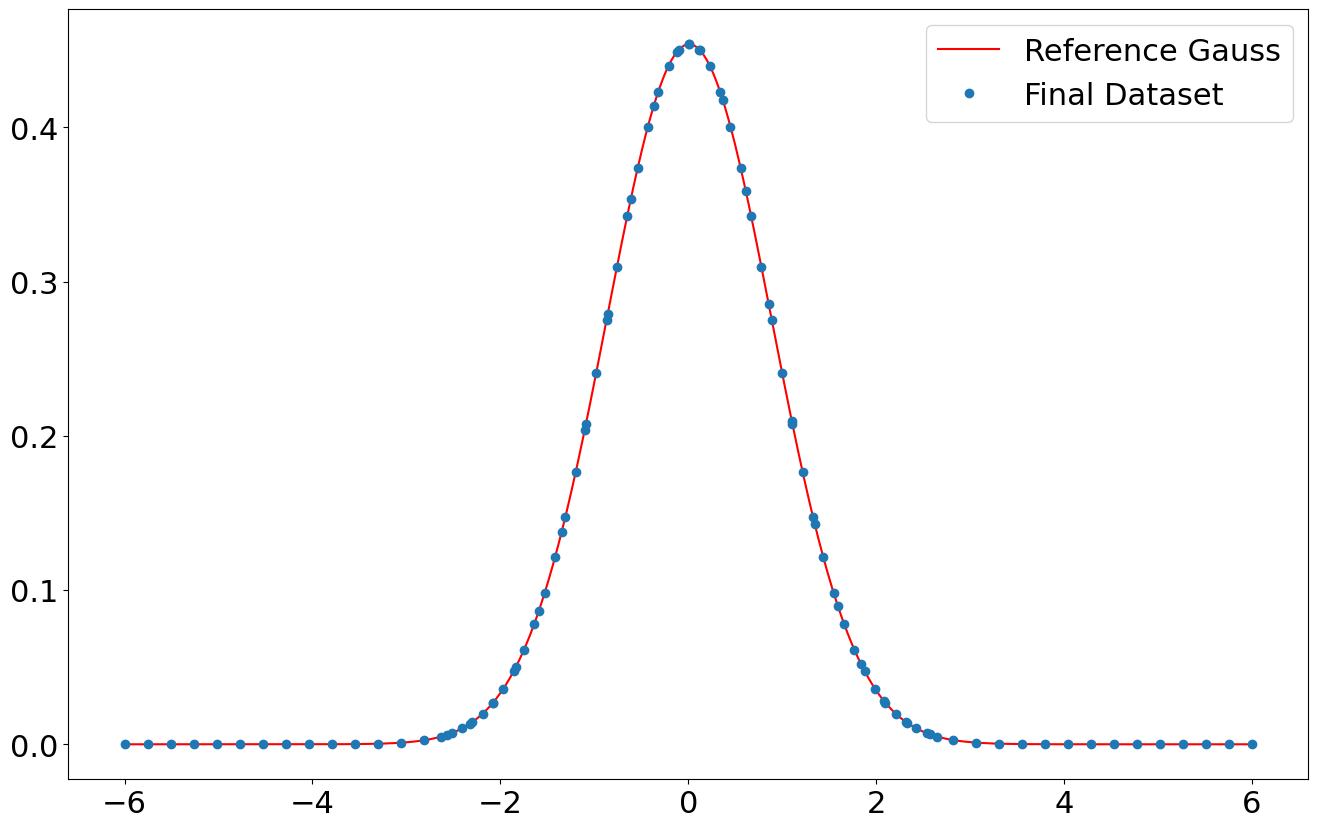

100


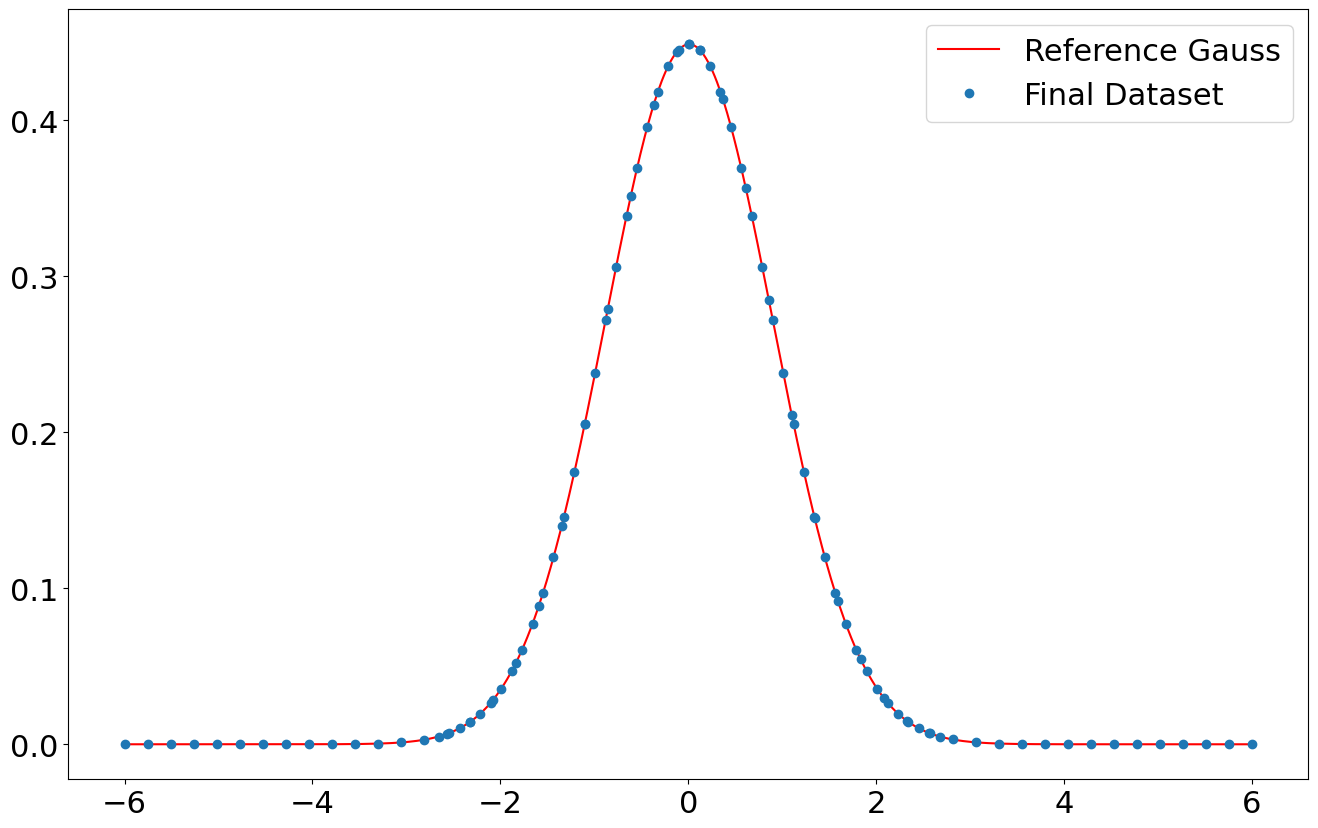

100


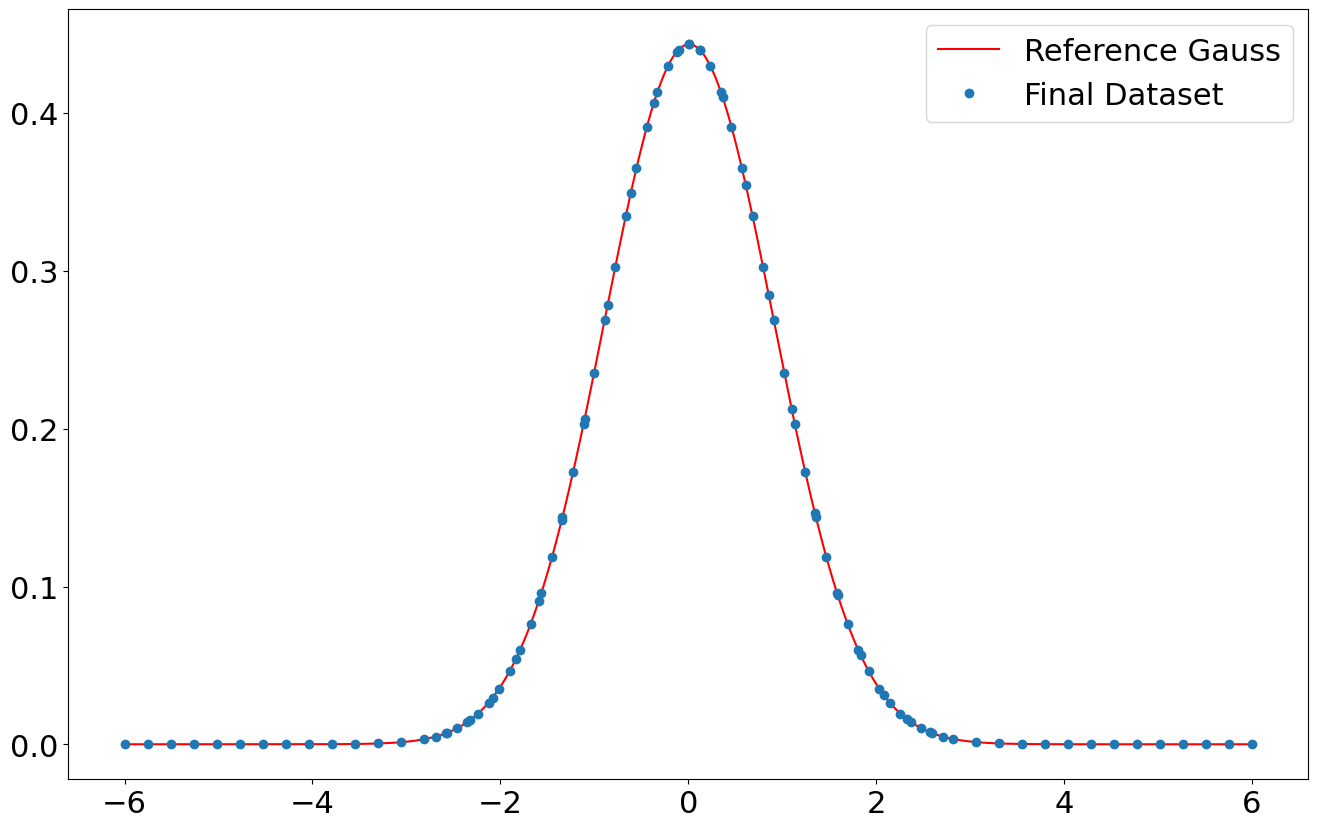

100


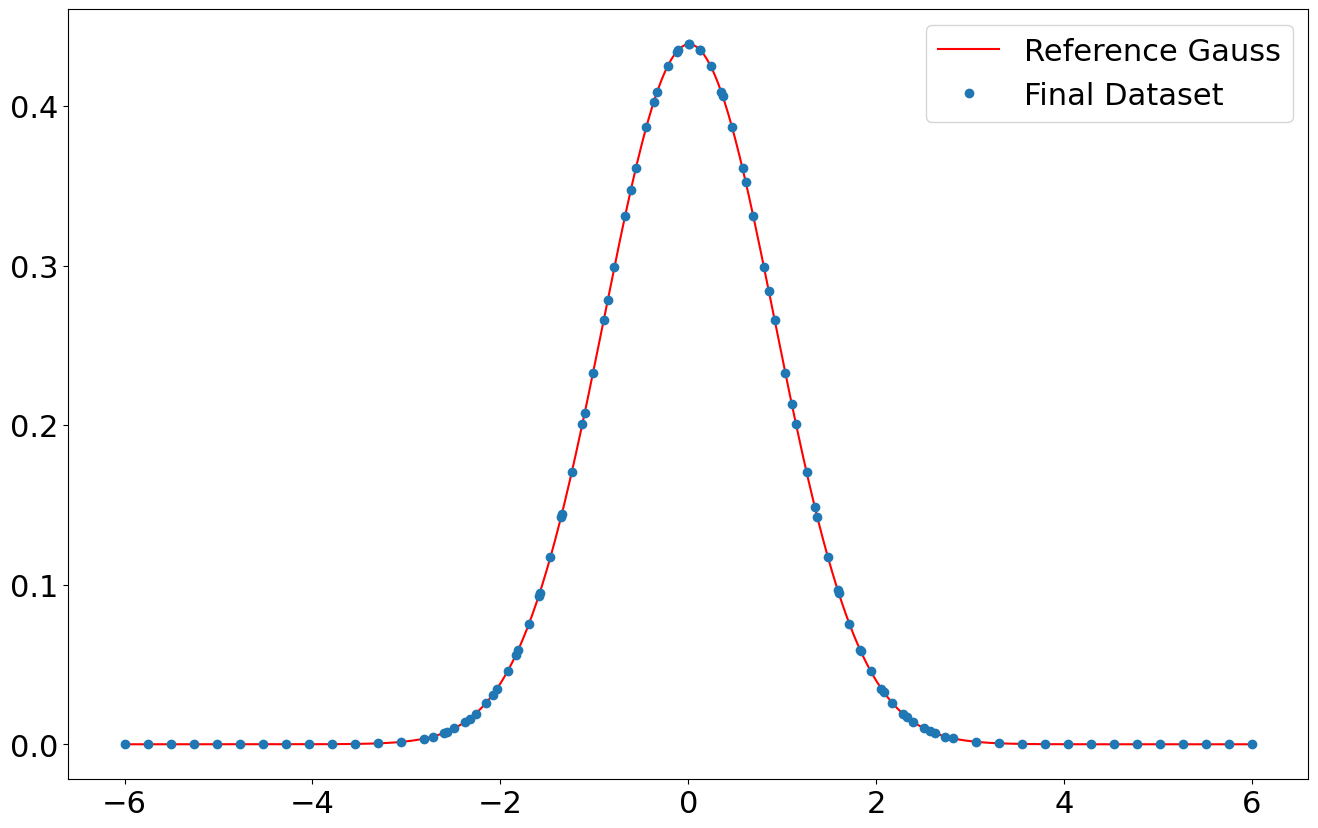

100


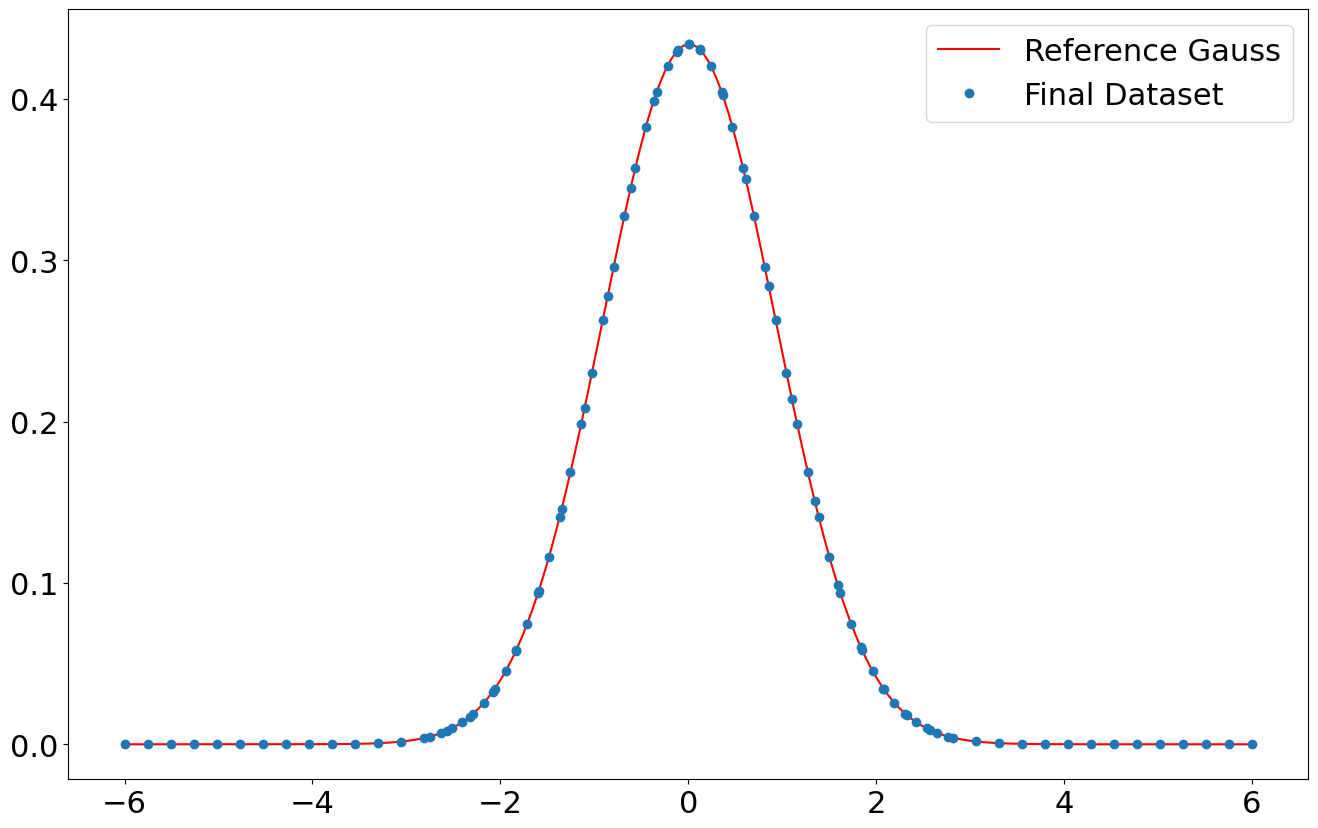

100


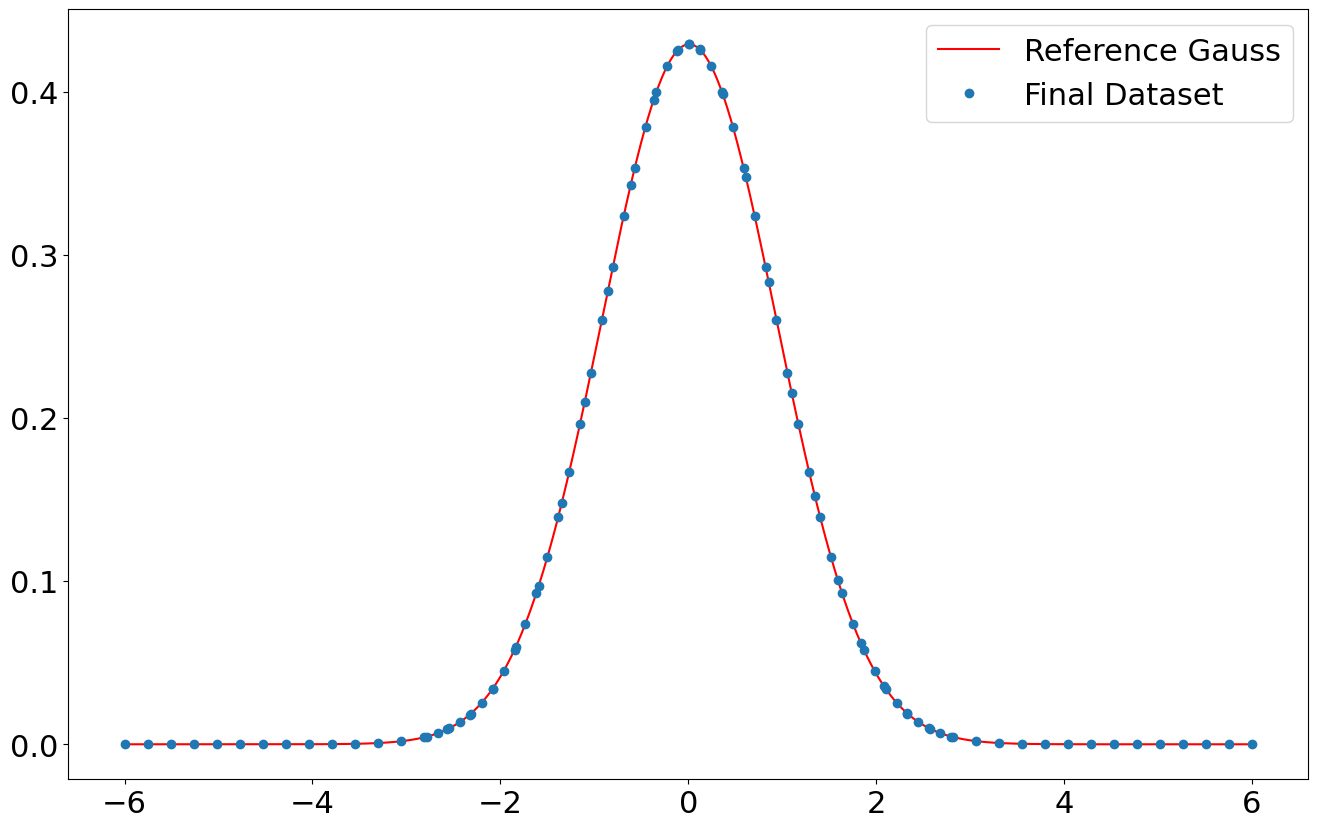

100


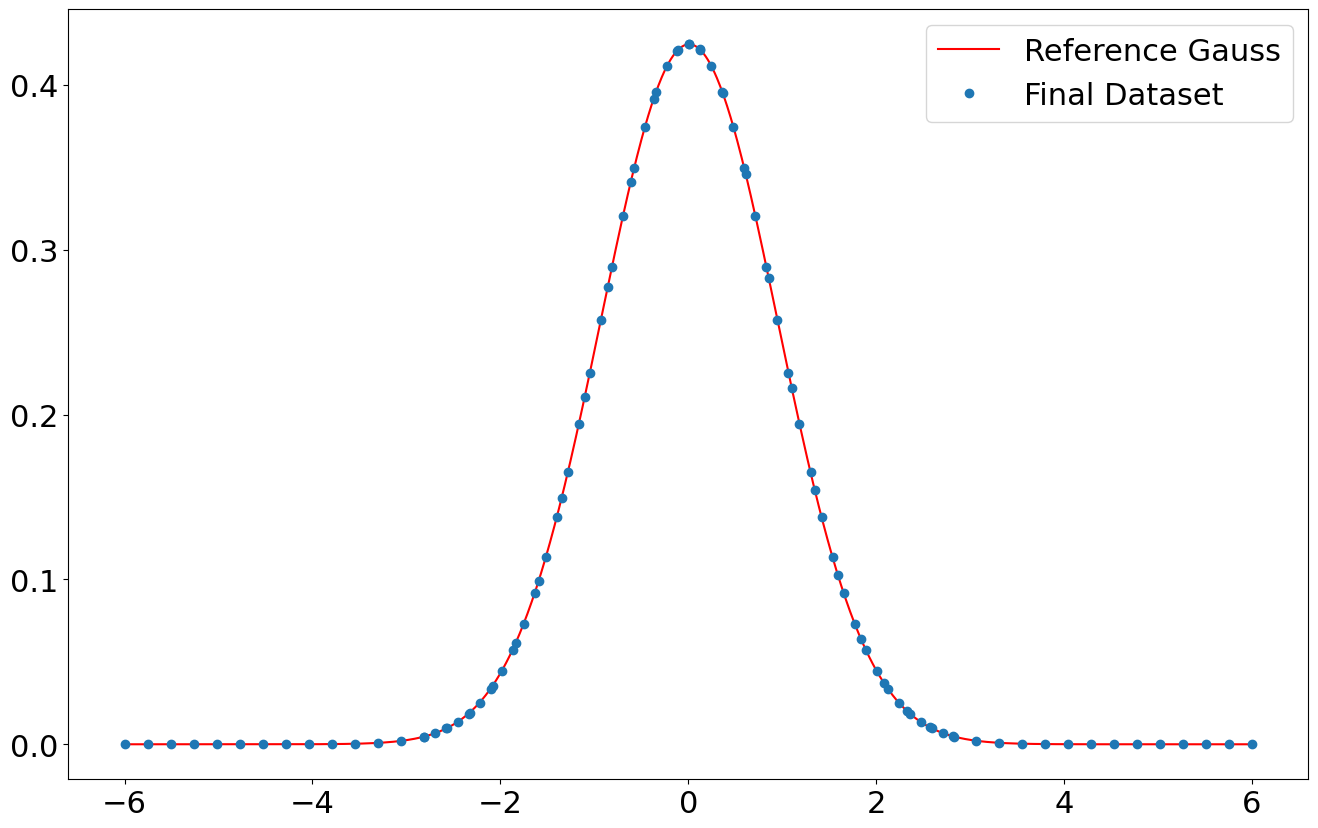

100


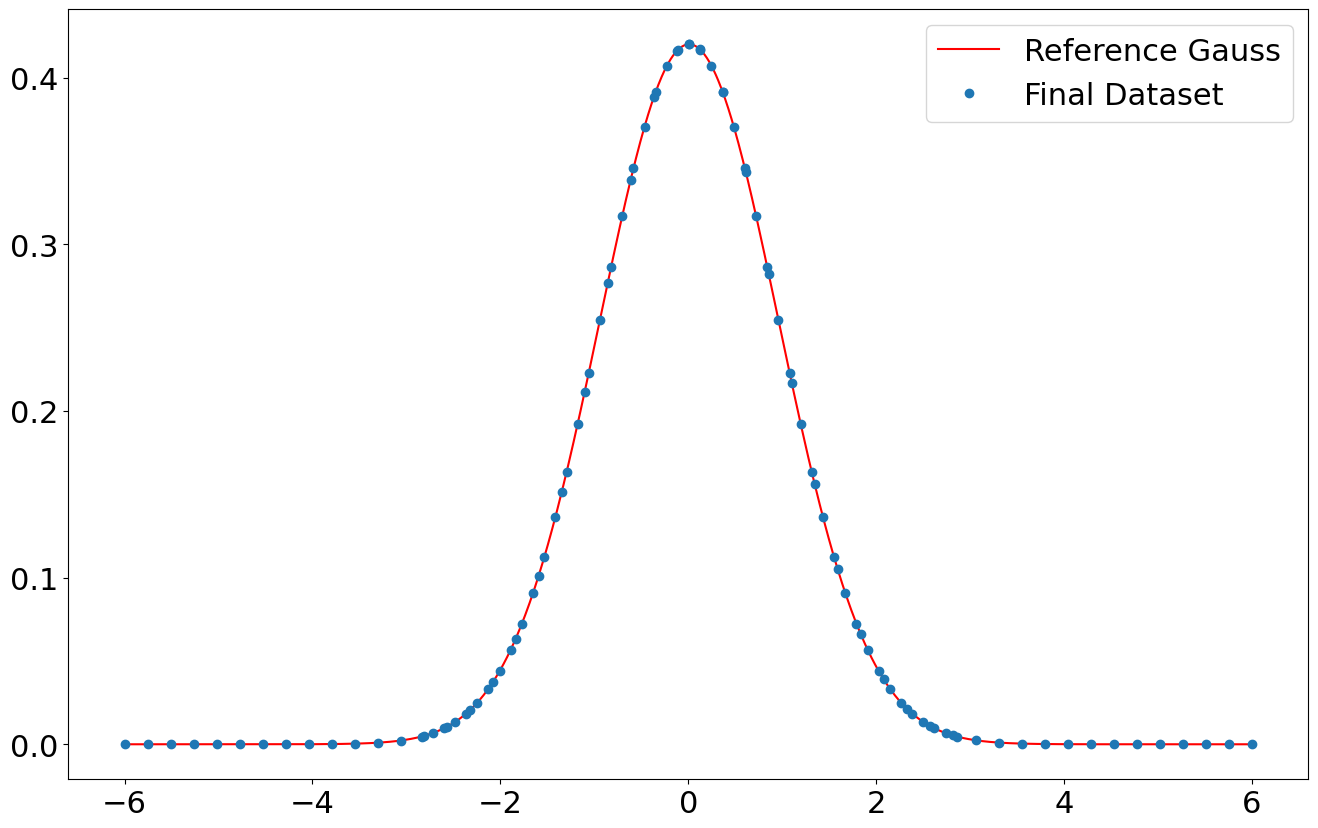

100


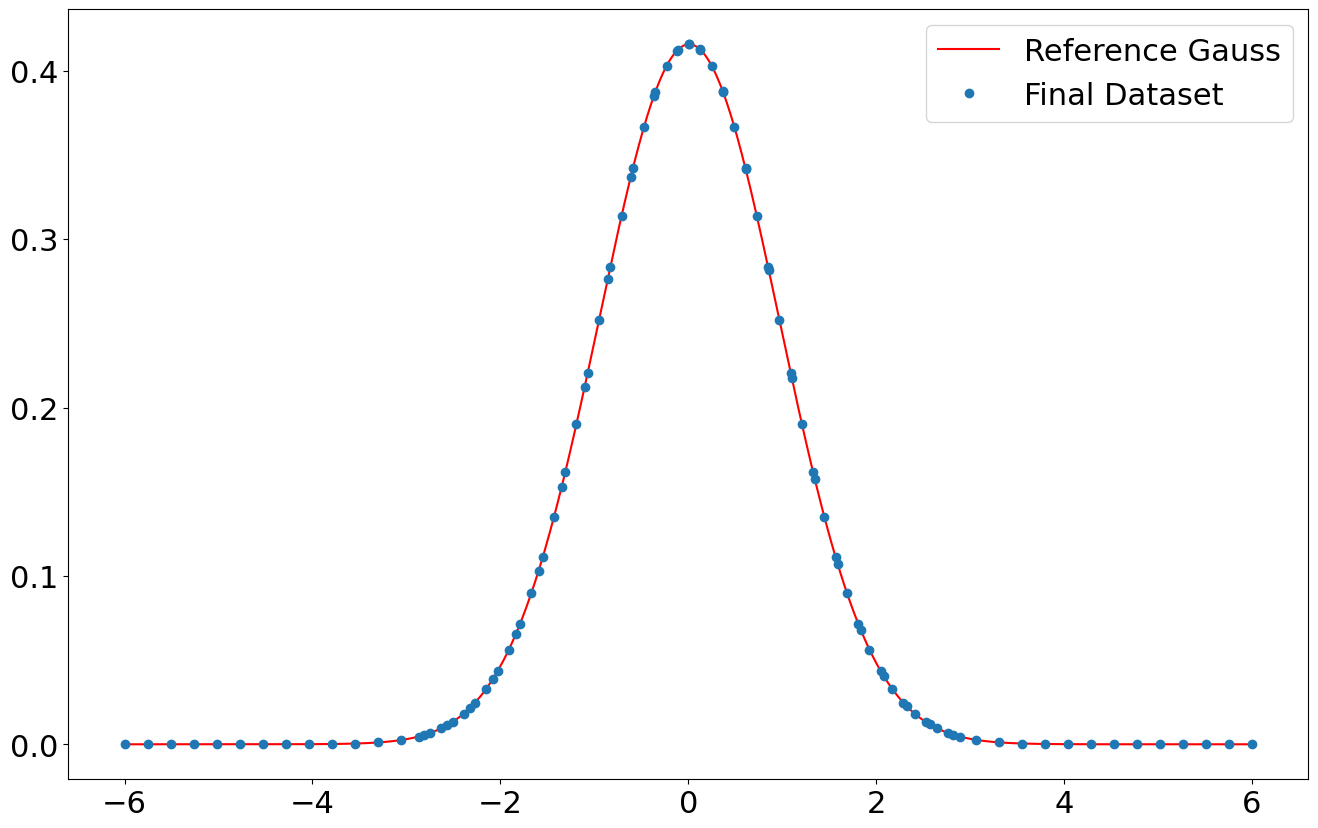

100


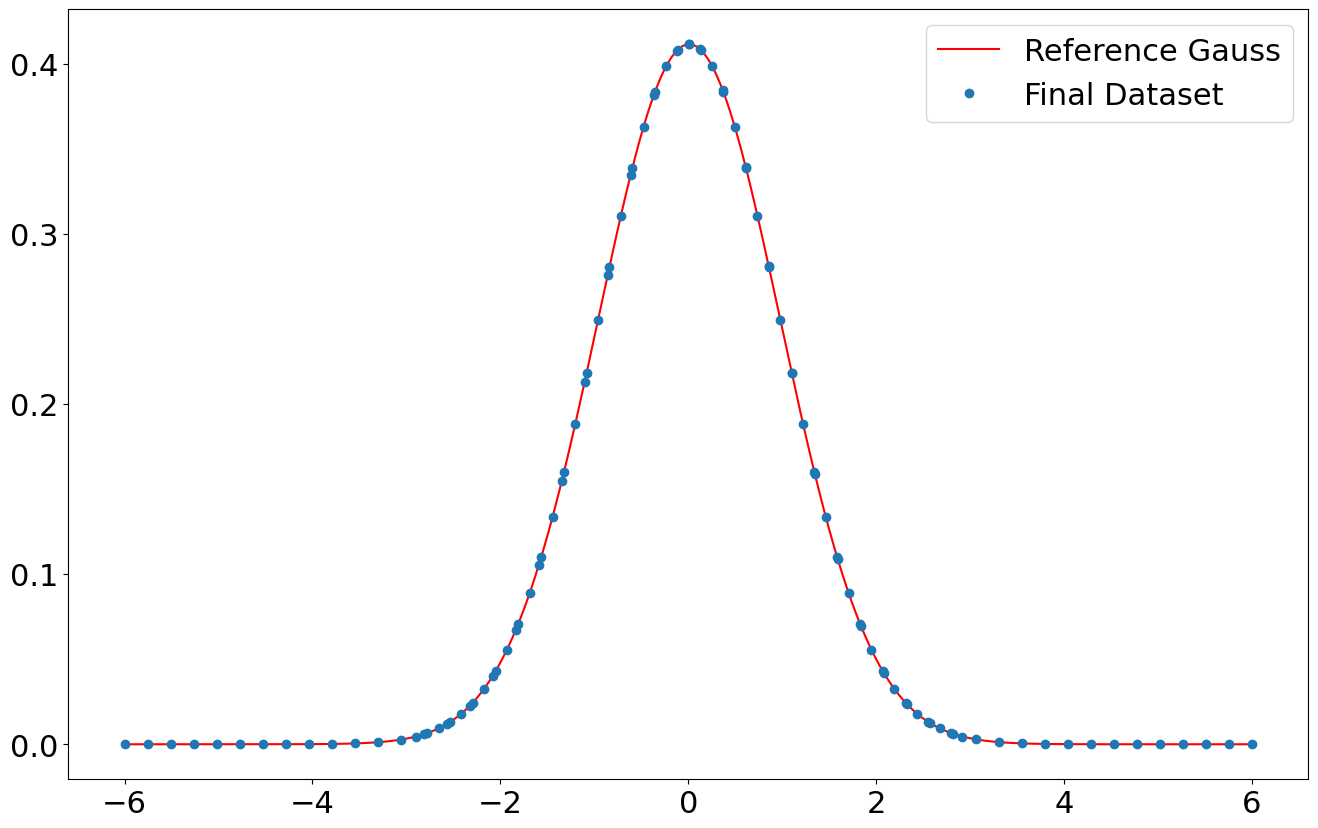

100


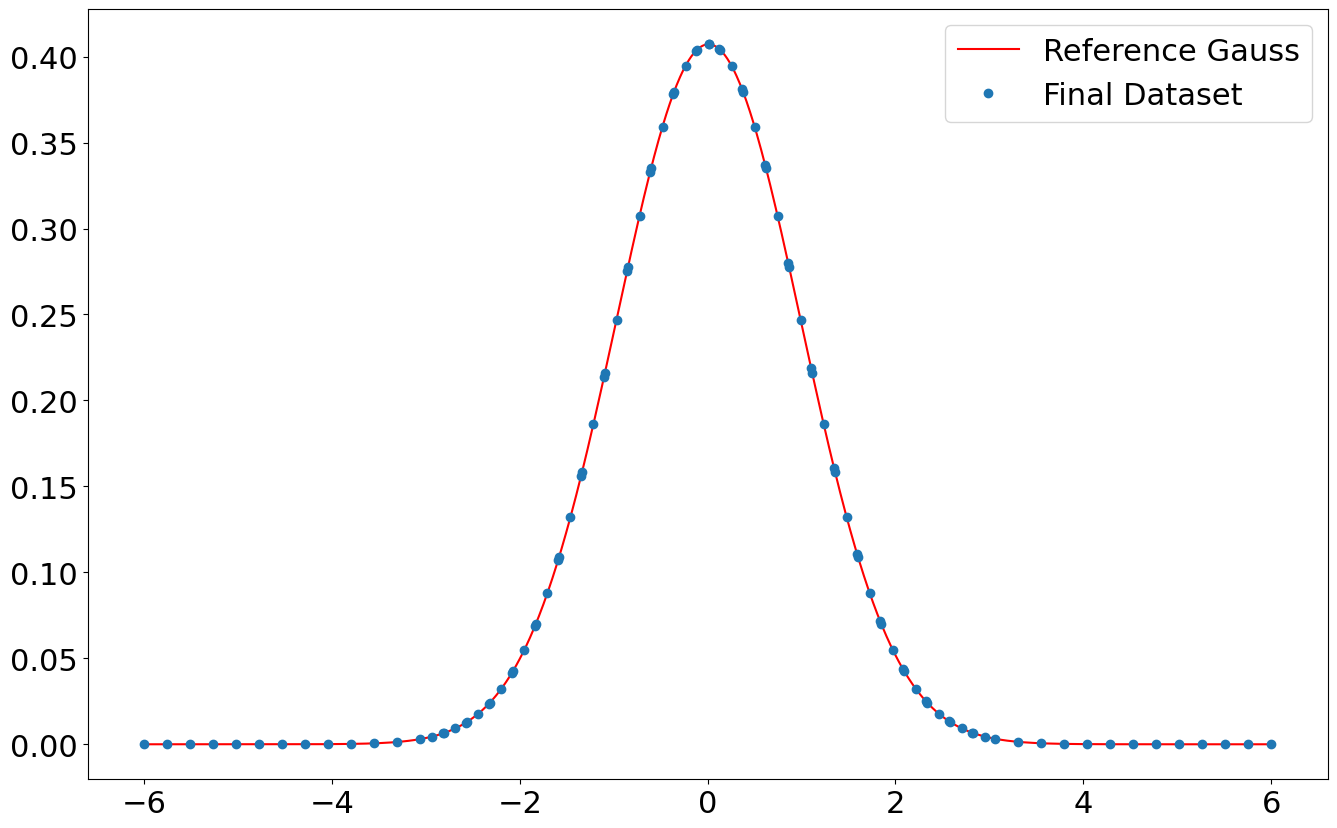

100


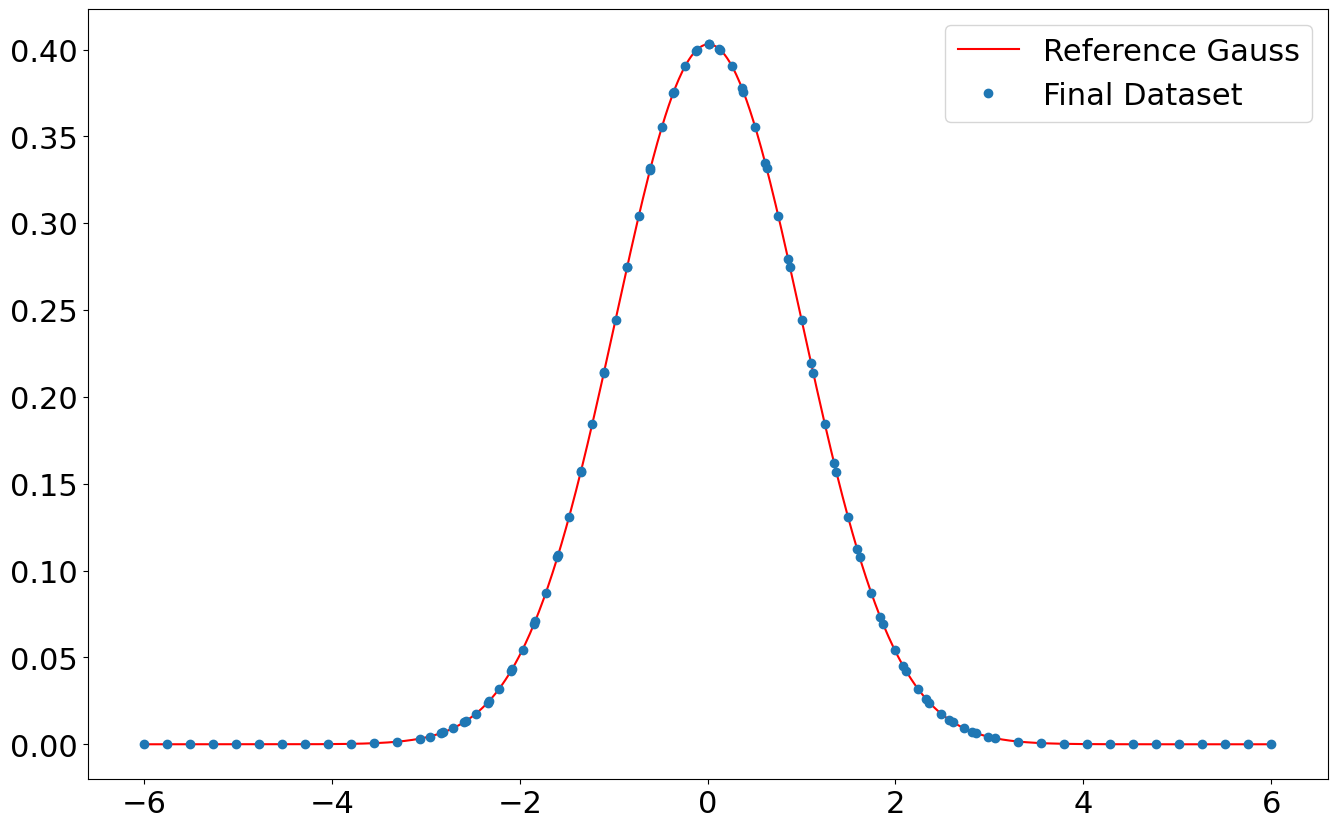

100


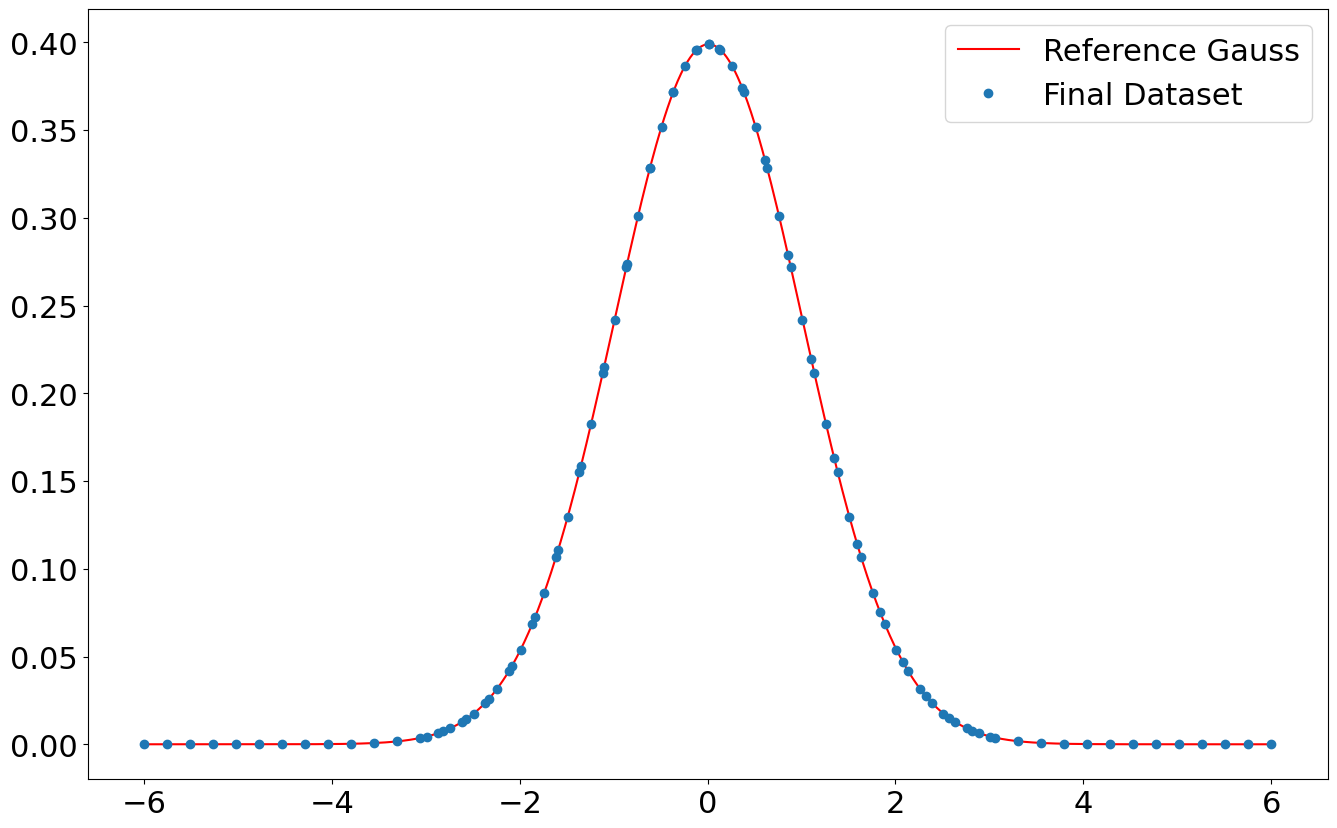

In [30]:
# For each mean and std combination draw a plot that has the reference gauss curve and the points for each dataset from second to final
import matplotlib.pyplot as plt
import numpy as np
import scipy

plt.rcParams.update({'font.size': 22})

for index, row in mean_std_combinations_improve.iterrows():
    mean = row["mean"]
    std = row["std"]
    
    if mean != unique_means_improve[50]:
        continue
    
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 10)
    
    # Bigger font
    
    x_ref = np.linspace(range_min_improve, range_max_improve, 1000)
    ax.plot(x_ref, scipy.stats.norm.pdf(x_ref, mean, std), 'r', label="Reference Gauss")
    
    x_final = final_improve_df[(final_improve_df["mean"] == mean) & (final_improve_df["std"] == std)]["input"]
    y_final = np.expm1(final_improve_df[(final_improve_df["mean"] == mean) & (final_improve_df["std"] == std)]["Label"])
    print(len(y_final))
    ax.plot(x_final, y_final, 'o', label="Final Dataset")
    
    ax.legend()
    
    plt.show()
    

    